## The Dataset

The dataset used in this project contains detailed daily weather observations and was sourced from Kaggle. It includes a variety of meteorological features that describe weather conditions across different days. These features capture temperature, humidity, pressure, visibility, wind information, and summary descriptions of the day's weather.

The dataset contains the following columns:

* `Formatted Date:` Timestamp of the observation
* `Summary:` Short description of the weather condition
* `Precip Type:` Type of precipitation (e.g., rain, snow)
* `Temperature (C):` Measured temperature in Celsius
* `Apparent Temperature (C):` Perceived or "feels-like" temperature in Celsius
* `Humidity:` Relative humidity (scale of 0 to 1)
* `Wind Speed (km/h):` Wind speed in kilometers per hour
* `Wind Bearing (degrees):` Wind direction in degrees
* `Visibility (km):` Visibility distance in kilometers
* `Loud Cover:` Cloud cover value (usually between 0 and 1)
* `Pressure (millibars):` Atmospheric pressure measured in millibars
* `Daily Summary:` Detailed textual summary of the day’s weather

The target variable for this project is `Summary`, which represents a short textual description of the weather condition (e.g., *Partly Cloudy*, *Drizzle*, *Clear*). It contains a large number of unique classes, many of which are semantically similar or overlapping. To improve modeling performance and interpretability, the project will explore different strategies to simplify or reduce these classes during preprocessing.

**Dataset Source:** [Kaggle - Weather Dataset](https://www.kaggle.com/datasets/muthuj7/weather-dataset/data)

## Project Description

A project that aims to explore historical weather data to uncover meaningful insights and build machine learning models capable of predicting future weather conditions. The overall goal is to understand patterns within the data and use them to develop robust, generalizable models for classification tasks. To accomplish this, the project will follow a structured pipeline:

- **Data Exploration:** The dataset will be examined in depth to understand its structure, distributions, and potential issues. This includes viewing summary statistics, checking data types, visualizing correlations, and understanding variable distributions.

- **Data Cleaning and Preprocessing:** The raw data will be cleaned by handling missing values, dealing with outliers, removing duplicates, and extracting useful information from date fields. Unnecessary columns will be dropped, and appropriate encoding and scaling techniques will be applied.

- **Target Variable Engineering:** Since the original target variable contains multiple classes, different strategies will be explored to simplify or reduce these classes for better modeling performance and interpretability.

- **Feature Selection:** Permutation-based feature importance will be used to identify and drop less informative features. This step aims to improve the efficiency and accuracy of the models.

- **Model Development:** A range of machine learning models will be trained and evaluated. For each model, various configurations will be tested, starting with default settings, moving to custom hyperparameters, and finally applying hyperparameter tuning.

- **Evaluation and Comparison:** The models will be assessed using consistent metrics across training, validation, and test sets. Their performances will be compared to determine which setup performs best under the defined constraints.

- **User Interface:** A simple command-line interface will be created to allow users to input weather parameters and receive predictions using the best-performing models.

- **Incremental Learning:** The project will also include code to support incremental learning, enabling selected models to update themselves as new data becomes available.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pydotplus
import xgboost as xgb
from collections import Counter

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, label_binarize
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, make_scorer, \
                            confusion_matrix, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree

# Exploring the Dataset

## First 5 rows of the data:

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


## Summary of the data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


## Summary statistics of the data:

In [4]:
df.describe(include = 'all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


## Data types of the columns:

In [5]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

The datatype of the `Formatted Date` column is object, however, it should be of the date datatype.

## Distribution of the target variable:

In [6]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

## Finding correlation of the data:

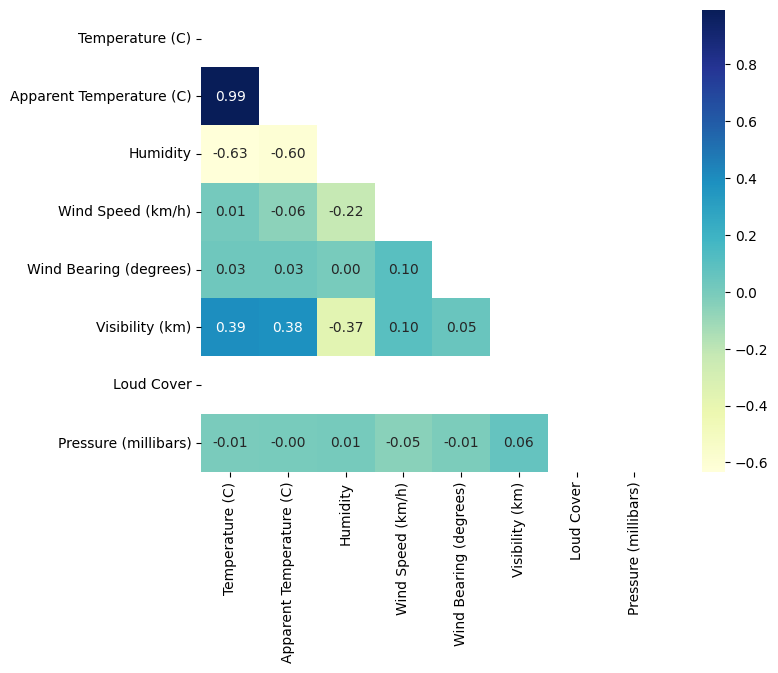

In [7]:
# find the correlation matrix using corr()
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Step 2: Calculate the correlation matrix using only the numeric columns
corr = df[numeric_columns].corr()

# get the lower portion of the matrix to avoid redundancy
mask = np.triu(np.ones_like(corr, dtype=bool))

# build the heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr, cmap = "YlGnBu", mask = mask, annot = True, fmt=".2f", square = True)
plt.show();

In [8]:
corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


It can be seen that `Temperature` and `Apparent Temperature` are highly correlated (99%) and this exhibits the phenomenon of multicollinearity.

# Data Preprocessing and Cleaning

## Extracting information from the date column:

In [9]:
# convert the 'Formatted Date' column to datetime format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# extract the desired features
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Year'] = df['Formatted Date'].dt.year
df['Hour'] = df['Formatted Date'].dt.hour
df['Minute'] = df['Formatted Date'].dt.minute
df['Second'] = df['Formatted Date'].dt.second
df['Timezone'] = df['Formatted Date'].dt.tz

In [10]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Day,Year,Hour,Minute,Second,Timezone
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,3,31,2006,22,0,0,UTC
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,3,31,2006,23,0,0,UTC
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,4,1,2006,0,0,0,UTC
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,4,1,2006,1,0,0,UTC
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,4,1,2006,2,0,0,UTC


## Dropping unnecessary columns:

1. Loud Cover = this column has no data within it, all values are 0.
2. Daily Summary = this column shows in detail summary of the target variable "Summary".
3. Formatted Date = this column will not be of much use when making models.
4. Apparent Temperature = this column causes mutlicollinearity with Temperature.
5. Second = this column has no unique data within it, all values are 0.
6. Minute = this column has no unique data within it, all values are 0.
7. Timezone = this column has no unique data within it, all values are UTC.

In [11]:
# value_counts() shows the count of unique values within a column
df['Loud Cover'].value_counts()

Loud Cover
0    96453
Name: count, dtype: int64

In [12]:
# value_counts() shows the count of unique values within a column
df['Second'].value_counts()

Second
0    96453
Name: count, dtype: int64

In [13]:
# value_counts() shows the count of unique values within a column
df['Minute'].value_counts()

Minute
0    96453
Name: count, dtype: int64

In [14]:
# value_counts() shows the count of unique values within a column
df['Timezone'].value_counts()

Timezone
UTC    96453
Name: count, dtype: int64

In [15]:
df.drop(['Loud Cover','Daily Summary', 'Formatted Date', 'Apparent Temperature (C)','Second','Minute','Timezone'], axis = 1, inplace = True)

In [16]:
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251,15.8263,1015.13,3,31,2006,22
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259,15.8263,1015.63,3,31,2006,23
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204,14.9569,1015.94,4,1,2006,0
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269,15.8263,1016.41,4,1,2006,1
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259,15.8263,1016.51,4,1,2006,2


## Checking for correlation again:

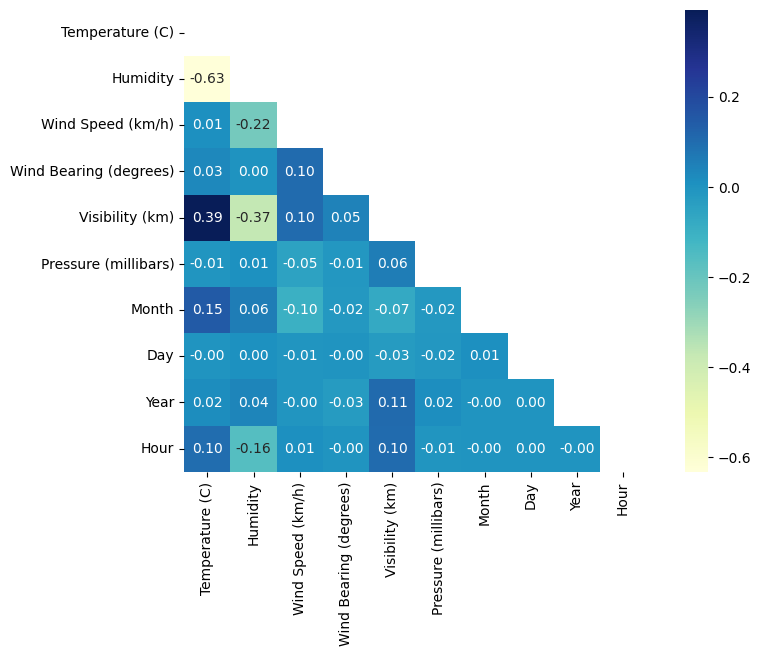

In [17]:
# find the correlation matrix using corr()
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Step 2: Calculate the correlation matrix using only the numeric columns
corr = df[numeric_columns].corr()

# get the lower portion of the matrix to avoid redundancy
mask = np.triu(np.ones_like(corr, dtype=bool))

# build the heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr, cmap = "YlGnBu", mask = mask, annot = True, fmt=".2f", square = True)
plt.show();

In [18]:
corr

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour
Temperature (C),1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.148576,-0.000802,0.017462,0.099540
Humidity,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454,0.056526,0.004851,0.039257,-0.159930
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263,-0.098905,-0.006659,-0.004245,0.011118
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651,-0.019208,-0.003490,-0.025685,-0.003520
Visibility (km),0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818,-0.071946,-0.026374,0.107306,0.103589
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000,-0.019308,-0.015452,0.016124,-0.005715
Month,0.148576,0.056526,-0.098905,-0.019208,-0.071946,-0.019308,1.000000,0.010228,-0.000405,-0.000002
Day,-0.000802,0.004851,-0.006659,-0.003490,-0.026374,-0.015452,0.010228,1.000000,0.000425,0.000003
Year,0.017462,0.039257,-0.004245,-0.025685,0.107306,0.016124,-0.000405,0.000425,1.000000,-0.000075
Hour,0.099540,-0.159930,0.011118,-0.003520,0.103589,-0.005715,-0.000002,0.000003,-0.000075,1.000000


No signs of multicollinearity detected.

## Dropping duplicated rows:

In [19]:
# checking if there are duplicated rows using the df.duplicated() function
df[df.duplicated(keep = 'first')]       # keep = 'first' does not mark the first occurrence as duplicate

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour
36072,Clear,rain,18.800000,0.93,6.2790,270,14.9086,1016.99,8,1,2010,22
36073,Clear,rain,18.222222,0.97,6.2790,291,14.9086,1017.09,8,1,2010,23
36074,Clear,rain,18.072222,0.98,11.2700,290,6.8425,1013.23,8,2,2010,0
36075,Clear,rain,16.622222,0.99,6.4400,300,11.9784,1016.78,8,2,2010,1
36076,Clear,rain,16.094444,0.99,3.0751,280,11.9784,1016.67,8,2,2010,2
36077,Clear,rain,15.955556,0.99,3.8801,276,9.9820,1016.69,8,2,2010,3
36078,Clear,rain,17.088889,1.00,6.4400,310,9.9820,1017.08,8,2,2010,4
36079,Clear,rain,20.822222,0.87,3.2200,300,9.9820,1017.27,8,2,2010,5
36080,Clear,rain,23.405556,0.74,1.8837,334,9.9820,1017.27,8,2,2010,6
36081,Clear,rain,26.050000,0.59,1.5939,5,9.9820,1017.15,8,2,2010,7


In [20]:
# get the original shape of the dataframe
original_shape = df.shape

# drop the duplicated rows
df.drop_duplicates(keep = "first", inplace = True)

# get the new shape of the dataframe
new_shape = df.shape

print(f"Shape of dataframe before dropping duplicates: {original_shape}")
print(f"Shape of dataframe after dropping duplicates: {new_shape}")
print(f"Total rows dropped: {original_shape[0] - new_shape[0]}")

Shape of dataframe before dropping duplicates: (96453, 12)
Shape of dataframe after dropping duplicates: (96429, 12)
Total rows dropped: 24


## Checking for null values:

In [21]:
df.isna().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Month                       0
Day                         0
Year                        0
Hour                        0
dtype: int64

### Handling missing values in `Precip Type` column:

In [22]:
# a pattern was noticed which showed that Precip Type is rain when the temperature of the weather is less than equal to 0
# and Precip Type is snow when the temperature of the weather is greater than 0

rain_type = df[df['Temperature (C)'] > 0]['Precip Type']
snow_type = df[df['Temperature (C)'] <= 0]['Precip Type']

print(f"-- Precip Type when Temperature (C) is greater than 0: \n{rain_type.value_counts()}")
print(f"\n-- Precip Type when Temperature (C) is less than equal to 0: \n{snow_type.value_counts()}")

-- Precip Type when Temperature (C) is greater than 0: 
Precip Type
rain    85200
Name: count, dtype: int64

-- Precip Type when Temperature (C) is less than equal to 0: 
Precip Type
snow    10712
Name: count, dtype: int64


In [23]:
# a function is created which handles the missing values of the Precip Type column w.r.t to the conditions explained above.

def impute_precip(data):
    '''
    Handles the missing data of the "Precip Type" column as:
        - Precip Type = Rain if Temperature > 0
        - Precip Type = Snow if Temperature <= 0
    '''
    data['Precip Type'] = np.where(data['Temperature (C)'] > 0, 'rain', 'snow')
    return

impute_precip(df)

In [24]:
df.isna().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
Month                     0
Day                       0
Year                      0
Hour                      0
dtype: int64

### Handling missing values in `Pressure (millibars)` column:

* When using `df.isna().sum()` function, it showed that this column had no missing values.
* But upon further analysis, it was found that many rows had `Pressure = 0`, so we consider these rows as having missing values for this column.

In [25]:
# using value_counts() to see how many rows have Pressure = 0
df['Pressure (millibars)'].value_counts().sort_index(ascending = True)

Pressure (millibars)
0.00       1288
973.78        1
974.52        1
974.78        1
975.12        1
           ... 
1045.90       1
1045.93       1
1046.06       1
1046.26       1
1046.38       1
Name: count, Length: 4979, dtype: int64

In [26]:
# since Pressure = 0 is considered as a missing values, we are replacing all 0's with NaN so that Pandas can identify it easily
df['Pressure (millibars)'] = df['Pressure (millibars)'].replace(0, np.nan)
df.isna().sum()

Summary                      0
Precip Type                  0
Temperature (C)              0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Pressure (millibars)      1288
Month                        0
Day                          0
Year                         0
Hour                         0
dtype: int64

In [27]:
# the unique labels of the target variable (Summary) are stored, and for each unique value, the respective data groups are saved
class_labels = df['Summary'].unique()
class_groups = [df[df['Summary'] == label] for label in class_labels]
class_groups

[             Summary Precip Type  Temperature (C)  Humidity  \
 0      Partly Cloudy        rain         9.472222      0.89   
 1      Partly Cloudy        rain         9.355556      0.86   
 3      Partly Cloudy        rain         8.288889      0.83   
 5      Partly Cloudy        rain         9.222222      0.85   
 6      Partly Cloudy        rain         7.733333      0.95   
 ...              ...         ...              ...       ...   
 96448  Partly Cloudy        rain        26.016667      0.43   
 96449  Partly Cloudy        rain        24.583333      0.48   
 96450  Partly Cloudy        rain        22.038889      0.56   
 96451  Partly Cloudy        rain        21.522222      0.60   
 96452  Partly Cloudy        rain        20.438889      0.61   
 
        Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
 0                14.1197                     251          15.8263   
 1                14.2646                     259          15.8263   
 3                14

In [28]:
# instantiate the imputer object
imputer = SimpleImputer(strategy='mean')

# performing mean imputation for each class group separately
for group in class_groups:
    
    # extract the missing indices and feature values for the current class group
    missing_indices = np.where(pd.isnull(group['Pressure (millibars)']))[0]
    feature_values = group['Pressure (millibars)'].values.reshape(-1, 1)
    
    # perform mean imputation on the feature values
    imputed_values = imputer.fit_transform(feature_values)
    
    #df = group.iloc[missing_indices]['Pressure (millibars)']
    #print(df.head())

    # get column index number of "Pressure (millibars)"
    col_index = df.columns.get_loc("Pressure (millibars)")
    
    # replace the missing values in the original data with the imputed values
    group.iloc[missing_indices, col_index] = imputed_values[missing_indices]
    
    #df = group.iloc[missing_indices]['Pressure (millibars)']
    #print(df.head())
    
    
# concatenate the imputed class groups back into a single array
imputed_data = np.concatenate(class_groups, axis=0)

In [29]:
df = pd.DataFrame(imputed_data, columns = df.columns)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251,15.8263,1015.13,3,31,2006,22
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259,15.8263,1015.63,3,31,2006,23
2,Partly Cloudy,rain,8.288889,0.83,14.1036,269,15.8263,1016.41,4,1,2006,1
3,Partly Cloudy,rain,9.222222,0.85,13.9587,258,14.9569,1016.66,4,1,2006,3
4,Partly Cloudy,rain,7.733333,0.95,12.3648,259,9.982,1016.72,4,1,2006,4


In [30]:
# verify the missing values now
df.isna().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
Month                     0
Day                       0
Year                      0
Hour                      0
dtype: int64

In [31]:
# the data types have changed after imputation; therefore, correcting them
float_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
int_columns = ['Wind Bearing (degrees)']

df[float_columns] = df[float_columns].astype(float)
df[int_columns] = df[int_columns].astype(int)

In [32]:
df.dtypes

Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int32
Visibility (km)           float64
Pressure (millibars)      float64
Month                      object
Day                        object
Year                       object
Hour                       object
dtype: object

### Handling missing values in `Humidity` column:

* When using `df.isna().sum()` function, it showed that this column had no missing values.
* But upon further analysis, it was found that many rows had `Humidity = 0`, and such values indicate completely dry air with no moisture content, which is impossible in natural atmospheric conditions. 
* Therefore, we will consider `Humidity = 0` values as misisng values.

In [33]:
# using value_counts() to see how many rows have Humidity = 0
df['Humidity'].value_counts().sort_index(ascending = True)

Humidity
0.00      22
0.12       1
0.13       1
0.14       4
0.15      10
        ... 
0.96    3843
0.97     581
0.98     252
0.99    1573
1.00    2889
Name: count, Length: 90, dtype: int64

In [34]:
# since Humidity = 0 is considered as a missing values, we are replacing all 0's with NaN so that Pandas can identify it easily
df['Humidity'] = df['Humidity'].replace(0, np.nan)
df.isna().sum()

Summary                    0
Precip Type                0
Temperature (C)            0
Humidity                  22
Wind Speed (km/h)          0
Wind Bearing (degrees)     0
Visibility (km)            0
Pressure (millibars)       0
Month                      0
Day                        0
Year                       0
Hour                       0
dtype: int64

In [35]:
# the unique labels of the target variable (Summary) are stored and for each unique value, the respective data groups are saved
class_labels = df['Summary'].unique()
class_groups = [df[df['Summary'] == label] for label in class_labels]

In [36]:
# instantiate the imputer object
imputer = SimpleImputer(strategy='mean')

# performing mean imputation for each class group separately
for group in class_groups:
    
    # extract the missing indices and feature values for the current class group
    missing_indices = np.where(pd.isnull(group['Humidity']))[0]
    feature_values = group['Humidity'].values.reshape(-1, 1)
    
    # perform mean imputation on the feature values
    imputed_values = imputer.fit_transform(feature_values)

    # get column index number of "Humidity" column
    col_index = df.columns.get_loc("Humidity")

    # replace the missing values in the original data with the imputed values
    group.iloc[missing_indices, col_index] = imputed_values[missing_indices]
    
# concatenate the imputed class groups back into a single array
imputed_data = np.concatenate(class_groups, axis=0)

In [37]:
df = pd.DataFrame(imputed_data, columns = df.columns)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251,15.8263,1015.13,3,31,2006,22
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259,15.8263,1015.63,3,31,2006,23
2,Partly Cloudy,rain,8.288889,0.83,14.1036,269,15.8263,1016.41,4,1,2006,1
3,Partly Cloudy,rain,9.222222,0.85,13.9587,258,14.9569,1016.66,4,1,2006,3
4,Partly Cloudy,rain,7.733333,0.95,12.3648,259,9.982,1016.72,4,1,2006,4


In [38]:
df.isna().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
Month                     0
Day                       0
Year                      0
Hour                      0
dtype: int64

In [39]:
# the data types have changed after imputation; therefore, correcting them
float_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
int_columns = ['Wind Bearing (degrees)']

df[float_columns] = df[float_columns].astype(float)
df[int_columns] = df[int_columns].astype(int)

In [40]:
df.dtypes

Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int32
Visibility (km)           float64
Pressure (millibars)      float64
Month                      object
Day                        object
Year                       object
Hour                       object
dtype: object

### Handling missing values in `Visibility (km)` column:

* When using `df.isna().sum()` function, it showed that this column had no missing values.
* But upon further analysis, it was found that many rows had `Visibility (km) = 0`, and in natural weather conditions, it is uncommon for visibility to be precisely 0 kilometers (km). 
* Even in situations with reduced visibility, it is rare for the visibility to be absolutely zero. In most cases, visibility is reported as a non-zero value, even in conditions with limited visibility due to fog, mist, dust, or other atmospheric factors.
* Therefore, considering `Visibility (km) = 0` as missing values.

In [41]:
# using value_counts() to see how many rows have Humidity = 0
df['Visibility (km)'].value_counts().sort_index(ascending = True)

Visibility (km)
0.0000      450
0.0161       19
0.0322       20
0.0483        9
0.0644       10
           ... 
15.9873       1
16.0195       2
16.0517     449
16.0839       1
16.1000    7092
Name: count, Length: 949, dtype: int64

In [42]:
# since Humidity = 0 is considered a missing value, we are replacing all 0's with NaN so that Pandas can identify it easily
df['Visibility (km)'] = df['Visibility (km)'].replace(0, np.nan)
df.isna().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)           450
Pressure (millibars)        0
Month                       0
Day                         0
Year                        0
Hour                        0
dtype: int64

In [43]:
# the unique labels of the target variable (Summary) are stored, and for each unique value, the respective data groups are saved
class_labels = df['Summary'].unique()
class_groups = [df[df['Summary'] == label] for label in class_labels]

In [44]:
# instantiate the imputer object
imputer = SimpleImputer(strategy='mean')

# performing mean imputation for each class group separately
for group in class_groups:
    
    # extract the missing indices and feature values for the current class group
    missing_indices = np.where(pd.isnull(group['Visibility (km)']))[0]
    feature_values = group['Visibility (km)'].values.reshape(-1, 1)
    
    # perform mean imputation on the feature values
    imputed_values = imputer.fit_transform(feature_values)

    # get column index number of "Visibility (km)" column
    col_index = df.columns.get_loc("Visibility (km)")

    # replace the missing values in the original data with the imputed values
    group.iloc[missing_indices, col_index] = imputed_values[missing_indices]
    
# concatenate the imputed class groups back into a single array
imputed_data = np.concatenate(class_groups, axis=0)

In [45]:
df = pd.DataFrame(imputed_data, columns = df.columns)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251,15.8263,1015.13,3,31,2006,22
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259,15.8263,1015.63,3,31,2006,23
2,Partly Cloudy,rain,8.288889,0.83,14.1036,269,15.8263,1016.41,4,1,2006,1
3,Partly Cloudy,rain,9.222222,0.85,13.9587,258,14.9569,1016.66,4,1,2006,3
4,Partly Cloudy,rain,7.733333,0.95,12.3648,259,9.982,1016.72,4,1,2006,4


In [46]:
df.isna().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
Month                     0
Day                       0
Year                      0
Hour                      0
dtype: int64

## Encoding categorical feature:

* There is only one categorical feature in the dataset which is `Precip Type`.
* It has two values within in i.e., `Rain` and `Snow`.
* We will perform One-Hot encoding on this column.

In [47]:
df = pd.get_dummies(data = df, columns = ['Precip Type'])

In [48]:
# view 10 random rows to verify changes
df.sample(10)

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour,Precip Type_rain,Precip Type_snow
1480,Partly Cloudy,24.3,0.82,3.2361,143,14.9569,1015.21,6,27,2006,21,True,False
20045,Partly Cloudy,22.672222,0.38,21.1232,239,10.3684,1012.33,5,6,2012,9,True,False
74513,Overcast,6.016667,0.93,15.8102,339,5.0876,993.56,11,21,2015,17,True,False
55906,Mostly Cloudy,8.172222,0.84,5.6833,325,9.8049,1016.16,11,17,2015,20,True,False
72897,Overcast,8.938889,0.99,3.9123,350,4.7495,1005.82,10,23,2014,19,True,False
69752,Overcast,2.733333,0.96,23.7958,290,4.0733,1000.81,10,28,2012,7,True,False
35023,Mostly Cloudy,17.25,0.82,1.2558,93,10.948,1014.72,6,2,2007,6,True,False
82722,Foggy,-4.027778,0.93,7.6314,170,0.4508,1027.2,2,20,2015,5,False,True
93810,Clear,-1.25,0.86,6.0053,179,7.7763,1030.31,2,19,2015,20,False,True
18937,Partly Cloudy,25.155556,0.68,10.7226,90,11.27,1013.67,7,25,2012,14,True,False


## Verifying the data types:

In [49]:
df.dtypes

Summary                   object
Temperature (C)           object
Humidity                  object
Wind Speed (km/h)         object
Wind Bearing (degrees)    object
Visibility (km)           object
Pressure (millibars)      object
Month                     object
Day                       object
Year                      object
Hour                      object
Precip Type_rain            bool
Precip Type_snow            bool
dtype: object

In [50]:
# the data types have changed after imputation; therefore, correcting them
float_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
int_columns = ['Precip Type_rain', 'Precip Type_snow', 'Wind Bearing (degrees)', 'Hour', 'Day', 'Year', 'Month']

df[float_columns] = df[float_columns].astype(float)
df[int_columns] = df[int_columns].astype(int)

In [51]:
# verify the data type changes
df.dtypes

Summary                    object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int32
Visibility (km)           float64
Pressure (millibars)      float64
Month                       int32
Day                         int32
Year                        int32
Hour                        int32
Precip Type_rain            int32
Precip Type_snow            int32
dtype: object

In [52]:
df.sample(5)

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour,Precip Type_rain,Precip Type_snow
10103,Partly Cloudy,21.666667,0.84,0.0000,0,16.1000,1018.10,7,15,2009,23,1,0
78978,Foggy,-5.250000,1.00,10.7548,310,2.5277,1024.83,12,27,2010,17,0,1
41286,Mostly Cloudy,15.277778,0.85,3.0751,30,14.9086,1021.07,4,24,2010,20,1,0
67394,Overcast,14.961111,0.62,7.8890,213,9.9820,1011.89,4,28,2011,17,1,0
60251,Overcast,2.561111,0.92,7.8890,357,8.1144,1014.36,2,24,2006,0,1,0


## Reducing classes in the target variable:

* There are 27 classes in the target variable and training models to predict this many classes is not efficient.
* The classes are reduced based on the similarity of the weather.
* We will perform reduction in three different ways and test a simple model on both of them to make the final selection.

### Reduction 1: 
Reducing all classes into one except the majority ones with greater number of samples, which are:
1. Mostly Cloudy
2. Partly Cloudy
3. Overcast

The minority classes are not merged into one because of lower number of samples.

In [53]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [54]:
# make a copy of the dataset for reduction 1
df1 = df.copy()

In [55]:
# all rain classes are merged into one class: Rain
df1['Summary'] = df1['Summary'].replace('Light Rain', 'Rain')
df1['Summary'] = df1['Summary'].replace('Drizzle', 'Rain')

# all wind-related classes are merged into a single class: Windy
df1['Summary'] = df1['Summary'].replace(['Dangerously Windy and Partly Cloudy', 'Windy and Dry',
                                         'Windy and Foggy', 'Windy and Partly Cloudy', 'Windy and Mostly Cloudy',
                                         'Windy and Overcast'], 'Windy')

# all breeze-related classes are merged into a single class: Breezy
df1['Summary'] = df1['Summary'].replace(['Breezy and Dry', 'Breezy and Foggy', 'Breezy and Partly Cloudy',
                                         'Breezy and Mostly Cloudy', 'Breezy and Overcast'], 'Breezy')

# all dry-related classes are merged into a single class: Dry
df1['Summary'] = df1['Summary'].replace(['Dry and Mostly Cloudy', 'Dry and Partly Cloudy'], 'Dry')

# all humid-related classes are merged into a single class: Humid
df1['Summary'] = df1['Summary'].replace(['Humid and Mostly Cloudy', 'Humid and Partly Cloudy',
                                       'Humid and Overcast'], 'Humid')

# since breezy weather also refers to a windy weather, we merge these both into a single class: Windy
df1['Summary'] = df1['Summary'].replace('Breezy', 'Windy')

In [56]:
df1['Summary'].value_counts()

Summary
Partly Cloudy    31726
Mostly Cloudy    28094
Overcast         16597
Clear            10873
Foggy             7148
Windy             1681
Dry                134
Rain               112
Humid               64
Name: count, dtype: int64

In [57]:
total_classes = len(df1['Summary'].unique())
print(f"The unique number of classes in Summary variable is now {total_classes}.")

The unique number of classes in Summary variable is now 9.


### Reduction 2: 
Reducing all classes into one, including the majority ones with a greater number of samples, which are:
1. Mostly Cloudy
2. Partly Cloudy
3. Overcast

* Our intuition is that Partly Cloudy, Mostly Cloudy, and Overcast weather won't have much different feature values and hence can be categorized as a single category. But we will test this to make sure that this is the right decision to combine them.
* The minority classes are not merged into one because of lthe ower number of samples.

In [58]:
# make a copy of the dataset for reduction 2
df2 = df.copy()

In [59]:
# all rain classes are merged into one class: Rain
df2['Summary'] = df2['Summary'].replace('Light Rain', 'Rain')
df2['Summary'] = df2['Summary'].replace('Drizzle', 'Rain')

# all wind-related classes are merged into a single class: Windy
df2['Summary'] = df2['Summary'].replace(['Dangerously Windy and Partly Cloudy', 'Windy and Dry',
                                         'Windy and Foggy', 'Windy and Partly Cloudy', 'Windy and Mostly Cloudy',
                                         'Windy and Overcast'], 'Windy')

# all breeze-related classes are merged into a single class: Breezy
df2['Summary'] = df2['Summary'].replace(['Breezy and Dry', 'Breezy and Foggy', 'Breezy and Partly Cloudy',
                                        'Breezy and Mostly Cloudy', 'Breezy and Overcast'], 'Breezy')

# all dry-related classes are merged into a single class: Dry
df2['Summary'] = df2['Summary'].replace(['Dry and Mostly Cloudy', 'Dry and Partly Cloudy'], 'Dry')

# all humid-related classes are merged into a single class: Humid
df2['Summary'] = df2['Summary'].replace(['Humid and Mostly Cloudy', 'Humid and Partly Cloudy',
                                       'Humid and Overcast'], 'Humid')

# since breezy weather also refers to a windy weather, we merge these both into a single class: Windy
df2['Summary'] = df2['Summary'].replace('Breezy', 'Windy')

In [60]:
# partly and mostly cloudy, and overcast classes are merged into one class
df2['Summary'] = df2['Summary'].replace(['Partly Cloudy', 'Mostly Cloudy', 'Overcast'], 'Cloudy')
df2['Summary'].value_counts()

Summary
Cloudy    76417
Clear     10873
Foggy      7148
Windy      1681
Dry         134
Rain        112
Humid        64
Name: count, dtype: int64

In [61]:
total_classes = len(df2['Summary'].unique())
print(f"The unique number of classes in Summary variable is now {total_classes}.")

The unique number of classes in Summary variable is now 7.


### Reduction 3: 
Reducing all classes into one including the majority ones with greater number of samples, which are:
1. Mostly Cloudy
2. Partly Cloudy
3. Overcast

The minority classes are merged into one because of lower number of samples, the collective class is called `Others`.

In [62]:
# make a copy of the dataset for reduction 2
df3 = df.copy()

In [63]:
# all rain classes are merged into one class: Rain
df3['Summary'] = df3['Summary'].replace('Light Rain', 'Rain')
df3['Summary'] = df3['Summary'].replace('Drizzle', 'Rain')

# all wind-related classes are merged into a single class: Windy
df3['Summary'] = df3['Summary'].replace(['Dangerously Windy and Partly Cloudy', 'Windy and Dry',
                                         'Windy and Foggy', 'Windy and Partly Cloudy', 'Windy and Mostly Cloudy',
                                         'Windy and Overcast'], 'Windy')

# all breeze-related classes are merged into a single class: Breezy
df3['Summary'] = df3['Summary'].replace(['Breezy and Dry', 'Breezy and Foggy', 'Breezy and Partly Cloudy',
                                        'Breezy and Mostly Cloudy', 'Breezy and Overcast'], 'Breezy')

# all dry-related classes are merged into a single class: Dry
df3['Summary'] = df3['Summary'].replace(['Dry and Mostly Cloudy', 'Dry and Partly Cloudy'], 'Dry')

# all humid-related classes are merged into a single class: Humid
df3['Summary'] = df3['Summary'].replace(['Humid and Mostly Cloudy', 'Humid and Partly Cloudy',
                                       'Humid and Overcast'], 'Humid')

# since breezy weather also refers to a windy weather, we merge these both into a single class: Windy
df3['Summary'] = df3['Summary'].replace('Breezy', 'Windy')

In [64]:
# partly and mostly cloudy, overcast classes are merged into one class
df3['Summary'] = df3['Summary'].replace(['Partly Cloudy', 'Mostly Cloudy', 'Overcast'], 'Cloudy')

# merge all the minority classes as "Others"
df3['Summary'] = df3['Summary'].replace(['Humid', 'Rain', 'Dry', 'Windy', 'Foggy'], 'Others')

In [65]:
df3['Summary'].value_counts()

Summary
Cloudy    76417
Clear     10873
Others     9139
Name: count, dtype: int64

In [66]:
total_classes = len(df3['Summary'].unique())
print(f"The unique number of classes in Summary variable is now {total_classes}.")

The unique number of classes in Summary variable is now 3.


## Checking for outliers:

We will check for outliers for each column, and for that we will create a simple function to have resuability.

In [67]:
def detect_outliers(col):
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[ (df[col] < lower) | (df[col] > upper) ]
    return outliers

In [68]:
len((detect_outliers('Temperature (C)')))

44

In [69]:
len((detect_outliers('Humidity')))

24

In [70]:
len((detect_outliers('Wind Speed (km/h)')))

3020

In [71]:
len(detect_outliers('Wind Bearing (degrees)'))

0

In [72]:
len(detect_outliers('Hour'))

0

In [73]:
len(detect_outliers('Day'))

0

In [74]:
len(detect_outliers('Month'))

0

In [75]:
len(detect_outliers('Year'))

0

In [76]:
len(detect_outliers('Visibility (km)'))

0

In [77]:
len((detect_outliers('Pressure (millibars)')))

3463

## Encoding the target variable:

* Instead of encoding the target variable and replace the orignal weather information, we will add a new column as `Encoded_Summary`.
* This column will correspond to the numerical encoding of the categorical classes of the `Summary` column.

In [78]:
# initialize label encoder object
label_encoder = LabelEncoder()

# encode the summary target variable and add a new column for the encoded values
summary_encoded = label_encoder.fit_transform(df1['Summary'])
df1.insert(1, 'Encoded_Summary', summary_encoded)
df1.sample(5)

,Summary,Encoded_Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour,Precip Type_rain,Precip Type_snow
85712,Clear,0,18.711111,0.69,1.8354,310,9.9820,1013.44,8,15,2007,5,1,0
46603,Mostly Cloudy,4,2.188889,0.92,14.2485,269,7.9856,1021.79,2,24,2012,6,1,0
71802,Overcast,5,7.105556,0.87,7.9212,352,3.5581,1018.83,12,6,2014,10,1,0
50873,Mostly Cloudy,4,13.961111,0.67,7.7602,191,16.1000,1017.49,9,20,2013,19,1,0
55932,Mostly Cloudy,4,11.700000,0.69,14.4900,186,14.3934,1000.93,11,20,2015,21,1,0


In [79]:
# encode the summary target variable and add a new column for the encoded values
summary_encoded = label_encoder.fit_transform(df2['Summary'])
df2.insert(1, 'Encoded_Summary', summary_encoded)
df2.sample(5)

,Summary,Encoded_Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour,Precip Type_rain,Precip Type_snow
87973,Clear,0,8.333333,0.76,17.7100,150,16.1000,1023.10,4,26,2009,2,1,0
76731,Foggy,3,-0.950000,0.96,12.1394,206,2.1413,1035.01,12,31,2006,21,0,1
61364,Cloudy,1,18.822222,0.79,16.9855,280,11.2056,1009.12,8,13,2007,5,1,0
77283,Foggy,3,-3.961111,0.85,9.4990,71,3.0590,1031.48,12,26,2007,7,0,1
68752,Cloudy,1,11.666667,0.91,9.3541,131,9.9820,1009.58,4,23,2012,21,1,0


In [80]:
# encode the summary target variable and add a new column for the encoded values
summary_encoded = label_encoder.fit_transform(df3['Summary'])
df3.insert(1, 'Encoded_Summary', summary_encoded)
df3.sample(5)

,Summary,Encoded_Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour,Precip Type_rain,Precip Type_snow
57811,Cloudy,1,-6.222222,0.88,9.3058,131,11.9784,1020.260000,1,20,2016,7,0,1
40544,Cloudy,1,11.111111,0.80,11.2700,160,6.1180,1015.000000,11,27,2009,17,1,0
85472,Clear,0,12.827778,0.83,8.1305,254,9.9820,1019.954258,9,6,2006,5,1,0
76754,Others,2,-2.805556,0.96,10.6099,151,0.1932,1009.810000,2,10,2006,1,0,1
52958,Cloudy,1,9.027778,0.70,9.2092,11,16.1000,1013.840000,3,26,2014,17,1,0


## Feature scaling:

Since the scale for the features are different, we are scaling the numerical features so that it helps the model perform better and faster.

In [81]:
# instantiate the scaler object
scaler = MinMaxScaler()

# select the columns to scale
columns_to_scale = ['Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 
                    'Pressure (millibars)', 'Month', 'Day', 'Year', 'Hour']

df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df3[columns_to_scale] = scaler.fit_transform(df3[columns_to_scale])

In [82]:
df1.sample(5)

,Summary,Encoded_Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour,Precip Type_rain,Precip Type_snow
71092,Overcast,5,0.477185,0.90,0.125063,0.359331,0.424424,0.669835,0.909091,0.566667,0.727273,0.434783,1,0
74865,Overcast,5,0.614886,0.87,0.200454,0.417827,0.619620,0.654408,0.727273,0.333333,0.909091,0.478261,1,0
28082,Partly Cloudy,6,0.675637,0.37,0.430661,0.027855,1.000000,0.708678,0.363636,0.333333,0.909091,0.565217,1,0
52148,Mostly Cloudy,4,0.387184,0.80,0.148764,0.888579,0.614615,0.588843,0.000000,0.733333,0.818182,0.173913,1,0
55104,Mostly Cloudy,4,0.675997,0.63,0.240292,0.972145,0.636637,0.545179,0.545455,0.966667,0.909091,0.695652,1,0


# Model Developments and Evaluations

## Separating the features and target variable:

In [83]:
# splitting the features and the target variable
X1 = df1.drop(['Summary', 'Encoded_Summary'], axis = 1)
y1 = df1['Encoded_Summary'].values

print(f"Dimensions of X: {X1.shape}")
print(f"Dimensions of y: {y1.shape}")

Dimensions of X: (96429, 12)
Dimensions of y: (96429,)


In [84]:
# splitting the features and the target variable
X2 = df2.drop(['Summary', 'Encoded_Summary'], axis = 1)
y2 = df2['Encoded_Summary'].values

print(f"Dimensions of X: {X2.shape}")
print(f"Dimensions of y: {y2.shape}")

Dimensions of X: (96429, 12)
Dimensions of y: (96429,)


In [85]:
# splitting the features and the target variable
X3 = df3.drop(['Summary', 'Encoded_Summary'], axis = 1)
y3 = df3['Encoded_Summary'].values

print(f"Dimensions of X: {X3.shape}")
print(f"Dimensions of y: {y3.shape}")

Dimensions of X: (96429, 12)
Dimensions of y: (96429,)


## Splitting the data into training, validation and test sets:

In [86]:
# split the data into training and test sets
X_train_valid1, X_test1, y_train_valid1, y_test1 = train_test_split(X1, y1, 
                                                                    test_size = 0.2, 
                                                                    random_state = 42, 
                                                                    stratify = y1)

# split the data into training and validation sets
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_train_valid1, y_train_valid1, 
                                                          test_size = 0.3, 
                                                          random_state = 42, 
                                                          stratify = y_train_valid1)

# print the shapes of the resulting sets
print("Training set shape:", X_train1.shape, y_train1.shape)
print("Validation set shape:", X_valid1.shape, y_valid1.shape)
print("Test set shape:", X_test1.shape, y_test1.shape)

Training set shape: (54000, 12) (54000,)
Validation set shape: (23143, 12) (23143,)
Test set shape: (19286, 12) (19286,)


In [87]:
# split the data into training and test sets
X_train_valid2, X_test2, y_train_valid2, y_test2 = train_test_split(X2, y2, 
                                                                    test_size = 0.2, 
                                                                    random_state = 42, 
                                                                    stratify = y2)

# split the data into training and validation sets
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train_valid2, y_train_valid2, 
                                                          test_size = 0.3, 
                                                          random_state = 42, 
                                                          stratify = y_train_valid2)

# print the shapes of the resulting sets
print("Training set shape:", X_train2.shape, y_train2.shape)
print("Validation set shape:", X_valid2.shape, y_valid2.shape)
print("Test set shape:", X_test2.shape, y_test2.shape)

Training set shape: (54000, 12) (54000,)
Validation set shape: (23143, 12) (23143,)
Test set shape: (19286, 12) (19286,)


In [88]:
# split the data into training and test sets
X_train_valid3, X_test3, y_train_valid3, y_test3 = train_test_split(X3, y3, 
                                                                    test_size = 0.2, 
                                                                    random_state = 42, 
                                                                    stratify = y3)

# split the data into training and validation sets
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X_train_valid3, y_train_valid3, 
                                                          test_size = 0.3, 
                                                          random_state = 42, 
                                                          stratify = y_train_valid3)

# print the shapes of the resulting sets
print("Training set shape:", X_train3.shape, y_train3.shape)
print("Validation set shape:", X_valid3.shape, y_valid3.shape)
print("Test set shape:", X_test3.shape, y_test3.shape)

Training set shape: (54000, 12) (54000,)
Validation set shape: (23143, 12) (23143,)
Test set shape: (19286, 12) (19286,)


## Testing the reduced datasets with a simple Logistic Regression model:

In [89]:
Counter(y_train1)

Counter({6: 17767,
         4: 15732,
         5: 9294,
         0: 6089,
         2: 4003,
         8: 941,
         1: 75,
         7: 63,
         3: 36})

In [90]:
Counter(y_train2)

Counter({1: 42794, 0: 6088, 3: 4003, 6: 941, 2: 75, 5: 63, 4: 36})

In [91]:
Counter(y_train3)

Counter({1: 42794, 0: 6088, 2: 5118})

### Training for the first reduced strategy:

In [92]:
LR_df1 = LogisticRegression(max_iter = 500)
LR_df1.fit(X_train1, y_train1)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [93]:
# make predictions on the validation set
pred_valid1 = LR_df1.predict(X_valid1)

# make predictions on the test set
pred_test1 = LR_df1.predict(X_test1)

### Training for the second reduced strategy:

In [94]:
LR_df2 = LogisticRegression(max_iter = 500)
LR_df2.fit(X_train2, y_train2)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [95]:
# make predictions on the validation set
pred_valid2 = LR_df2.predict(X_valid2)

# make predictions on the test set
pred_test2 = LR_df2.predict(X_test2)

### Training for the third reduced strategy:

In [96]:
LR_df3 = LogisticRegression(max_iter = 500)
LR_df3.fit(X_train3, y_train3)

LogisticRegression(max_iter=500)

In [97]:
# make predictions on the validation set
pred_valid3 = LR_df3.predict(X_valid3)

# make predictions on the test set
pred_test3 = LR_df3.predict(X_test3)

### Evaluating all the three results:

In [98]:
## FOR REDUCTION 1 ##
print("--- EVALUATION METRICS ON DATASET CREATED USING REDUCTION 1 METHOD ---")

# evaluate the model on the training set
train_score1 = LR_df1.score(X_train1, y_train1)
print(f"\tTraining set accuracy: {round(train_score1 * 100, 2)}%")

# evaluate the model on the validation set
valid_score1 = LR_df1.score(X_valid1, y_valid1)
print(f"\tValidation set accuracy: {round(valid_score1 * 100, 2)}%")

# evaluate the model on the test set
test_score1 = LR_df1.score(X_test1, y_test1)
print(f"\tTest set accuracy: {round(test_score1 * 100, 2)}%")

--- EVALUATION METRICS ON DATASET CREATED USING REDUCTION 1 METHOD ---
	Training set accuracy: 51.11%
	Validation set accuracy: 50.91%
	Test set accuracy: 50.83%


In [99]:
## FOR REDUCTION 2 ##
print("\n--- EVALUATION METRICS ON DATASET CREATED USING REDUCTION 2 METHOD ---")

# evaluate the model on the training set
train_score2 = LR_df2.score(X_train2, y_train2)
print(f"\tTraining set accuracy: {round(train_score2 * 100, 2)}%")

# evaluate the model on the validation set
valid_score2 = LR_df2.score(X_valid2, y_valid2)
print(f"\tValidation set accuracy: {round(valid_score2 * 100, 2)}%")

# evaluate the model on the test set
test_score2 = LR_df2.score(X_test2, y_test2)
print(f"\tTest set accuracy: {round(test_score2 * 100, 2)}%")


--- EVALUATION METRICS ON DATASET CREATED USING REDUCTION 2 METHOD ---
	Training set accuracy: 87.74%
	Validation set accuracy: 87.65%
	Test set accuracy: 87.73%


In [100]:
## FOR REDUCTION 3 ##
print("\n--- EVALUATION METRICS ON DATASET CREATED USING REDUCTION 3 METHOD ---")

# evaluate the model on the training set
train_score3 = LR_df3.score(X_train3, y_train3)
print(f"\tTraining set accuracy: {round(train_score3 * 100, 2)}%")

# evaluate the model on the validation set
valid_score3 = LR_df3.score(X_valid3, y_valid3)
print(f"\tValidation set accuracy: {round(valid_score3 * 100, 2)}%")

# evaluate the model on the test set
test_score3 = LR_df3.score(X_test3, y_test3)
print(f"\tTest set accuracy: {round(test_score3 * 100, 2)}%")


--- EVALUATION METRICS ON DATASET CREATED USING REDUCTION 3 METHOD ---
	Training set accuracy: 84.61%
	Validation set accuracy: 84.55%
	Test set accuracy: 84.69%


In [101]:
# create mappings from the encoded target variable to the actual target variable
actual_labels1 = df1['Summary'].tolist()
encoded_labels1 = df1['Encoded_Summary'].tolist()
mapping1 = dict(list(set(zip(encoded_labels1, actual_labels1))))
sorted_dict1 = dict(sorted(mapping1.items()))

actual_labels2 = df2['Summary'].tolist()
encoded_labels2 = df2['Encoded_Summary'].tolist()
mapping2 = dict(list(set(zip(encoded_labels2, actual_labels2))))
sorted_dict2 = dict(sorted(mapping2.items()))

actual_labels3 = df3['Summary'].tolist()
encoded_labels3 = df3['Encoded_Summary'].tolist()

mapping3 = dict(list(set(zip(encoded_labels3, actual_labels3))))
sorted_dict3 = dict(sorted(mapping3.items()))

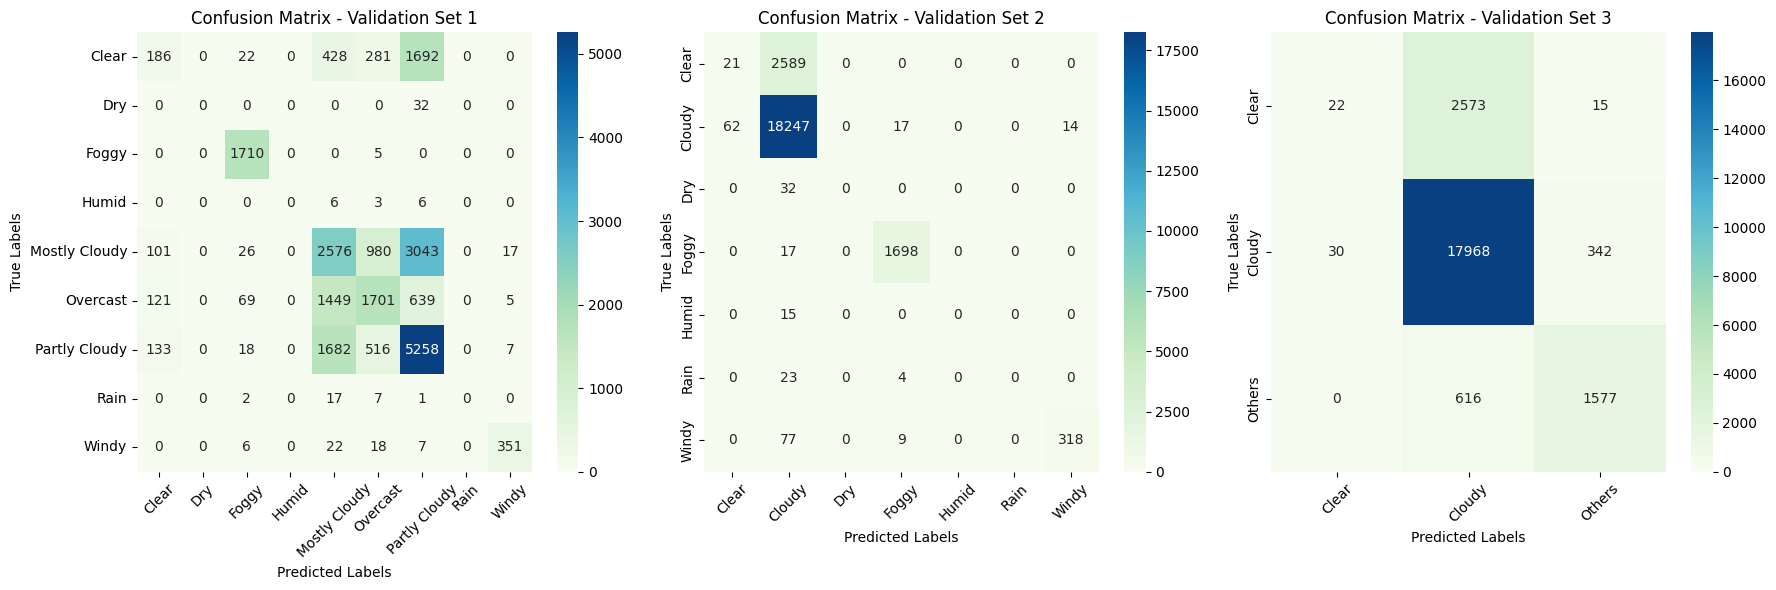

In [102]:
# create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

labels1 = sorted_dict1.values()
labels2 = sorted_dict2.values()
labels3 = sorted_dict3.values()

# plot the first histogram
cm_valid1 = confusion_matrix(y_valid1, pred_valid1)
sns.heatmap(cm_valid1, annot=True, fmt="d", cmap="GnBu", xticklabels=labels1, yticklabels=labels1, ax=axes[0])
axes[0].set_title("Confusion Matrix - Validation Set 1")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].tick_params(axis='x', rotation=45)

# plot the second histogram
cm_valid2 = confusion_matrix(y_valid2, pred_valid2)
sns.heatmap(cm_valid2, annot=True, fmt="d", cmap="GnBu", xticklabels=labels2, yticklabels=labels2, ax=axes[1])
axes[1].set_title("Confusion Matrix - Validation Set 2")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].tick_params(axis='x', rotation=45)

# plot the third histogram
cm_valid3 = confusion_matrix(y_valid3, pred_valid3)
sns.heatmap(cm_valid3, annot=True, fmt="d", cmap="GnBu", xticklabels=labels3, yticklabels=labels3, ax=axes[2])
axes[2].set_title("Confusion Matrix - Validation Set 3")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")
axes[2].tick_params(axis='x', rotation=45)

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

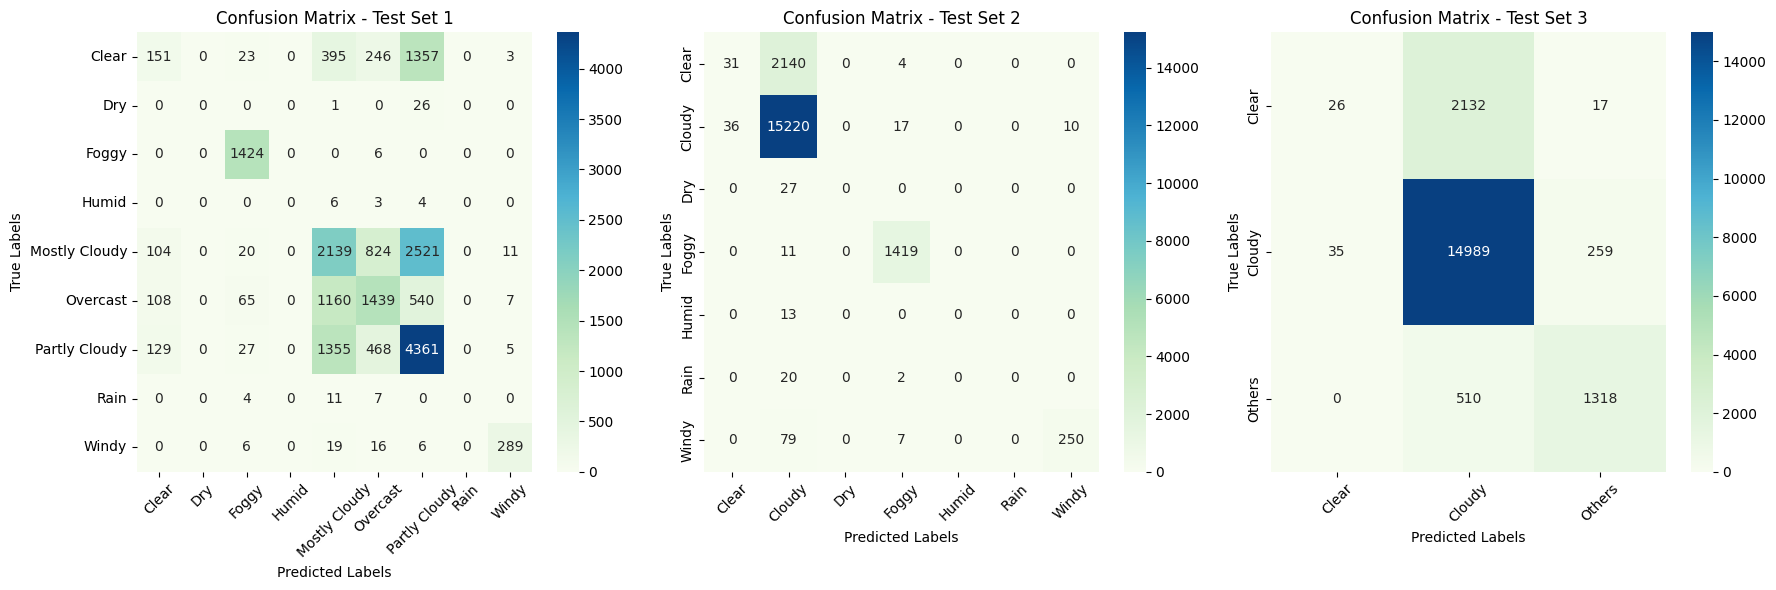

In [103]:
# create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# plot the first histogram
cm_test1 = confusion_matrix(y_test1, pred_test1)
sns.heatmap(cm_test1, annot=True, fmt="d", cmap="GnBu", xticklabels=labels1, yticklabels=labels1, ax=axes[0])
axes[0].set_title("Confusion Matrix - Test Set 1")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].tick_params(axis='x', rotation=45)

# plot the second histogram
cm_test2 = confusion_matrix(y_test2, pred_test2)
sns.heatmap(cm_test2, annot=True, fmt="d", cmap="GnBu", xticklabels=labels2, yticklabels=labels2, ax=axes[1])
axes[1].set_title("Confusion Matrix - Test Set 2")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].tick_params(axis='x', rotation=45)

# plot the third histogram
cm_test3 = confusion_matrix(y_test3, pred_test3)
sns.heatmap(cm_test3, annot=True, fmt="d", cmap="GnBu", xticklabels=labels3, yticklabels=labels3, ax=axes[2])
axes[2].set_title("Confusion Matrix - Test Set 3")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")
axes[2].tick_params(axis='x', rotation=45)

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

### Conclusion for which dataset to use:

* For Reduction 1:
    - The performance of the model on the training set, the validation set, and the testing set is very poor.
    - This is not an efficient choice, as it can also be seen from the heatmap of the cross-validation.
    - The heatmap shows a massive overlap between the three similar classes (Mostly Cloudy, Partly Cloudy, Overcast).
    - This is the reason why we won't be working with this dataset.<br><br>

* For Reduction 2:
    - The performance of the model on the sets is a lot better than the previous dataset.
    - The confusion matrix looks good, too, but not as good as the third reduction.
    - The confusion matrix shows that no correct prediction was made for the minority classes, like Dry, Humid, Rain, Windy.
    - This would not be a suitable dataset to train the remaining models on.<br><br>

* For Reduction 3:
    - The performance of the model on the sets is good.
    - The confusion matrix looks good too.
    - Since the minority classes are now merged into one, there is better prediction of those classes.
    - Previously, there were 0 correct predictions for minority classes, and after merging, there are some predictions that can be improved further using different hyperparameter values.
    - Choosing the reduction 3 dataset to train the remaining datasets on seems the appropriate choice.

In [104]:
# selecting the final dataset:
final_df = df3.copy()

In [105]:
# selecting the final training, testing, and validation sets:
F_Xtrain, F_ytrain = X_train3, y_train3
F_Xvalid, F_yvalid = X_valid3, y_valid3
F_Xtest, F_ytest = X_test3, y_test3

In [106]:
user_test1 = F_Xtest.iloc[100]         # clear
user_test2 = F_Xtest.iloc[100]         # cloudy
user_test3 = F_Xtest.iloc[100]         # others

In [107]:
Counter(F_ytrain)

Counter({1: 42794, 0: 6088, 2: 5118})

## Feature importance and features selection:

In [108]:
# using Feature Importance Technique to identify the importance of features

# separate the target variable and features
target = final_df['Encoded_Summary']
features = final_df.drop(['Summary','Encoded_Summary'], axis=1)

# initialize the Random Forest model
rf = RandomForestRegressor()

# fit the model
rf.fit(features, target)

# get the feature importances
importances = pd.Series(rf.feature_importances_, index = features.columns)

# sort the feature importances in descending order
importances = importances.sort_values(ascending = False)

# print the feature importances
print(importances)

Visibility (km)           0.445452
Wind Speed (km/h)         0.147566
Pressure (millibars)      0.102086
Temperature (C)           0.063622
Wind Bearing (degrees)    0.047747
Day                       0.047341
Humidity                  0.043947
Hour                      0.036582
Year                      0.034230
Month                     0.030172
Precip Type_snow          0.000634
Precip Type_rain          0.000621
dtype: float64


In [109]:
# using Permutation Importance technique to identify the importance of features

# instantiate a Random Forest Regressor model (you can choose a different model as per your requirements)
model = RandomForestRegressor(random_state=42)

# fit the model on the training data
model.fit(F_Xtrain, F_ytrain)

# calculate feature importance using permutation importance
results = permutation_importance(model, F_Xtest, F_ytest, n_repeats=10, random_state=42)

# get the feature importances and their corresponding names
importances = results.importances_mean
feature_names = X3.columns

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# print the feature importances
for idx in indices:
    print(f"{feature_names[idx]}: {importances[idx]}")

Visibility (km): 0.99024643575966
Wind Speed (km/h): 0.2551929742125113
Pressure (millibars): 0.15983832489371083
Hour: 0.0872839453152989
Year: 0.07233728354950877
Temperature (C): 0.07047291685707677
Humidity: 0.059518392052801204
Month: 0.053401657394634636
Day: 0.03744659047937726
Wind Bearing (degrees): 0.024665977520220206
Precip Type_snow: 0.0002668113397816585
Precip Type_rain: 0.00024908947028230434


Observing the output of both strategies, we can conclude that:
* The `Precip Type_snow` and `Precip Type_rain` are insignificant to the dataset and may affect the performance of the model

Removing both of these:

In [110]:
final_df.drop(['Precip Type_snow','Precip Type_rain'], axis = 1, inplace = True)

In [111]:
final_df

,Summary,Encoded_Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Year,Hour
0,Cloudy,1,0.506975,0.89,0.221130,0.699164,0.982983,0.569559,0.181818,1.000000,0.090909,0.956522
1,Cloudy,1,0.505085,0.86,0.223399,0.721448,0.982983,0.576446,0.181818,1.000000,0.090909,1.000000
2,Cloudy,1,0.487805,0.83,0.220877,0.749304,0.982983,0.587190,0.272727,0.000000,0.090909,0.043478
3,Cloudy,1,0.502925,0.85,0.218608,0.718663,0.928929,0.590634,0.272727,0.000000,0.090909,0.130435
4,Cloudy,1,0.478805,0.95,0.193646,0.721448,0.619620,0.591460,0.272727,0.000000,0.090909,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...
96424,Others,2,0.524615,0.94,0.082451,0.406685,0.275526,0.623416,0.818182,0.833333,1.000000,0.130435
96425,Others,2,0.523445,0.95,0.048411,0.381616,0.275526,0.623691,0.818182,0.833333,1.000000,0.173913
96426,Others,2,0.525785,0.95,0.015381,0.275766,0.275526,0.627273,0.818182,0.833333,1.000000,0.217391
96427,Others,2,0.531095,0.95,0.030257,0.988858,0.275526,0.632782,0.818182,0.833333,1.000000,0.260870


## Ensure uniformity in the split of final dataset:

In [112]:
X3 = final_df.drop(['Summary', 'Encoded_Summary'], axis = 1)
y3 = final_df['Encoded_Summary'].values

print(f"Dimensions of X: {X3.shape}")
print(f"Dimensions of y: {y3.shape}")

Dimensions of X: (96429, 10)
Dimensions of y: (96429,)


In [113]:
# split the data into training and test sets
X_train_valid3, X_test3, y_train_valid3, y_test3 = train_test_split(X3, y3, 
                                                                    test_size = 0.2, 
                                                                    random_state = 42, 
                                                                    stratify = y3)

# split the data into training and validation sets
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X_train_valid3, y_train_valid3, 
                                                          test_size = 0.3, 
                                                          random_state = 42, 
                                                          stratify = y_train_valid3)

# print the shapes of the resulting sets
print("Training set shape:", X_train3.shape, y_train3.shape)
print("Validation set shape:", X_valid3.shape, y_valid3.shape)
print("Test set shape:", X_test3.shape, y_test3.shape)

Training set shape: (54000, 10) (54000,)
Validation set shape: (23143, 10) (23143,)
Test set shape: (19286, 10) (19286,)


In [114]:
# selecting the final training, testing and validation sets:
F_Xtrain, F_ytrain = X_train3, y_train3
F_Xvalid, F_yvalid = X_valid3, y_valid3
F_Xtest, F_ytest = X_test3, y_test3

In [115]:
Counter(F_ytrain)

Counter({1: 42794, 0: 6088, 2: 5118})

## Logistic Regression

### Model 1: Default Hyperparameters

#### Training the model:

In [116]:
LR1 = LogisticRegression(max_iter = 1000)
LR1.fit(F_Xtrain, F_ytrain)

LogisticRegression(max_iter=1000)

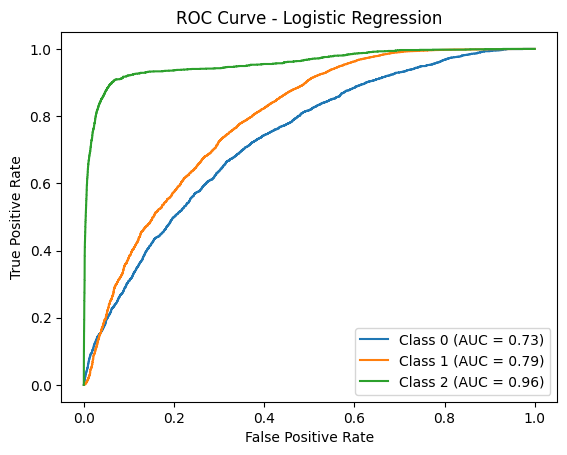

In [117]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes = range(n_classes))

# compute the decision scores for each class
lr_probabilities = LR1.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test_bin[:, i], lr_probabilities[:, i])
    lr_roc_auc[i] = auc(lr_fpr[i], lr_tpr[i])

# plot the ROC curves for the Logistic Regression classifier
plt.figure()
for i in range(n_classes):
    plt.plot(lr_fpr[i], lr_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, lr_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

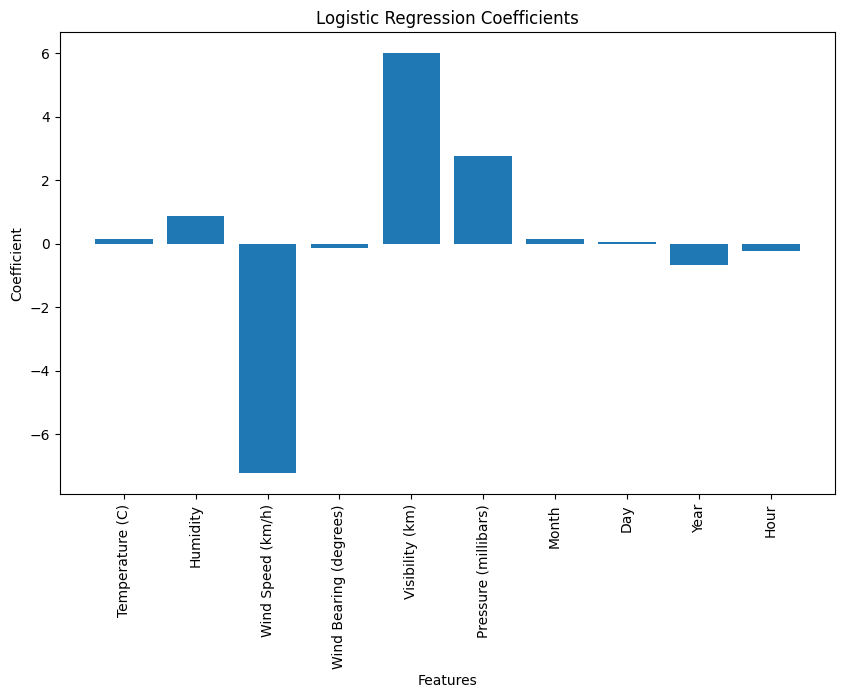

In [118]:
# get the coefficients
coefficients = LR1.coef_[0]

# plot the coefficients
plt.figure(figsize = (10, 6))
plt.bar(X3.columns, coefficients)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()

#### Evaluating the model on the sets:

In [119]:
# evaluate the model on the training set
train_score_m1 = LR1.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_m1 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_m1 = LR1.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_m1 * 100, 2)}%")

# evaluate the model on the test set
test_score_m1 = LR1.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_m1 * 100, 2)}%")

Training set accuracy: 84.67%
Validation set accuracy: 84.55%
Test set accuracy: 84.72%


#### Predicting using the model:

In [120]:
# make predictions on the validation set
pred_valid_m1 = LR1.predict(F_Xvalid)

# make predictions on the test set
pred_test_m1 = LR1.predict(F_Xtest)

#### Evaluating the predictions:

In [121]:
# for the validation set predictions:
accuracy_val_m1 = accuracy_score(F_yvalid, pred_valid_m1)      
precision_val_m1 = precision_score(F_yvalid, pred_valid_m1, average = 'weighted',zero_division=1)
recall_val_m1 = recall_score(F_yvalid, pred_valid_m1, average = 'weighted',zero_division=1)
f1_val_m1 = f1_score(F_yvalid, pred_valid_m1, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_m1 * 100, 2)}%")
print(f"Precision score: {round(precision_val_m1 * 100, 2)}%")
print(f"Recall score: {round(recall_val_m1 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_m1 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 84.55%
Precision score: 79.54%
Recall score: 84.55%
F1-score score: 79.5%


In [122]:
# for the test set predictions:
accuracy_test_m1 = accuracy_score(F_ytest, pred_test_m1)      
precision_test_m1 = precision_score(F_ytest, pred_test_m1, average = 'weighted',zero_division=1)
recall_test_m1 = recall_score(F_ytest, pred_test_m1, average = 'weighted',zero_division=1)
f1_test_m1 = f1_score(F_ytest, pred_test_m1, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_m1 * 100, 2)}%")
print(f"Precision score: {round(precision_test_m1 * 100, 2)}%")
print(f"Recall score: {round(recall_test_m1 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_m1 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 84.72%
Precision score: 80.64%
Recall score: 84.72%
F1-score score: 79.75%


In [123]:
actual_labels = df3['Summary'].tolist()
encoded_labels = df3['Encoded_Summary'].tolist()

mapping = dict(list(set(zip(encoded_labels, actual_labels))))
sorted_dict = dict(sorted(mapping.items()))
sorted_dict

{0: 'Clear', 1: 'Cloudy', 2: 'Others'}

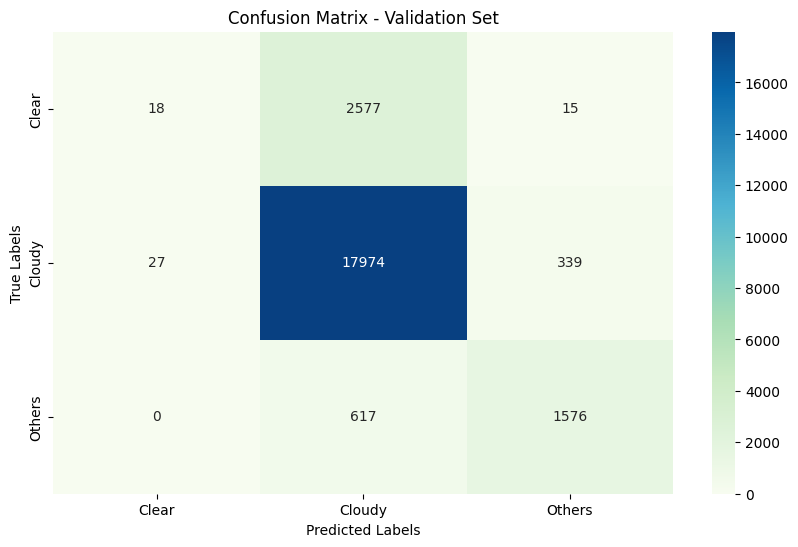

In [124]:
# create a confusion matrix for validation set predictions
cm_valid_m1 = confusion_matrix(F_yvalid, pred_valid_m1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_m1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [125]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_m1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index = class_labels, columns = class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index = class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20506,2592,18,27
Cloudy,1609,366,17974,3194
Others,20596,617,1576,354


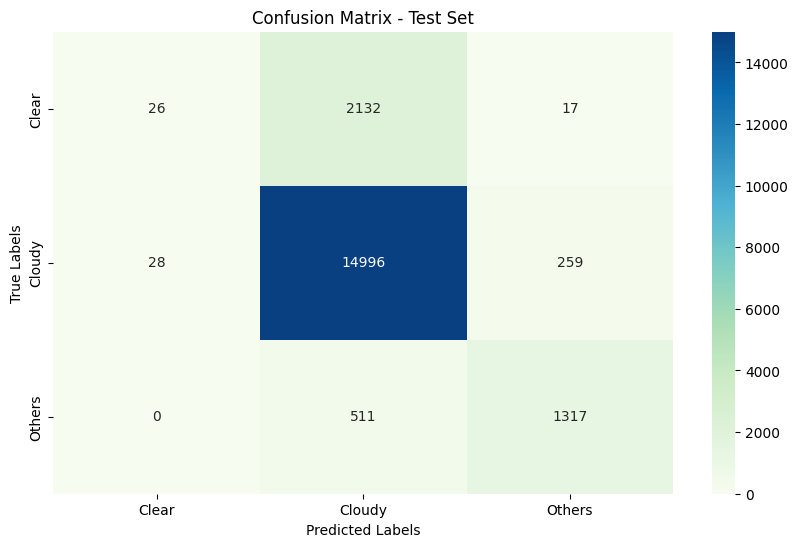

In [126]:
# create a confusion matrix for test set predictions
cm_test_m1 = confusion_matrix(F_ytest, pred_test_m1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_m1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [127]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_m1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index = class_labels, columns = class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index = class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,17083,2149,26,28
Cloudy,1360,287,14996,2643
Others,17182,511,1317,276


In [128]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels1 = [sorted_dict[label] for label in pred_valid_m1]

print(classification_report(y_valid_labels, pred_valid_labels1,zero_division=1))

              precision    recall  f1-score   support

       Clear       0.40      0.01      0.01      2610
      Cloudy       0.85      0.98      0.91     18340
      Others       0.82      0.72      0.76      2193

    accuracy                           0.85     23143
   macro avg       0.69      0.57      0.56     23143
weighted avg       0.80      0.85      0.80     23143



In [129]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels1 = [sorted_dict[label] for label in pred_test_m1]

print(classification_report(y_test_labels, pred_test_labels1,zero_division=1))

              precision    recall  f1-score   support

       Clear       0.48      0.01      0.02      2175
      Cloudy       0.85      0.98      0.91     15283
      Others       0.83      0.72      0.77      1828

    accuracy                           0.85     19286
   macro avg       0.72      0.57      0.57     19286
weighted avg       0.81      0.85      0.80     19286



### Model 2: Custom Values for Hyperparameters

#### Training the model:

In [130]:
LR2 = LogisticRegression(max_iter = 1000, penalty = 'l1', C = 0.0045, solver = 'saga', multi_class = 'multinomial')
LR2.fit(F_Xtrain, F_ytrain)

LogisticRegression(C=0.0045, max_iter=1000, multi_class='multinomial',
                   penalty='l1', solver='saga')

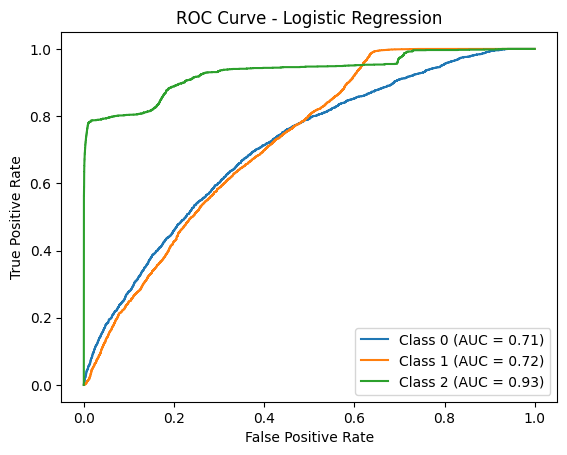

In [131]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the decision scores for each class
lr_probabilities = LR2.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test_bin[:, i], lr_probabilities[:, i])
    lr_roc_auc[i] = auc(lr_fpr[i], lr_tpr[i])

# plot the ROC curves for the Logistic Regression classifier
plt.figure()
for i in range(n_classes):
    plt.plot(lr_fpr[i], lr_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, lr_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

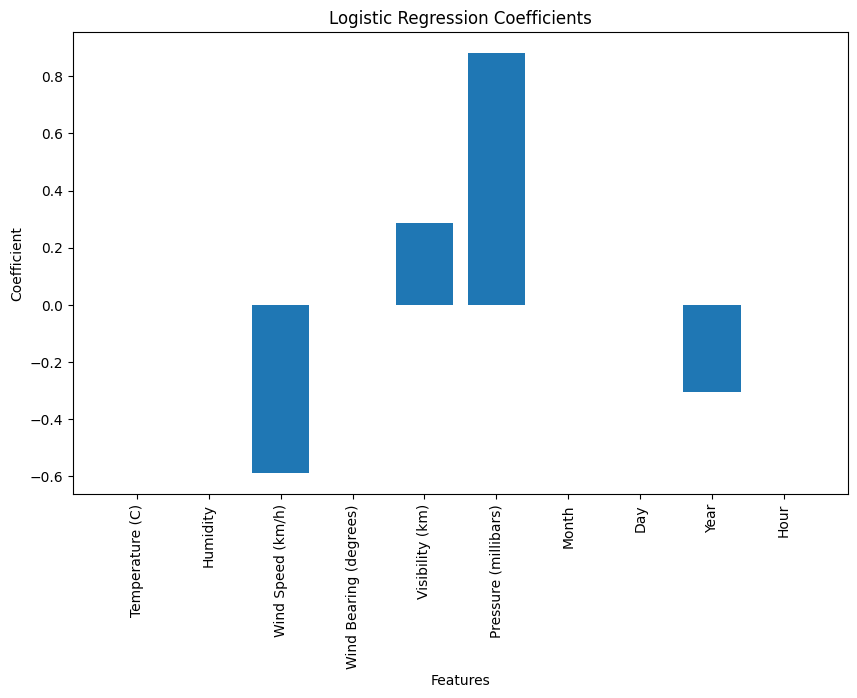

In [132]:
# get the coefficients
coefficients = LR2.coef_[0]

# plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X3.columns, coefficients)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()

#### Evaluating the model on the sets:

In [133]:
# evaluate the model on the training set
train_score_m2 = LR2.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_m2 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_m2 = LR2.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_m2 * 100, 2)}%")

# evaluate the model on the test set
test_score_m2 = LR2.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_m2 * 100, 2)}%")

Training set accuracy: 85.5%
Validation set accuracy: 85.49%
Test set accuracy: 85.39%


#### Predicting using the model:

In [134]:
# make predictions on the validation set
pred_valid_m2 = LR2.predict(F_Xvalid)

# make predictions on the test set
pred_test_m2 = LR2.predict(F_Xtest)

#### Evaluating the predictions:

In [135]:
# for the validation set predictions:
accuracy_val_m2 = accuracy_score(F_yvalid, pred_valid_m2)      
precision_val_m2 = precision_score(F_yvalid, pred_valid_m2, average = 'weighted',zero_division=1)
recall_val_m2 = recall_score(F_yvalid, pred_valid_m2, average = 'weighted',zero_division=1)
f1_val_m2 = f1_score(F_yvalid, pred_valid_m2, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_m2 * 100, 2)}%")
print(f"Precision score: {round(precision_val_m2 * 100, 2)}%")
print(f"Recall score: {round(recall_val_m2 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_m2 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 85.49%
Precision score: 87.66%
Recall score: 85.49%
F1-score score: 80.15%


In [136]:
# for the test set predictions:
accuracy_test_m2 = accuracy_score(F_ytest, pred_test_m2)      
precision_test_m2 = precision_score(F_ytest, pred_test_m2, average = 'weighted',zero_division=1)
recall_test_m2 = recall_score(F_ytest, pred_test_m2, average = 'weighted',zero_division=1)
f1_test_m2 = f1_score(F_ytest, pred_test_m2, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_m2 * 100, 2)}%")
print(f"Precision score: {round(precision_test_m2 * 100, 2)}%")
print(f"Recall score: {round(recall_test_m2 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_m2 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 85.39%
Precision score: 87.57%
Recall score: 85.39%
F1-score score: 80.03%


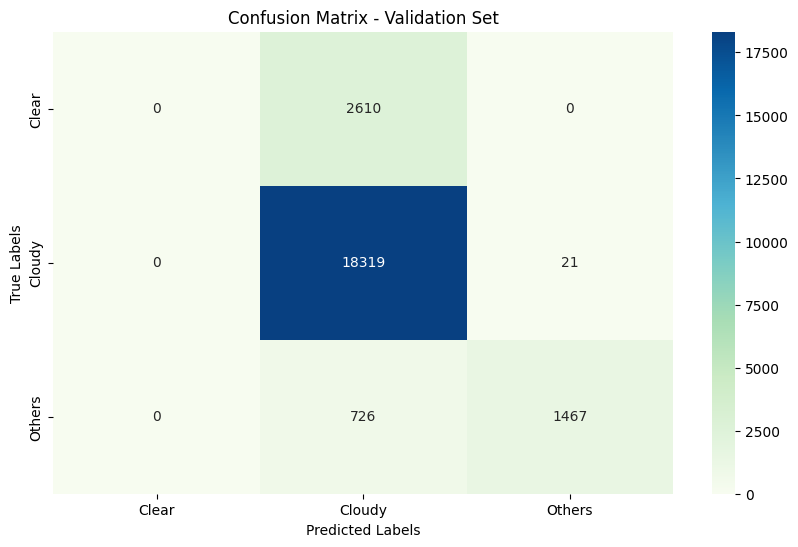

In [137]:
# create confusion matrix for validation set predictions
cm_valid_m2 = confusion_matrix(F_yvalid, pred_valid_m2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_m2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [138]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_m2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20533,2610,0,0
Cloudy,1467,21,18319,3336
Others,20929,726,1467,21


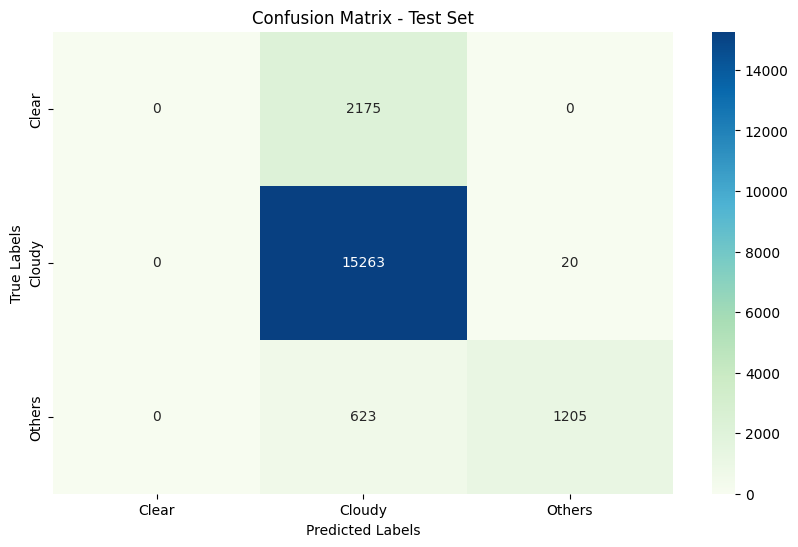

In [139]:
# create confusion matrix for test set predictions
cm_test_m2 = confusion_matrix(F_ytest, pred_test_m2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_m2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [140]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_m2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,17111,2175,0,0
Cloudy,1205,20,15263,2798
Others,17438,623,1205,20


In [141]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels2 = [sorted_dict[label] for label in pred_valid_m2]

print(classification_report(y_valid_labels, pred_valid_labels2,zero_division=1))

              precision    recall  f1-score   support

       Clear       1.00      0.00      0.00      2610
      Cloudy       0.85      1.00      0.92     18340
      Others       0.99      0.67      0.80      2193

    accuracy                           0.85     23143
   macro avg       0.94      0.56      0.57     23143
weighted avg       0.88      0.85      0.80     23143



In [142]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels2 = [sorted_dict[label] for label in pred_test_m2]

print(classification_report(y_test_labels, pred_test_labels2,zero_division=1))

              precision    recall  f1-score   support

       Clear       1.00      0.00      0.00      2175
      Cloudy       0.85      1.00      0.92     15283
      Others       0.98      0.66      0.79      1828

    accuracy                           0.85     19286
   macro avg       0.94      0.55      0.57     19286
weighted avg       0.88      0.85      0.80     19286



### Model 3: Custom Values Hyperparameters

#### Training the model:

In [143]:
LR3 = LogisticRegression(max_iter = 1000, penalty = 'elasticnet', l1_ratio = 0.3,
                         C = 0.005, solver = 'saga', multi_class = 'multinomial')

LR3.fit(F_Xtrain, F_ytrain)

LogisticRegression(C=0.005, l1_ratio=0.3, max_iter=1000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

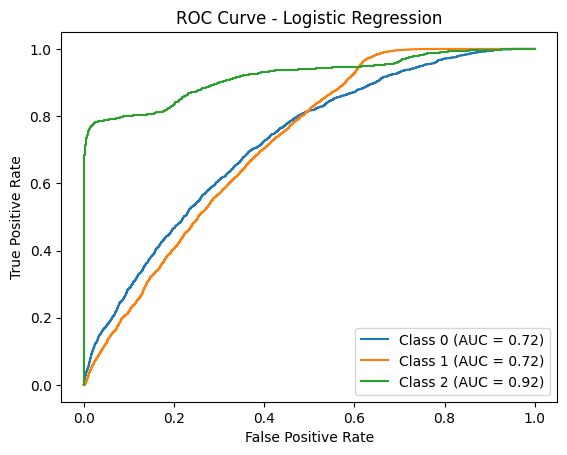

In [144]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the decision scores for each class
lr_probabilities = LR3.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test_bin[:, i], lr_probabilities[:, i])
    lr_roc_auc[i] = auc(lr_fpr[i], lr_tpr[i])

# plot the ROC curves for the Logistic Regression classifier
plt.figure()
for i in range(n_classes):
    plt.plot(lr_fpr[i], lr_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, lr_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

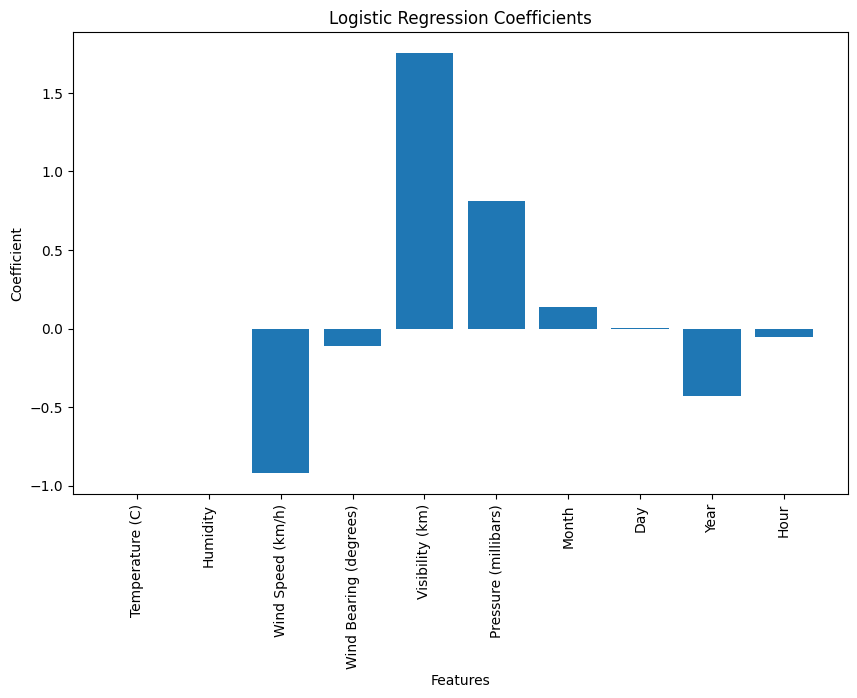

In [145]:
# get the coefficients
coefficients = LR3.coef_[0]

# plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X3.columns, coefficients)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()

#### Evaluating the model on the sets:

In [146]:
# evaluate the model on the training set
train_score_m3 = LR3.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_m3 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_m3 = LR3.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_m3 * 100, 2)}%")

# evaluate the model on the test set
test_score_m3 = LR3.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_m3 * 100, 2)}%")

Training set accuracy: 83.47%
Validation set accuracy: 83.46%
Test set accuracy: 83.52%


#### Predicting using the model:

In [147]:
# make predictions on the validation set
pred_valid_m3 = LR3.predict(F_Xvalid)

# make predictions on the test set
pred_test_m3 = LR3.predict(F_Xtest)

#### Evaluating the predictions:

In [148]:
# for the validation set predictions:
accuracy_val_m3 = accuracy_score(F_yvalid, pred_valid_m3)      
precision_val_m3 = precision_score(F_yvalid, pred_valid_m3, average = 'weighted',zero_division=1)
recall_val_m3 = recall_score(F_yvalid, pred_valid_m3, average = 'weighted',zero_division=1)
f1_val_m3 = f1_score(F_yvalid, pred_valid_m3, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_m3 * 100, 2)}%")
print(f"Precision score: {round(precision_val_m3 * 100, 2)}%")
print(f"Recall score: {round(recall_val_m3 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_m3 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 83.46%
Precision score: 86.32%
Recall score: 83.46%
F1-score score: 77.59%


In [149]:
# for the test set predictions:
accuracy_test_m3 = accuracy_score(F_ytest, pred_test_m3)      
precision_test_m3 = precision_score(F_ytest, pred_test_m3, average = 'weighted',zero_division=1)
recall_test_m3 = recall_score(F_ytest, pred_test_m3, average = 'weighted',zero_division=1)
f1_test_m3 = f1_score(F_ytest, pred_test_m3, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_m3 * 100, 2)}%")
print(f"Precision score: {round(precision_test_m3 * 100, 2)}%")
print(f"Recall score: {round(recall_test_m3 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_m3 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 83.52%
Precision score: 86.35%
Recall score: 83.52%
F1-score score: 77.67%


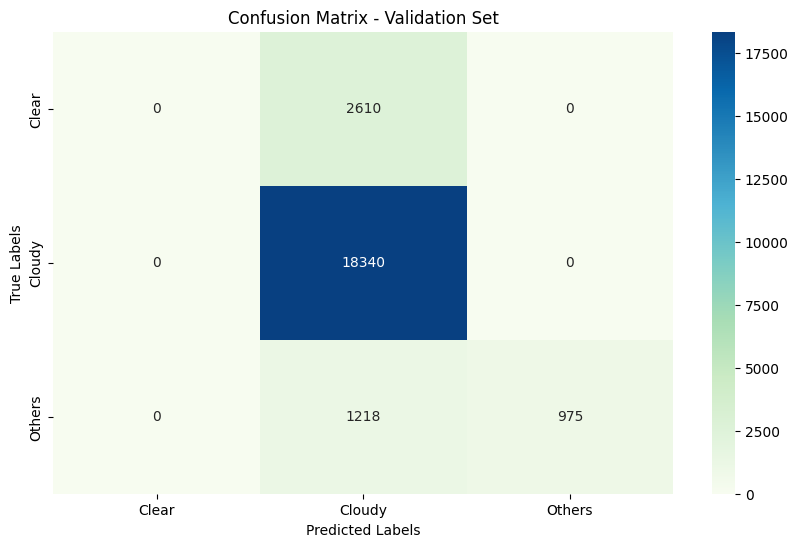

In [150]:
# create a confusion matrix for validation set predictions
cm_valid_m3 = confusion_matrix(F_yvalid, pred_valid_m3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_m3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [151]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_m3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20533,2610,0,0
Cloudy,975,0,18340,3828
Others,20950,1218,975,0


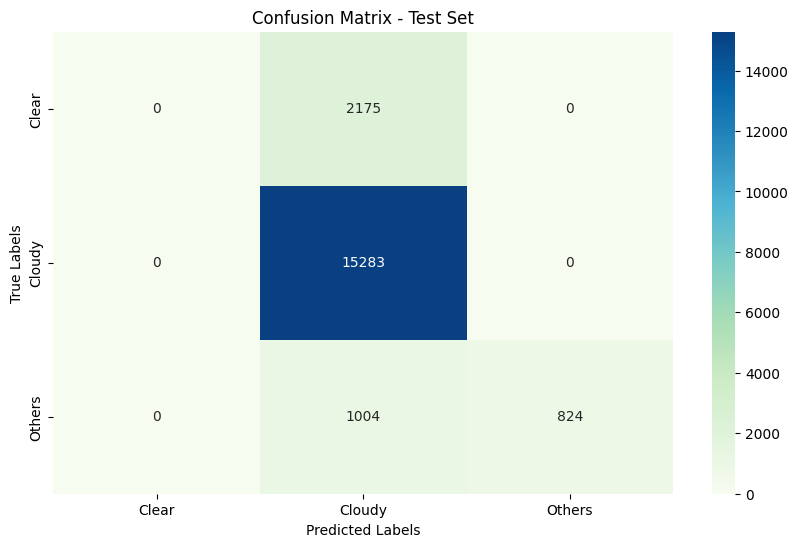

In [152]:
# create a confusion matrix for test set predictions
cm_test_m3 = confusion_matrix(F_ytest, pred_test_m3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_m3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [153]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_m3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,17111,2175,0,0
Cloudy,824,0,15283,3179
Others,17458,1004,824,0


In [154]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_m3]

print(classification_report(y_valid_labels, pred_valid_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       1.00      0.00      0.00      2610
      Cloudy       0.83      1.00      0.91     18340
      Others       1.00      0.44      0.62      2193

    accuracy                           0.83     23143
   macro avg       0.94      0.48      0.51     23143
weighted avg       0.86      0.83      0.78     23143



In [155]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_m3]

print(classification_report(y_test_labels, pred_test_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       1.00      0.00      0.00      2175
      Cloudy       0.83      1.00      0.91     15283
      Others       1.00      0.45      0.62      1828

    accuracy                           0.84     19286
   macro avg       0.94      0.48      0.51     19286
weighted avg       0.86      0.84      0.78     19286



## Decision Tree

### Model 1: Default Hyperparameters

#### Training the model:

In [156]:
tree1 = DecisionTreeClassifier(random_state = 42)
tree1.fit(F_Xtrain, F_ytrain)

DecisionTreeClassifier(random_state=42)

In [157]:
feature_names = final_df.columns[2:]
target_name = y3.astype(str)

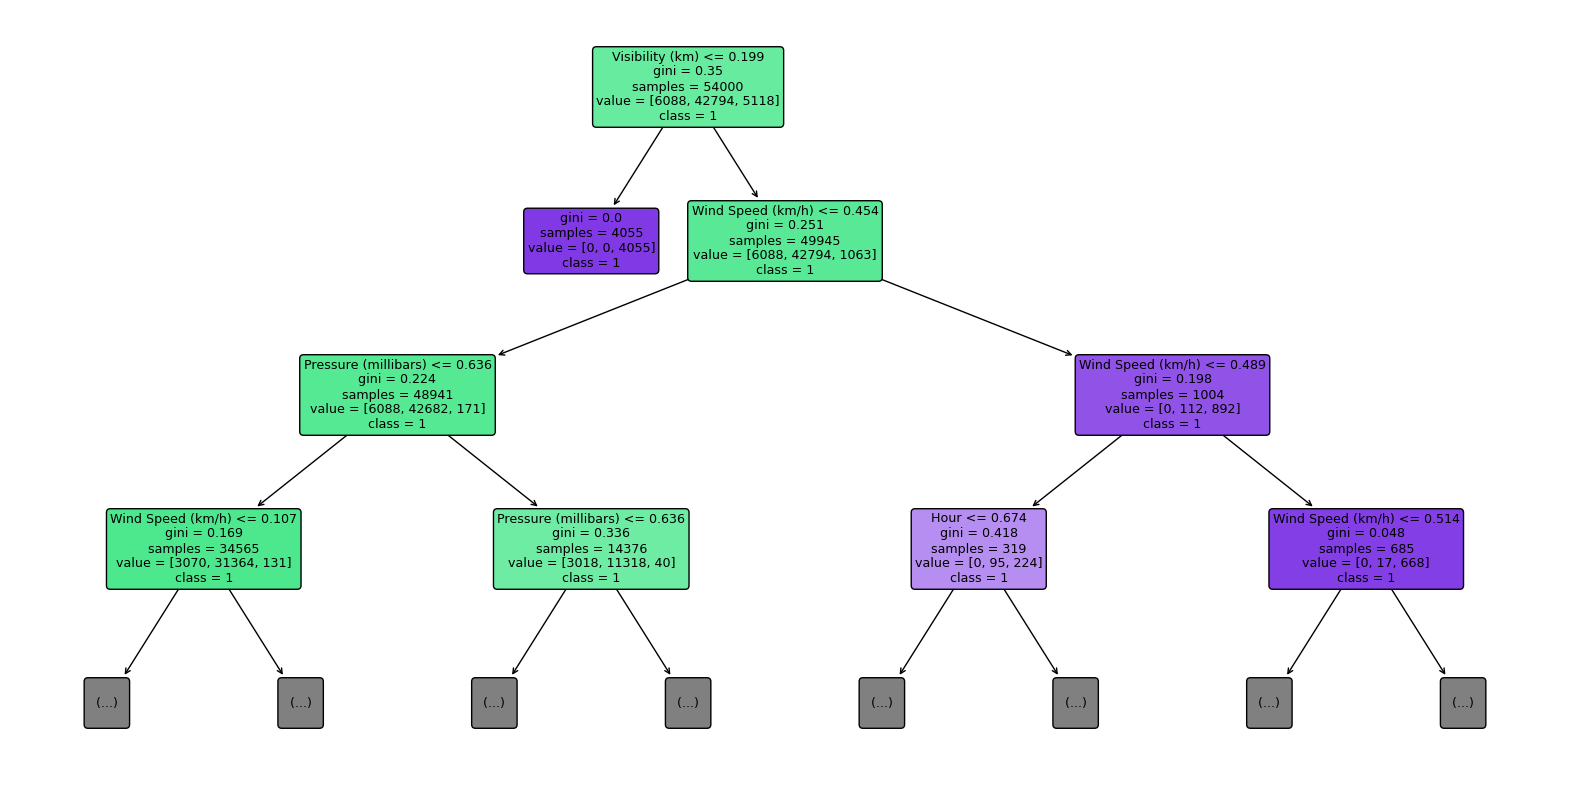

In [158]:
# visualize the model, plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree1, feature_names = feature_names, class_names = target_name,
          filled = True, rounded = True, max_depth = 3)

plt.show()

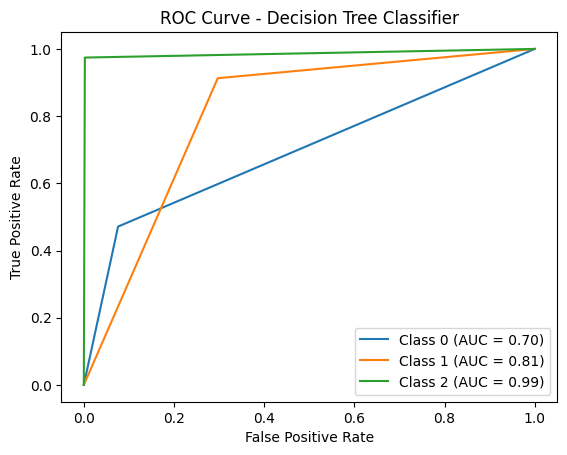

In [159]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the decision scores for each class
dt_decision_scores = tree1.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_decision_scores[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])

# plot the ROC curves for the Decision Tree classifier
plt.figure()
for i in range(n_classes):
    plt.plot(dt_fpr[i], dt_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, dt_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend()
plt.show()

#### Evaluating the model on the sets:

In [160]:
# evaluate the model on the training set
train_score_tree1 = tree1.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_tree1 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_tree1 = tree1.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_tree1 * 100, 2)}%")

# evaluate the model on the test set
test_score_tree1 = tree1.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_tree1 * 100, 2)}%")

Training set accuracy: 100.0%
Validation set accuracy: 87.18%
Test set accuracy: 86.89%


#### Predicting using the model:

In [161]:
# make predictions on the validation set
pred_valid_tree1 = tree1.predict(F_Xvalid)

# make predictions on the test set
pred_test_tree1 = tree1.predict(F_Xtest)

#### Evaluating the predictions:

In [162]:
# for the validation set predictions:
accuracy_val_tree1 = accuracy_score(F_yvalid, pred_valid_tree1)      
precision_val_tree1 = precision_score(F_yvalid, pred_valid_tree1, average = 'weighted')
recall_val_tree1 = recall_score(F_yvalid, pred_valid_tree1, average = 'weighted')
f1_val_tree1 = f1_score(F_yvalid, pred_valid_tree1, average = 'weighted')                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_tree1 * 100, 2)}%")
print(f"Precision score: {round(precision_val_tree1 * 100, 2)}%")
print(f"Recall score: {round(recall_val_tree1 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_tree1 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 87.18%
Precision score: 87.48%
Recall score: 87.18%
F1-score score: 87.32%


In [163]:
# for the test set predictions:
accuracy_test_tree1 = accuracy_score(F_ytest, pred_test_tree1)      
precision_test_tree1 = precision_score(F_ytest, pred_test_tree1, average = 'weighted')
recall_test_tree1 = recall_score(F_ytest, pred_test_tree1, average = 'weighted')
f1_test_tree1 = f1_score(F_ytest, pred_test_tree1, average = 'weighted')                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_tree1 * 100, 2)}%")
print(f"Precision score: {round(precision_test_tree1 * 100, 2)}%")
print(f"Recall score: {round(recall_test_tree1 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_tree1 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 86.89%
Precision score: 87.26%
Recall score: 86.89%
F1-score score: 87.07%


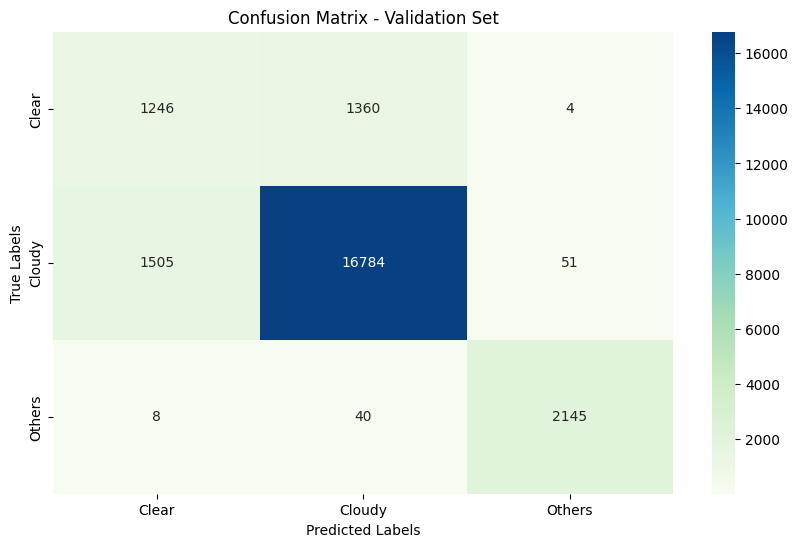

In [164]:
# create a confusion matrix for validation set predictions
cm_valid_tree1 = confusion_matrix(F_yvalid, pred_valid_tree1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_tree1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [165]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_tree1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,19020,1364,1246,1513
Cloudy,3403,1556,16784,1400
Others,20895,48,2145,55


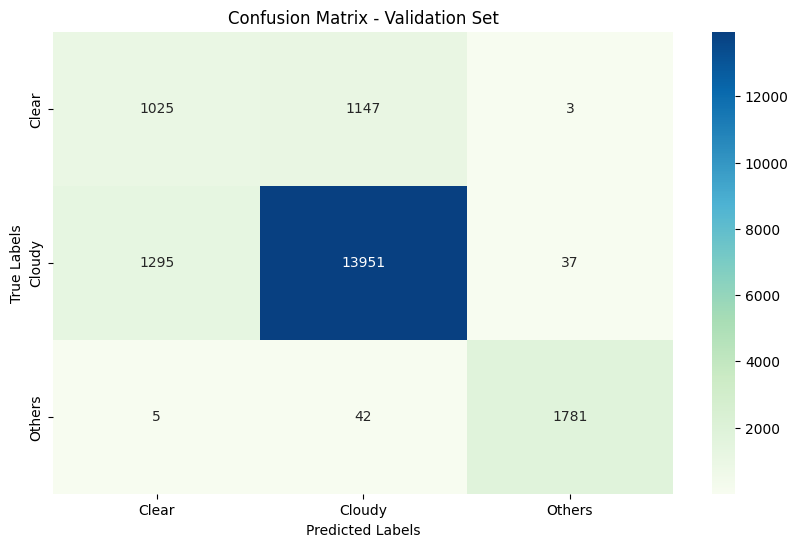

In [166]:
# create a confusion matrix for test set predictions
cm_test_tree1 = confusion_matrix(F_ytest, pred_test_tree1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_tree1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [167]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_tree1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,15811,1150,1025,1300
Cloudy,2814,1332,13951,1189
Others,17418,47,1781,40


In [168]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_tree1]

print(classification_report(y_valid_labels, pred_valid_labels3))

              precision    recall  f1-score   support

       Clear       0.45      0.48      0.46      2610
      Cloudy       0.92      0.92      0.92     18340
      Others       0.97      0.98      0.98      2193

    accuracy                           0.87     23143
   macro avg       0.78      0.79      0.79     23143
weighted avg       0.87      0.87      0.87     23143



In [169]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_tree1]

print(classification_report(y_test_labels, pred_test_labels3))

              precision    recall  f1-score   support

       Clear       0.44      0.47      0.46      2175
      Cloudy       0.92      0.91      0.92     15283
      Others       0.98      0.97      0.98      1828

    accuracy                           0.87     19286
   macro avg       0.78      0.79      0.78     19286
weighted avg       0.87      0.87      0.87     19286



### Model 2: Custom Values for Hyperparameters

#### Training the model:

In [170]:
tree2 = DecisionTreeClassifier(max_depth = 5 , min_samples_split = 5, random_state = 42, criterion = 'entropy')
tree2.fit(F_Xtrain, F_ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       random_state=42)

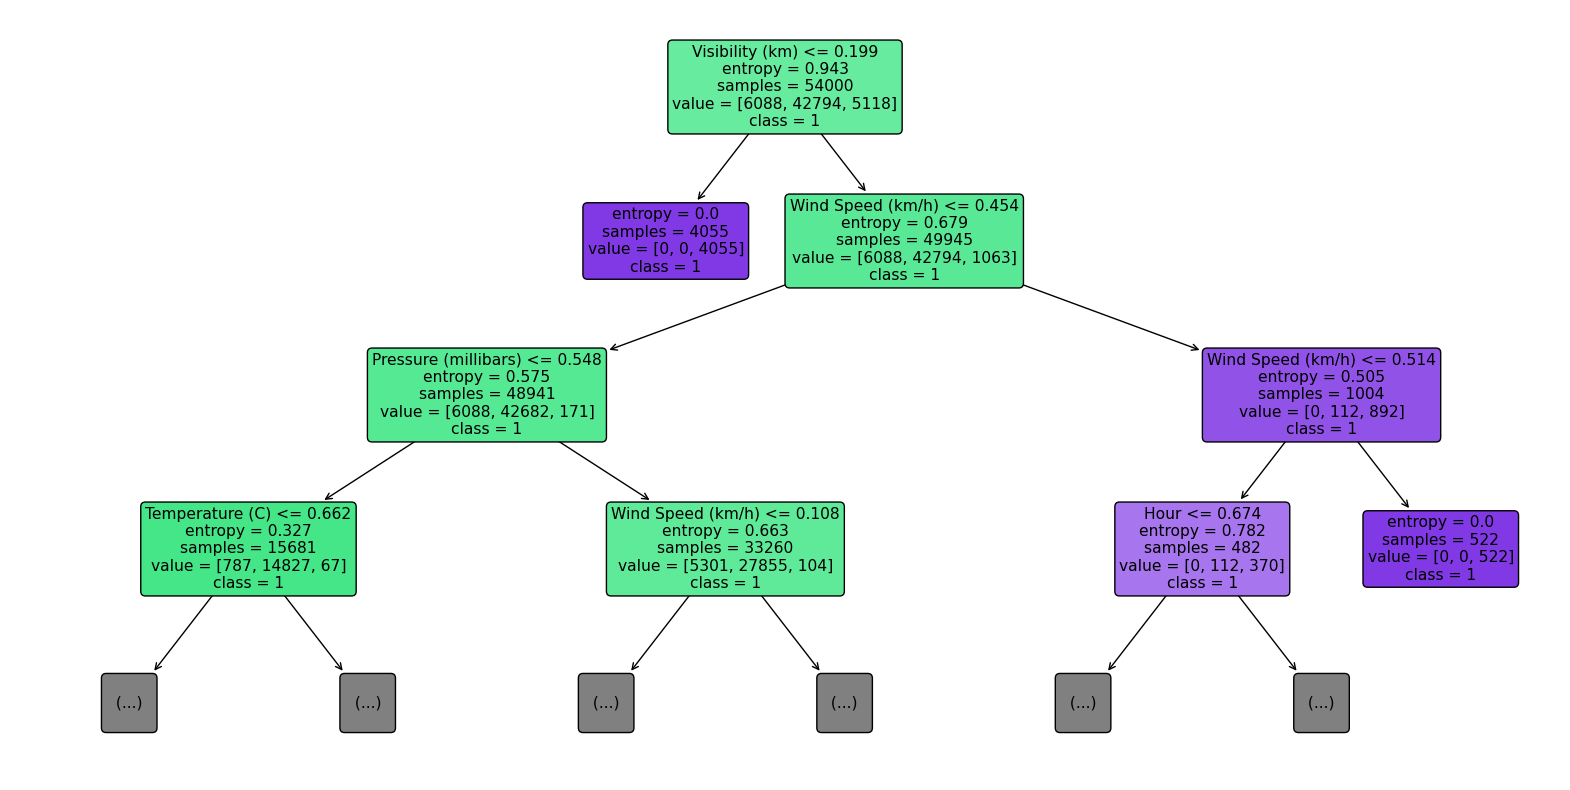

In [171]:
# visualize the model, plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree2, feature_names = feature_names, class_names = target_name,
          filled = True, rounded = True, max_depth = 3)

plt.show()

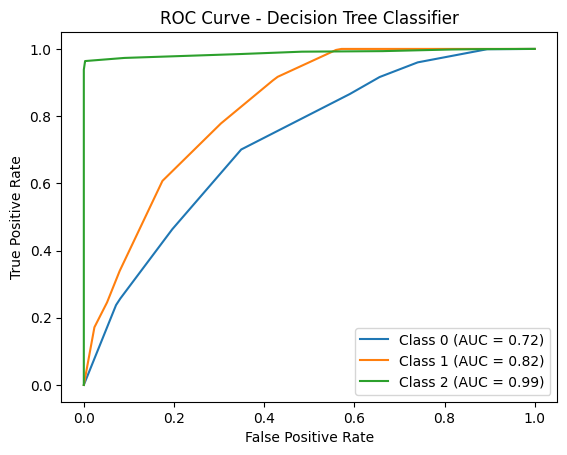

In [172]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the decision scores for each class
dt_decision_scores = tree2.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_decision_scores[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])

# plot the ROC curves for the Decision Tree classifier
plt.figure()
for i in range(n_classes):
    plt.plot(dt_fpr[i], dt_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, dt_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend()
plt.show()

#### Evaluating the model on the sets:

In [173]:
# evaluate the model on the training set
train_score_tree2 = tree2.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_tree2 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_tree2 = tree2.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_tree2 * 100, 2)}%")

# evaluate the model on the test set
test_score_tree2 = tree2.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_tree2 * 100, 2)}%")

Training set accuracy: 88.2%
Validation set accuracy: 88.27%
Test set accuracy: 88.14%


#### Predicting using the model:

In [174]:
# make predictions on the validation set
pred_valid_tree2 = tree2.predict(F_Xvalid)

# make predictions on the test set
pred_test_tree2 = tree2.predict(F_Xtest)

#### Evaluating the predictions:

In [175]:
# for the validation set predictions:
accuracy_val_tree2 = accuracy_score(F_yvalid, pred_valid_tree2)      
precision_val_tree2 = precision_score(F_yvalid, pred_valid_tree2, average = 'weighted',zero_division=1)
recall_val_tree2 = recall_score(F_yvalid, pred_valid_tree2, average = 'weighted',zero_division=1)
f1_val_tree2 = f1_score(F_yvalid, pred_valid_tree2, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_tree2 * 100, 2)}%")
print(f"Precision score: {round(precision_val_tree2 * 100, 2)}%")
print(f"Recall score: {round(recall_val_tree2 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_tree2 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 88.27%
Precision score: 89.71%
Recall score: 88.27%
F1-score score: 83.02%


In [176]:
# for the test set predictions:
accuracy_test_tree2 = accuracy_score(F_ytest, pred_test_tree2)      
precision_test_tree2 = precision_score(F_ytest, pred_test_tree2, average = 'weighted',zero_division=1)
recall_test_tree2 = recall_score(F_ytest, pred_test_tree2, average = 'weighted',zero_division=1)
f1_test_tree2 = f1_score(F_ytest, pred_test_tree2, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_tree2 * 100, 2)}%")
print(f"Precision score: {round(precision_test_tree2 * 100, 2)}%")
print(f"Recall score: {round(recall_test_tree2 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_tree2 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 88.14%
Precision score: 89.59%
Recall score: 88.14%
F1-score score: 82.89%


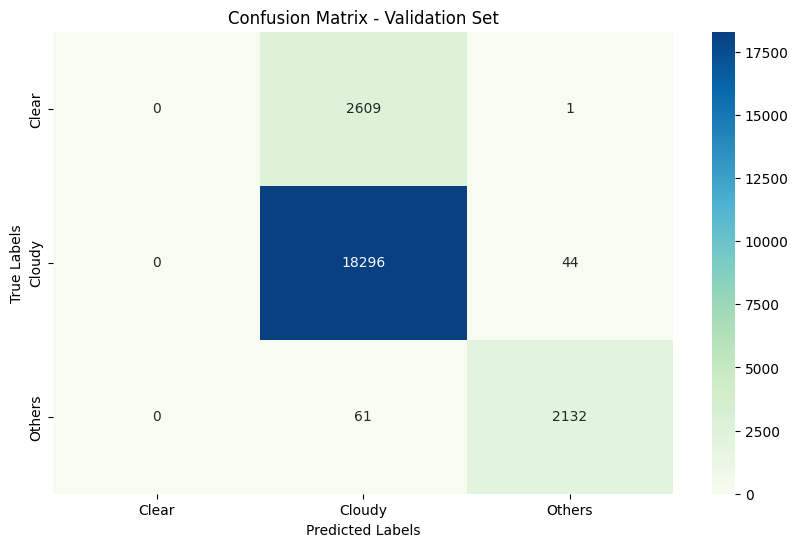

In [177]:
# create a confusion matrix for validation set predictions
cm_valid_tree2 = confusion_matrix(F_yvalid, pred_valid_tree2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_tree2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [178]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_tree2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20533,2610,0,0
Cloudy,2133,44,18296,2670
Others,20905,61,2132,45


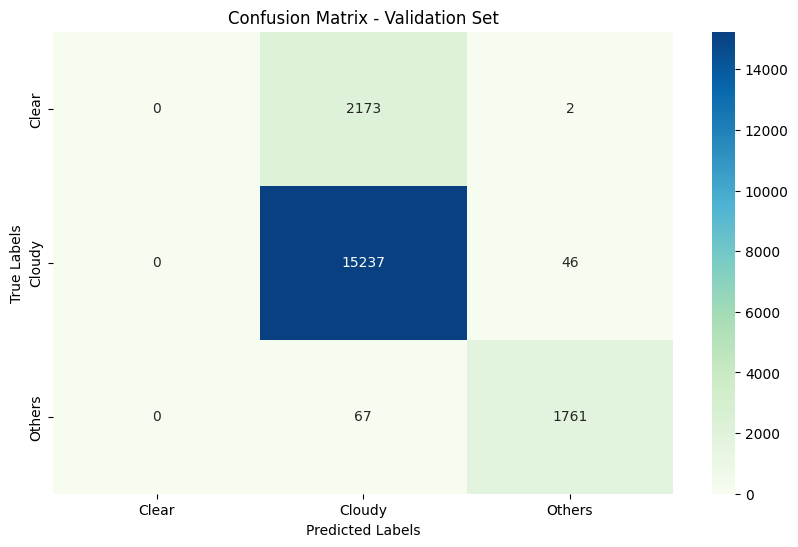

In [179]:
# create a confusion matrix for test set predictions
cm_test_tree2 = confusion_matrix(F_ytest, pred_test_tree2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_tree2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [180]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_tree2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,17111,2175,0,0
Cloudy,1763,46,15237,2240
Others,17410,67,1761,48


In [181]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_tree2]

print(classification_report(y_valid_labels, pred_valid_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       1.00      0.00      0.00      2610
      Cloudy       0.87      1.00      0.93     18340
      Others       0.98      0.97      0.98      2193

    accuracy                           0.88     23143
   macro avg       0.95      0.66      0.64     23143
weighted avg       0.90      0.88      0.83     23143



In [182]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_tree2]

print(classification_report(y_test_labels, pred_test_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       1.00      0.00      0.00      2175
      Cloudy       0.87      1.00      0.93     15283
      Others       0.97      0.96      0.97      1828

    accuracy                           0.88     19286
   macro avg       0.95      0.65      0.63     19286
weighted avg       0.90      0.88      0.83     19286



### Model 3: Hyperparameter Tuning and Cross-Validation

#### Training the model:

In [183]:
param_grid = {
    'max_depth': [2, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

tree_gs = DecisionTreeClassifier(random_state = 42, criterion = 'entropy')
grid_search_tree = GridSearchCV(tree_gs, param_grid, cv = 5)
grid_search_tree.fit(F_Xtrain, F_ytrain)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [2, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [184]:
# get the best model, its hyperparameters, and cross-validation scores
tree3 = grid_search_tree.best_estimator_
best_params_tree = grid_search_tree.best_params_
cv_results_tree = grid_search_tree.cv_results_
print(f"Best model with best hyperparameters:\n{tree3}")

Best model with best hyperparameters:
DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=20, random_state=42)


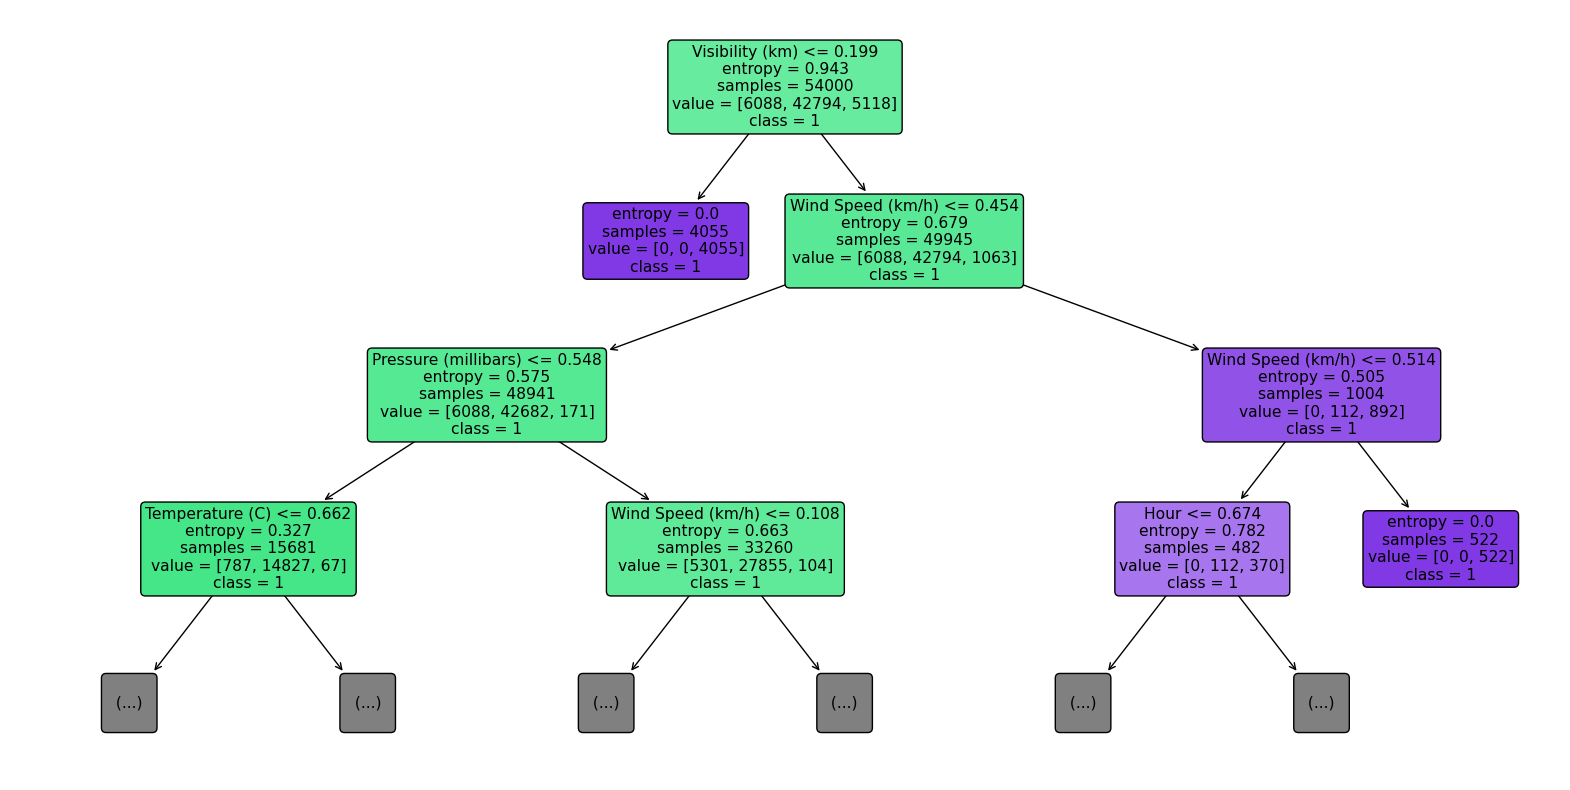

In [185]:
# visualize the model, plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree3, feature_names = feature_names, class_names = target_name,
          filled = True, rounded = True, max_depth = 3)

plt.show()

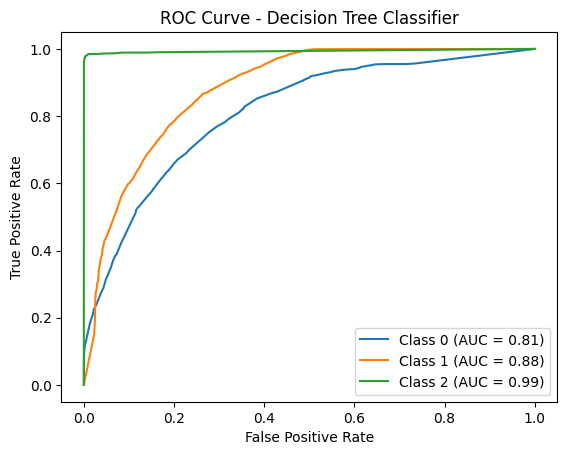

In [186]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the decision scores for each class
dt_decision_scores = tree3.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_decision_scores[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])

# plot the ROC curves for the Decision Tree classifier
plt.figure()
for i in range(n_classes):
    plt.plot(dt_fpr[i], dt_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, dt_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend()
plt.show()

#### Evaluating the model on the sets:

In [187]:
# evaluate the model on the training set
train_score_tree3 = tree3.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_tree3 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_tree3 = tree3.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_tree3 * 100, 2)}%")

# evaluate the model on the test set
test_score_tree3 = tree3.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_tree3 * 100, 2)}%")

Training set accuracy: 90.03%
Validation set accuracy: 89.35%
Test set accuracy: 89.2%


#### Predicting using the model:

In [188]:
# make predictions on the validation set
pred_valid_tree3 = tree3.predict(F_Xvalid)

# make predictions on the test set
pred_test_tree3 = tree3.predict(F_Xtest)

#### Evaluating the predictions:

In [189]:
# for the validation set predictions:
accuracy_val_tree3 = accuracy_score(F_yvalid, pred_valid_tree3)      
precision_val_tree3 = precision_score(F_yvalid, pred_valid_tree3, average = 'weighted')
recall_val_tree3 = recall_score(F_yvalid, pred_valid_tree3, average = 'weighted')
f1_val_tree3 = f1_score(F_yvalid, pred_valid_tree3, average = 'weighted')                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_tree3 * 100, 2)}%")
print(f"Precision score: {round(precision_val_tree3 * 100, 2)}%")
print(f"Recall score: {round(recall_val_tree3 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_tree3 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 89.35%
Precision score: 87.31%
Recall score: 89.35%
F1-score score: 86.72%


In [190]:
# for the test set predictions:
accuracy_test_tree3 = accuracy_score(F_ytest, pred_test_tree3)      
precision_test_tree3 = precision_score(F_ytest, pred_test_tree3, average = 'weighted')
recall_test_tree3 = recall_score(F_ytest, pred_test_tree3, average = 'weighted')
f1_test_tree3 = f1_score(F_ytest, pred_test_tree3, average = 'weighted')                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_tree3 * 100, 2)}%")
print(f"Precision score: {round(precision_test_tree3 * 100, 2)}%")
print(f"Recall score: {round(recall_test_tree3 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_tree3 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 89.2%
Precision score: 87.1%
Recall score: 89.2%
F1-score score: 86.64%


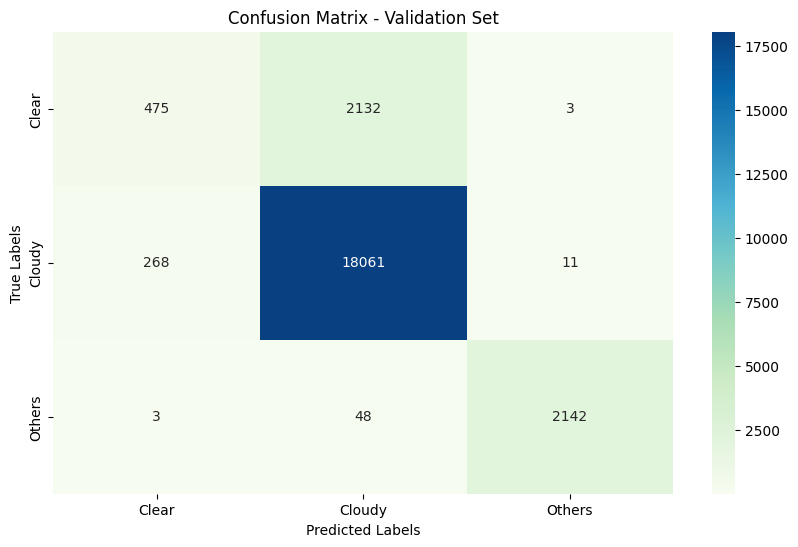

In [191]:
# create a confusion matrix for validation set predictions
cm_valid_tree3 = confusion_matrix(F_yvalid, pred_valid_tree3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_tree3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [192]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_tree3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20262,2135,475,271
Cloudy,2623,279,18061,2180
Others,20936,51,2142,14


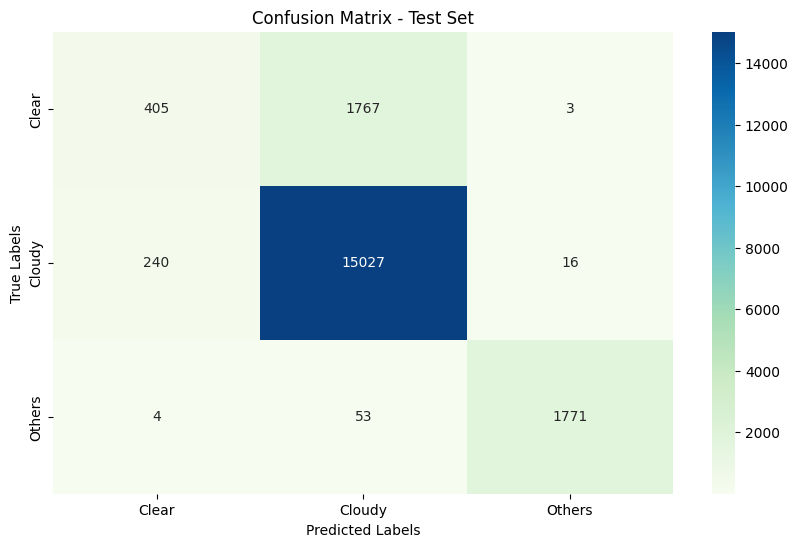

In [193]:
# create a confusion matrix for test set predictions
cm_test_tree3 = confusion_matrix(F_ytest, pred_test_tree3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_tree3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [194]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_tree3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,16867,1770,405,244
Cloudy,2183,256,15027,1820
Others,17439,57,1771,19


In [195]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_tree3]

print(classification_report(y_valid_labels, pred_valid_labels3))

              precision    recall  f1-score   support

       Clear       0.64      0.18      0.28      2610
      Cloudy       0.89      0.98      0.94     18340
      Others       0.99      0.98      0.99      2193

    accuracy                           0.89     23143
   macro avg       0.84      0.71      0.73     23143
weighted avg       0.87      0.89      0.87     23143



In [196]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_tree3]

print(classification_report(y_test_labels, pred_test_labels3))

              precision    recall  f1-score   support

       Clear       0.62      0.19      0.29      2175
      Cloudy       0.89      0.98      0.94     15283
      Others       0.99      0.97      0.98      1828

    accuracy                           0.89     19286
   macro avg       0.84      0.71      0.73     19286
weighted avg       0.87      0.89      0.87     19286



## Multi-Layer Perceptron (MLP)

### Model 1: Default Hyperparameters

#### Training the model:

In [197]:
mlp1 = MLPClassifier(random_state=42)
history = mlp1.fit(F_Xtrain, F_ytrain)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Plot the loss curve:

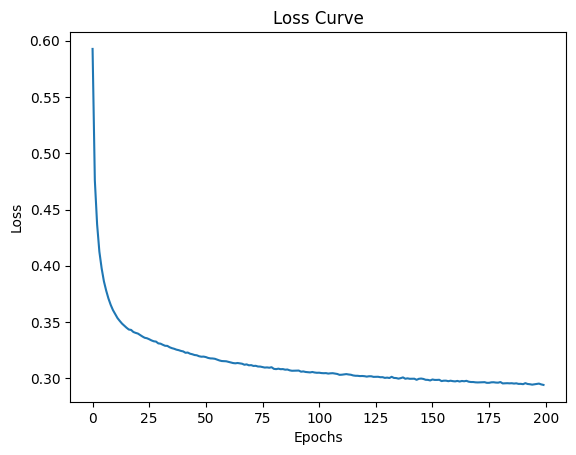

In [198]:
# get the loss values from the history object
loss_values = history.loss_curve_

# plot the loss curve
plt.plot(loss_values)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

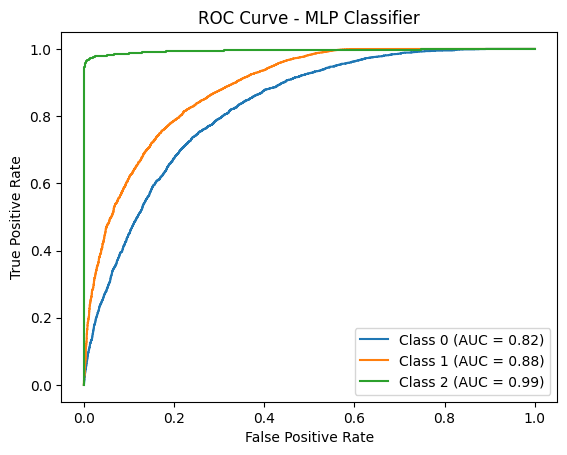

In [199]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the probabilities for each class
mlp_probabilities = mlp1.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
mlp_fpr = dict()
mlp_tpr = dict()
mlp_roc_auc = dict()
for i in range(n_classes):
    mlp_fpr[i], mlp_tpr[i], _ = roc_curve(y_test_bin[:, i], mlp_probabilities[:, i])
    mlp_roc_auc[i] = auc(mlp_fpr[i], mlp_tpr[i])

# plot the ROC curves for MLP Classifier
plt.figure()
for i in range(n_classes):
    plt.plot(mlp_fpr[i], mlp_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, mlp_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Classifier')
plt.legend()
plt.show()

#### Evaluating the model on the sets:

In [200]:
# evaluate the model on the training set
train_score_mlp1 = mlp1.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_mlp1 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_mlp1 = mlp1.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_mlp1 * 100, 2)}%")

# evaluate the model on the test set
test_score_mlp1 = mlp1.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_mlp1 * 100, 2)}%")

Training set accuracy: 88.41%
Validation set accuracy: 88.39%
Test set accuracy: 88.22%


#### Predicting using the model:

In [201]:
# make predictions on the validation set
pred_valid_mlp1 = mlp1.predict(F_Xvalid)

# make predictions on the test set
pred_test_mlp1 = mlp1.predict(F_Xtest)

#### Evaluating the predictions:

In [202]:
# for the validation set predictions:
accuracy_val_mlp1 = accuracy_score(F_yvalid, pred_valid_mlp1)      
precision_val_mlp1 = precision_score(F_yvalid, pred_valid_mlp1, average = 'weighted')
recall_val_mlp1 = recall_score(F_yvalid, pred_valid_mlp1, average = 'weighted')
f1_val_mlp1 = f1_score(F_yvalid, pred_valid_mlp1, average = 'weighted')                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_mlp1 * 100, 2)}%")
print(f"Precision score: {round(precision_val_mlp1 * 100, 2)}%")
print(f"Recall score: {round(recall_val_mlp1 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_mlp1 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 88.39%
Precision score: 85.36%
Recall score: 88.39%
F1-score score: 84.98%


In [203]:
# for the test set predictions:
accuracy_test_mlp1 = accuracy_score(F_ytest, pred_test_mlp1)      
precision_test_mlp1 = precision_score(F_ytest, pred_test_mlp1, average = 'weighted')
recall_test_mlp1 = recall_score(F_ytest, pred_test_mlp1, average = 'weighted')
f1_test_mlp1 = f1_score(F_ytest, pred_test_mlp1, average = 'weighted')                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_mlp1 * 100, 2)}%")
print(f"Precision score: {round(precision_test_mlp1 * 100, 2)}%")
print(f"Recall score: {round(recall_test_mlp1 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_mlp1 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 88.22%
Precision score: 85.17%
Recall score: 88.22%
F1-score score: 84.71%


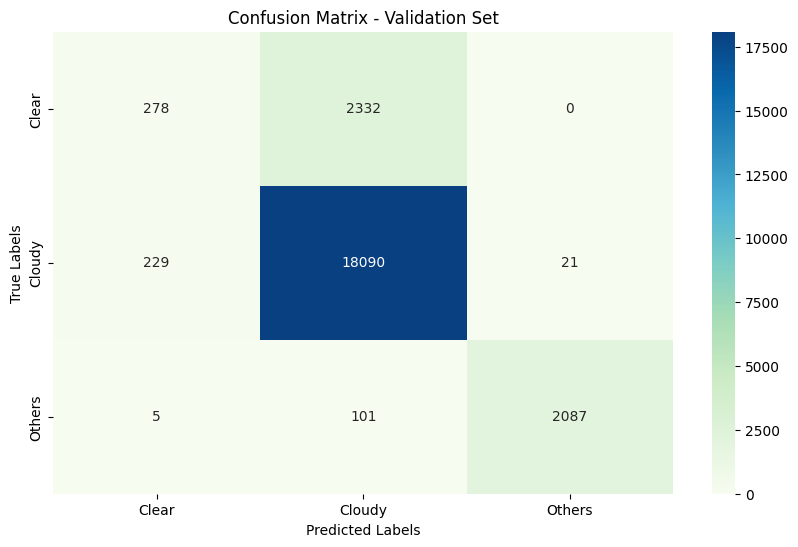

In [204]:
# create a confusion matrix for validation set predictions
cm_valid_mlp1 = confusion_matrix(F_yvalid, pred_valid_mlp1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_mlp1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [205]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_mlp1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20299,2332,278,234
Cloudy,2370,250,18090,2433
Others,20929,106,2087,21


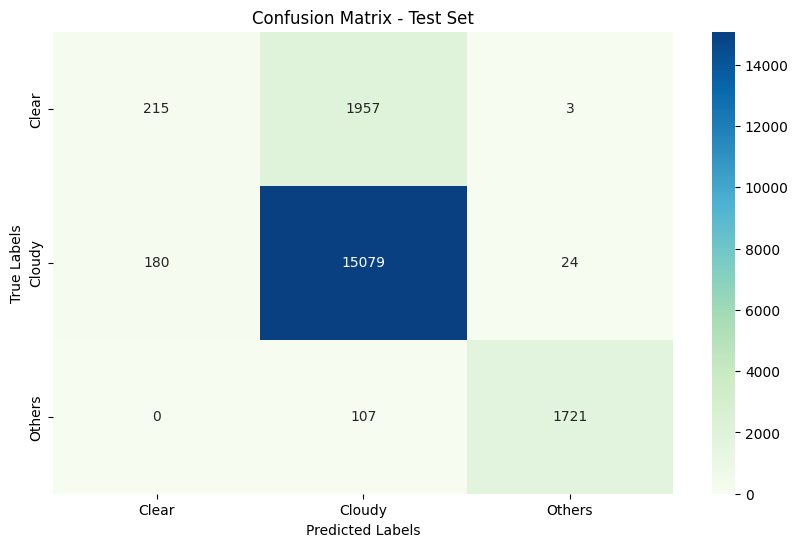

In [206]:
# create a confusion matrix for test set predictions
cm_test_mlp1 = confusion_matrix(F_ytest, pred_test_mlp1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_mlp1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [207]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_mlp1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,16931,1960,215,180
Cloudy,1939,204,15079,2064
Others,17431,107,1721,27


In [208]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_mlp1]

print(classification_report(y_valid_labels, pred_valid_labels3))

              precision    recall  f1-score   support

       Clear       0.54      0.11      0.18      2610
      Cloudy       0.88      0.99      0.93     18340
      Others       0.99      0.95      0.97      2193

    accuracy                           0.88     23143
   macro avg       0.80      0.68      0.69     23143
weighted avg       0.85      0.88      0.85     23143



In [209]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_mlp1]

print(classification_report(y_test_labels, pred_test_labels3))

              precision    recall  f1-score   support

       Clear       0.54      0.10      0.17      2175
      Cloudy       0.88      0.99      0.93     15283
      Others       0.98      0.94      0.96      1828

    accuracy                           0.88     19286
   macro avg       0.80      0.68      0.69     19286
weighted avg       0.85      0.88      0.85     19286



### Model 2: Custom Hyperparameter Values

#### Training the model:

In [210]:
mlp2 = MLPClassifier(hidden_layer_sizes=(250,), activation='relu', solver='adam', random_state=42, 
                     alpha=0.001, learning_rate='constant', max_iter=500)
history = mlp2.fit(F_Xtrain, F_ytrain)

#### Plot a loss curve:

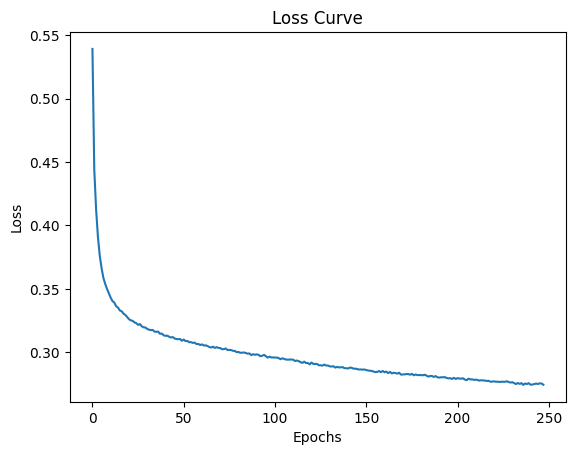

In [211]:
# get the loss values from the history object
loss_values = history.loss_curve_

# plot the loss curve
plt.plot(loss_values)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

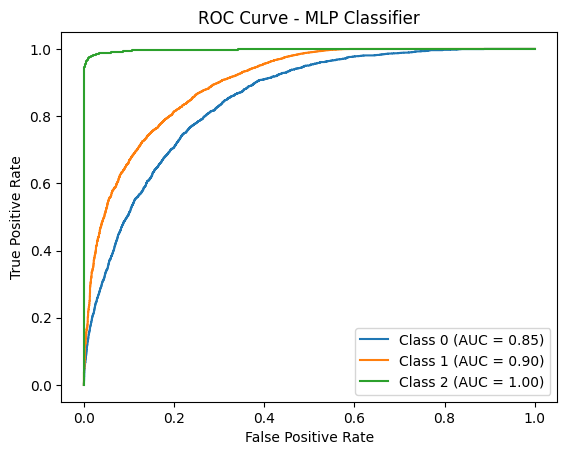

In [212]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the probabilities for each class
mlp_probabilities = mlp2.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
mlp_fpr = dict()
mlp_tpr = dict()
mlp_roc_auc = dict()
for i in range(n_classes):
    mlp_fpr[i], mlp_tpr[i], _ = roc_curve(y_test_bin[:, i], mlp_probabilities[:, i])
    mlp_roc_auc[i] = auc(mlp_fpr[i], mlp_tpr[i])

# plot the ROC curves for MLP Classifier
plt.figure()
for i in range(n_classes):
    plt.plot(mlp_fpr[i], mlp_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, mlp_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Classifier')
plt.legend()
plt.show()

#### Evaluating the model on the sets:

In [213]:
# evaluate the model on the training set
train_score_mlp2 = mlp2.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_mlp2 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_mlp2 = mlp2.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_mlp2 * 100, 2)}%")

# evaluate the model on the test set
test_score_mlp2 = mlp2.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_mlp2 * 100, 2)}%")

Training set accuracy: 89.1%
Validation set accuracy: 88.64%
Test set accuracy: 88.55%


#### Predicting using the model:

In [214]:
# make predictions on the validation set
pred_valid_mlp2 = mlp2.predict(F_Xvalid)

# make predictions on the test set
pred_test_mlp2 = mlp2.predict(F_Xtest)

#### Evaluating the predictions:

In [215]:
# for the validation set predictions:
accuracy_val_mlp2 = accuracy_score(F_yvalid, pred_valid_mlp2)      
precision_val_mlp2 = precision_score(F_yvalid, pred_valid_mlp2, average = 'weighted',zero_division=1)
recall_val_mlp2 = recall_score(F_yvalid, pred_valid_mlp2, average = 'weighted',zero_division=1)
f1_val_mlp2 = f1_score(F_yvalid, pred_valid_mlp2, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_mlp2 * 100, 2)}%")
print(f"Precision score: {round(precision_val_mlp2 * 100, 2)}%")
print(f"Recall score: {round(recall_val_mlp2 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_mlp2 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 88.64%
Precision score: 86.24%
Recall score: 88.64%
F1-score score: 86.41%


In [216]:
# for the test set predictions:
accuracy_test_mlp2 = accuracy_score(F_ytest, pred_test_mlp2)      
precision_test_mlp2 = precision_score(F_ytest, pred_test_mlp2, average = 'weighted',zero_division=1)
recall_test_mlp2 = recall_score(F_ytest, pred_test_mlp2, average = 'weighted',zero_division=1)
f1_test_mlp2 = f1_score(F_ytest, pred_test_mlp2, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_mlp2 * 100, 2)}%")
print(f"Precision score: {round(precision_test_mlp2 * 100, 2)}%")
print(f"Recall score: {round(recall_test_mlp2 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_mlp2 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 88.55%
Precision score: 86.23%
Recall score: 88.55%
F1-score score: 86.43%


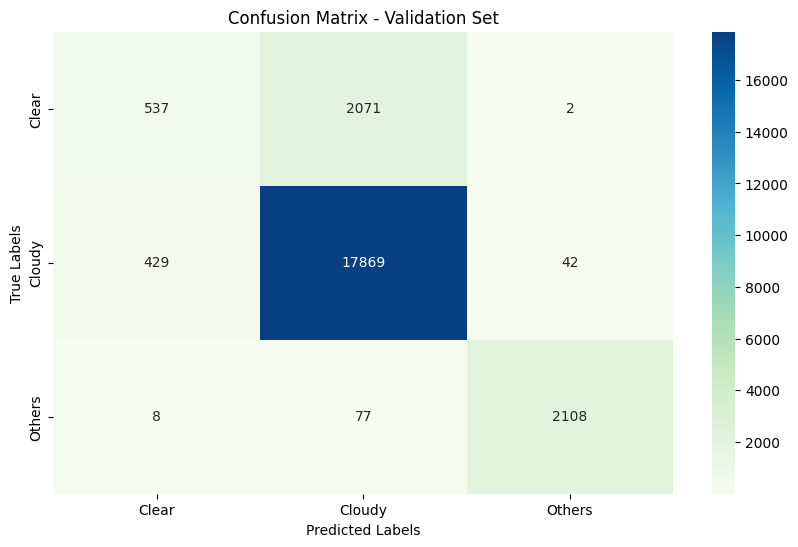

In [217]:
# create a confusion matrix for validation set predictions
cm_valid_mlp2 = confusion_matrix(F_yvalid, pred_valid_mlp2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_mlp2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [218]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_mlp2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20096,2073,537,437
Cloudy,2655,471,17869,2148
Others,20906,85,2108,44


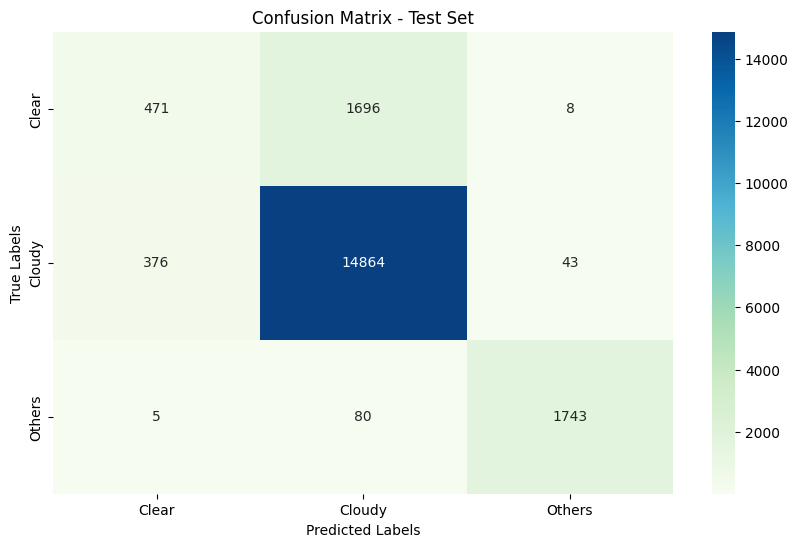

In [219]:
# create a confusion matrix for test set predictions
cm_test_mlp2 = confusion_matrix(F_ytest, pred_test_mlp2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_mlp2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [220]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_mlp2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,16730,1704,471,381
Cloudy,2227,419,14864,1776
Others,17407,85,1743,51


In [221]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_mlp2]

print(classification_report(y_valid_labels, pred_valid_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       0.55      0.21      0.30      2610
      Cloudy       0.89      0.97      0.93     18340
      Others       0.98      0.96      0.97      2193

    accuracy                           0.89     23143
   macro avg       0.81      0.71      0.73     23143
weighted avg       0.86      0.89      0.86     23143



In [222]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_mlp2]

print(classification_report(y_test_labels, pred_test_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       0.55      0.22      0.31      2175
      Cloudy       0.89      0.97      0.93     15283
      Others       0.97      0.95      0.96      1828

    accuracy                           0.89     19286
   macro avg       0.81      0.71      0.73     19286
weighted avg       0.86      0.89      0.86     19286



### Model 3: Hyperparameter Tuning

#### Training the model:

In [223]:
# define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# create the MLP classifier
mlp_gs = MLPClassifier(random_state=42,max_iter=500,solver='adam')

# perform grid search with cross-validation
grid_search_mlp = GridSearchCV(mlp_gs, param_grid, scoring='f1_macro', cv=5)
history = grid_search_mlp.fit(F_Xtrain, F_ytrain)

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer

In [224]:
# get the best model, its hyperparameters, and cross-validation scores
mlp3 = grid_search_mlp.best_estimator_
best_params_mlp = grid_search_mlp.best_params_
cv_results_mlp = grid_search_mlp.cv_results_
print(f"Best model with best hyperparameters:\n{mlp3}")

Best model with best hyperparameters:
MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=500,
              random_state=42)


#### Plot the loss curve:

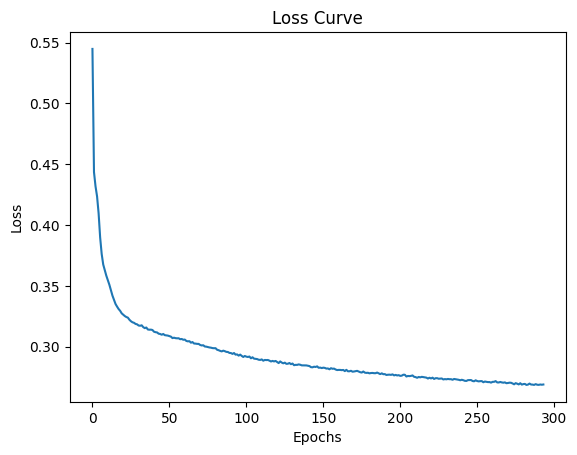

In [225]:
# get the loss values from the history object
loss_values = mlp3.loss_curve_

# plot the loss curve
plt.plot(loss_values)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

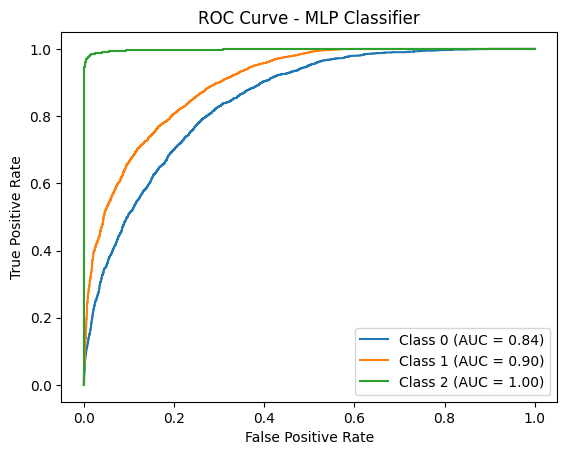

In [226]:
# binarize the target labels for the multi-class ROC AUC curve
n_classes = len(set(y3))
y_test_bin = label_binarize(F_ytest, classes=range(n_classes))

# compute the probabilities for each class
mlp_probabilities = mlp3.predict_proba(F_Xtest)

# compute the ROC curve and ROC AUC for each class
mlp_fpr = dict()
mlp_tpr = dict()
mlp_roc_auc = dict()
for i in range(n_classes):
    mlp_fpr[i], mlp_tpr[i], _ = roc_curve(y_test_bin[:, i], mlp_probabilities[:, i])
    mlp_roc_auc[i] = auc(mlp_fpr[i], mlp_tpr[i])

# plot the ROC curves for MLP Classifier
plt.figure()
for i in range(n_classes):
    plt.plot(mlp_fpr[i], mlp_tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, mlp_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Classifier')
plt.legend()
plt.show()

#### Evaluating the model on the sets:

In [227]:
# evaluate the model on the training set
train_score_mlp3 = mlp3.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_mlp3 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_mlp3 = mlp3.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_mlp3 * 100, 2)}%")

# evaluate the model on the test set
test_score_mlp3 = mlp3.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_mlp3 * 100, 2)}%")

Training set accuracy: 89.25%
Validation set accuracy: 88.76%
Test set accuracy: 88.76%


#### Predicting using the model:

In [228]:
# make predictions on the validation set
pred_valid_mlp3 = mlp3.predict(F_Xvalid)

# make predictions on the test set
pred_test_mlp3 = mlp3.predict(F_Xtest)

#### Evaluating the predictions:

In [229]:
# for the validation set predictions:
accuracy_val_mlp3 = accuracy_score(F_yvalid, pred_valid_mlp3)      
precision_val_mlp3 = precision_score(F_yvalid, pred_valid_mlp3, average = 'weighted',zero_division=1)
recall_val_mlp3 = recall_score(F_yvalid, pred_valid_mlp3, average = 'weighted',zero_division=1)
f1_val_mlp3 = f1_score(F_yvalid, pred_valid_mlp3, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_mlp3 * 100, 2)}%")
print(f"Precision score: {round(precision_val_mlp3 * 100, 2)}%")
print(f"Recall score: {round(recall_val_mlp3 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_mlp3 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 88.76%
Precision score: 86.3%
Recall score: 88.76%
F1-score score: 85.75%


In [230]:
# for the test set predictions:
accuracy_test_mlp3 = accuracy_score(F_ytest, pred_test_mlp3)      
precision_test_mlp3 = precision_score(F_ytest, pred_test_mlp3, average = 'weighted',zero_division=1)
recall_test_mlp3 = recall_score(F_ytest, pred_test_mlp3, average = 'weighted',zero_division=1)
f1_test_mlp3 = f1_score(F_ytest, pred_test_mlp3, average = 'weighted',zero_division=1)                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_mlp3 * 100, 2)}%")
print(f"Precision score: {round(precision_test_mlp3 * 100, 2)}%")
print(f"Recall score: {round(recall_test_mlp3 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_mlp3 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 88.76%
Precision score: 86.45%
Recall score: 88.76%
F1-score score: 85.86%


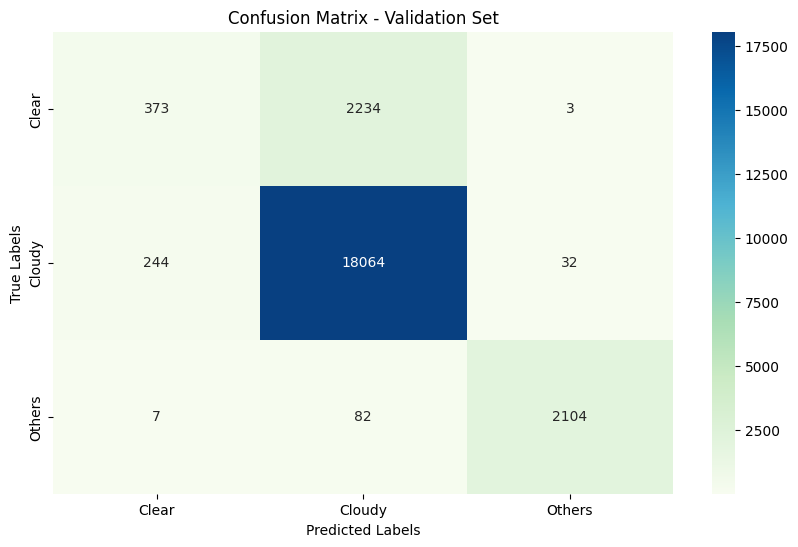

In [231]:
# create confusion matrix for validation set predictions
cm_valid_mlp3 = confusion_matrix(F_yvalid, pred_valid_mlp3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_mlp3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [232]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_mlp3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20282,2237,373,251
Cloudy,2487,276,18064,2316
Others,20915,89,2104,35


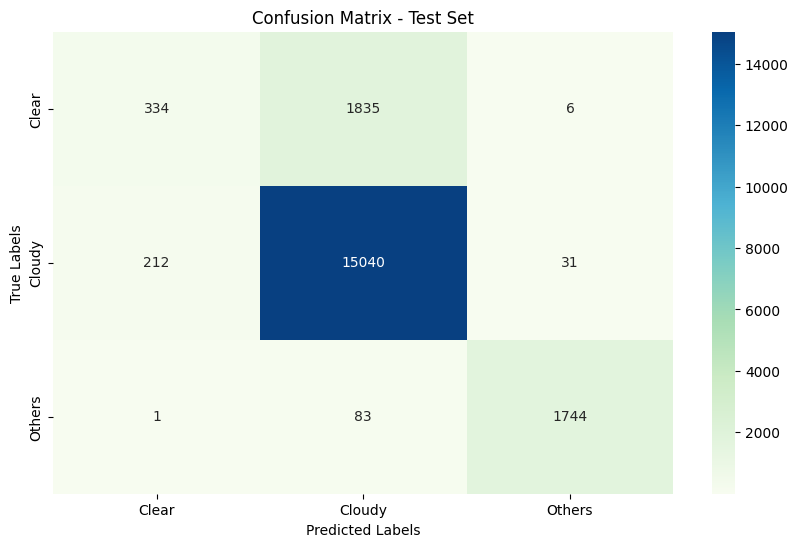

In [233]:
# create a confusion matrix for test set predictions
cm_test_mlp3 = confusion_matrix(F_ytest, pred_test_mlp3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_mlp3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [234]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_mlp3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,16898,1841,334,213
Cloudy,2085,243,15040,1918
Others,17421,84,1744,37


In [235]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_mlp3]

print(classification_report(y_valid_labels, pred_valid_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       0.60      0.14      0.23      2610
      Cloudy       0.89      0.98      0.93     18340
      Others       0.98      0.96      0.97      2193

    accuracy                           0.89     23143
   macro avg       0.82      0.70      0.71     23143
weighted avg       0.86      0.89      0.86     23143



In [236]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_mlp3]

print(classification_report(y_test_labels, pred_test_labels3,zero_division=1))

              precision    recall  f1-score   support

       Clear       0.61      0.15      0.25      2175
      Cloudy       0.89      0.98      0.93     15283
      Others       0.98      0.95      0.97      1828

    accuracy                           0.89     19286
   macro avg       0.83      0.70      0.71     19286
weighted avg       0.86      0.89      0.86     19286



## XGBoost (BONUS! :D)

### Model 1: Default Parameters

#### Training the model:

In [239]:
# create XGBoost classifier with default parameters
xgb1 = xgb.XGBClassifier(eval_metric='mlogloss')

# fit the model on the training data and evaluate on the validation set
eval_set = [(F_Xtrain, F_ytrain), (F_Xvalid, F_yvalid)]  # Include both training and validation sets
xgb1.fit(F_Xtrain, F_ytrain, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### Plotting the loss curve:

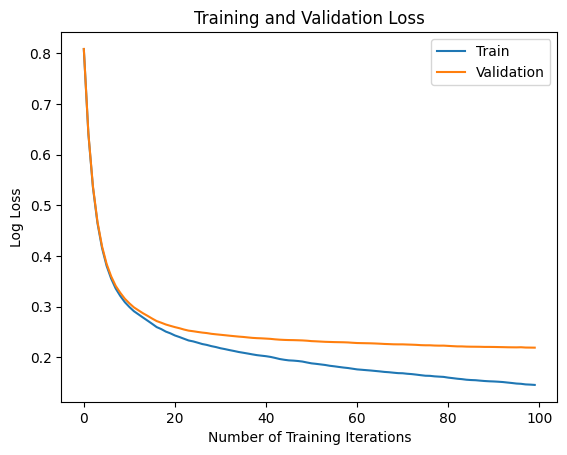

In [240]:
# retrieve the evaluation results
results = xgb1.evals_result()

# extract the training and validation log loss
train_loss = results['validation_0']['mlogloss']
val_loss = results['validation_1']['mlogloss']  # Retrieve validation loss separately

# plot the loss over the training iterations
epochs = len(train_loss)
x_axis = range(0, epochs)
plt.plot(x_axis, train_loss, label='Train')
plt.plot(x_axis, val_loss, label='Validation')
plt.xlabel('Number of Training Iterations')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Evaluating the model on sets:

In [241]:
# evaluate the model on the training set
train_score_xgb1 = xgb1.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_xgb1 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_xgb1 = xgb1.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_xgb1 * 100, 2)}%")

# evaluate the model on the test set
test_score_xgb1 = xgb1.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_xgb1 * 100, 2)}%")

Training set accuracy: 94.54%
Validation set accuracy: 91.06%
Test set accuracy: 90.92%


#### Predicting using the model:

In [242]:
# make predictions on the validation set
pred_valid_xgb1 = xgb1.predict(F_Xvalid)

# make predictions on the test set
pred_test_xgb1 = xgb1.predict(F_Xtest)

#### Evaluating the predictions:

In [243]:
# for the validation set predictions:
accuracy_val_xgb1 = accuracy_score(F_yvalid, pred_valid_xgb1)      
precision_val_xgb1 = precision_score(F_yvalid, pred_valid_xgb1, average = 'weighted')
recall_val_xgb1 = recall_score(F_yvalid, pred_valid_xgb1, average = 'weighted')
f1_val_xgb1 = f1_score(F_yvalid, pred_valid_xgb1, average = 'weighted')                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_xgb1 * 100, 2)}%")
print(f"Precision score: {round(precision_val_xgb1 * 100, 2)}%")
print(f"Recall score: {round(recall_val_xgb1 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_xgb1 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 91.06%
Precision score: 90.06%
Recall score: 91.06%
F1-score score: 89.67%


In [244]:
# for the test set predictions:
accuracy_test_xgb1 = accuracy_score(F_ytest, pred_test_xgb1)      
precision_test_xgb1 = precision_score(F_ytest, pred_test_xgb1, average = 'weighted')
recall_test_xgb1 = recall_score(F_ytest, pred_test_xgb1, average = 'weighted')
f1_test_xgb1 = f1_score(F_ytest, pred_test_xgb1, average = 'weighted')                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_xgb1 * 100, 2)}%")
print(f"Precision score: {round(precision_test_xgb1 * 100, 2)}%")
print(f"Recall score: {round(recall_test_xgb1 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_xgb1 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 90.92%
Precision score: 89.9%
Recall score: 90.92%
F1-score score: 89.4%


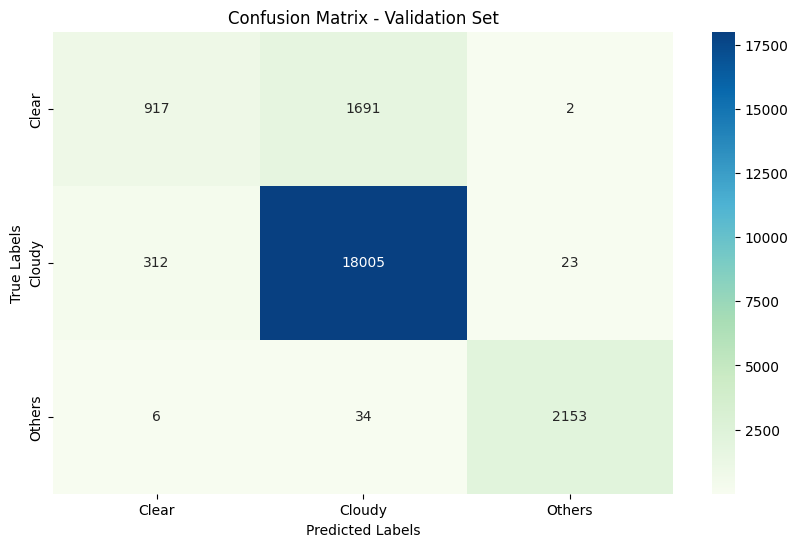

In [245]:
# create a confusion matrix for validation set predictions
cm_valid_xgb1 = confusion_matrix(F_yvalid, pred_valid_xgb1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_xgb1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [246]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_xgb1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20215,1693,917,318
Cloudy,3078,335,18005,1725
Others,20925,40,2153,25


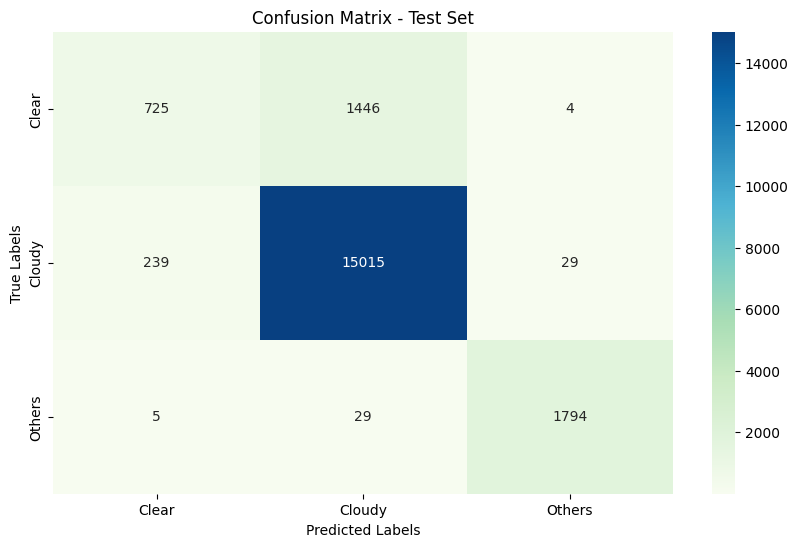

In [247]:
# create a confusion matrix for test set predictions
cm_test_xgb1 = confusion_matrix(F_ytest, pred_test_xgb1)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_xgb1, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [248]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_xgb1  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,16867,1450,725,244
Cloudy,2528,268,15015,1475
Others,17425,34,1794,33


In [249]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_xgb1]

print(classification_report(y_valid_labels, pred_valid_labels3))

              precision    recall  f1-score   support

       Clear       0.74      0.35      0.48      2610
      Cloudy       0.91      0.98      0.95     18340
      Others       0.99      0.98      0.99      2193

    accuracy                           0.91     23143
   macro avg       0.88      0.77      0.80     23143
weighted avg       0.90      0.91      0.90     23143



In [250]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_xgb1]

print(classification_report(y_test_labels, pred_test_labels3))

              precision    recall  f1-score   support

       Clear       0.75      0.33      0.46      2175
      Cloudy       0.91      0.98      0.95     15283
      Others       0.98      0.98      0.98      1828

    accuracy                           0.91     19286
   macro avg       0.88      0.77      0.80     19286
weighted avg       0.90      0.91      0.89     19286



### Model 2: Custom Parameters Values

#### Training the model:

In [251]:
# create XGBoost classifier with default parameters
xgb2 = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

# fit the model on the training data and evaluate on the validation set
eval_set = [(F_Xtrain, F_ytrain), (F_Xvalid, F_yvalid)]  # Include both training and validation sets
xgb2.fit(F_Xtrain, F_ytrain, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

#### Plotting the loss curve:

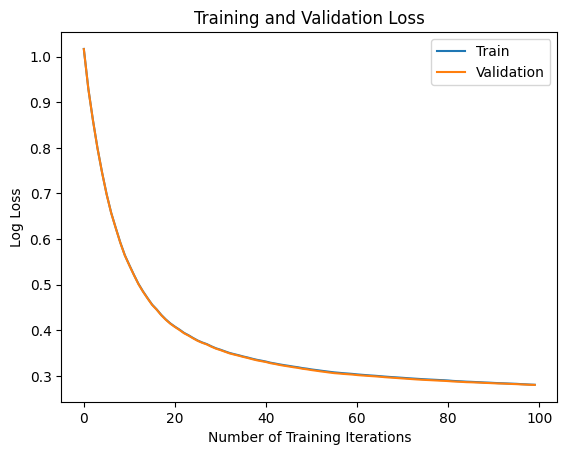

In [252]:
# retrieve the evaluation results
results = xgb2.evals_result()

# extract the training and validation log loss
train_loss = results['validation_0']['mlogloss']
val_loss = results['validation_1']['mlogloss']  # Retrieve validation loss separately

# plot the loss over the training iterations
epochs = len(train_loss)
x_axis = range(0, epochs)
plt.plot(x_axis, train_loss, label='Train')
plt.plot(x_axis, val_loss, label='Validation')
plt.xlabel('Number of Training Iterations')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Evaluating the model on sets:

In [253]:
# evaluate the model on the training set
train_score_xgb2 = xgb2.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_xgb2 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_xgb2 = xgb2.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_xgb2 * 100, 2)}%")

# evaluate the model on the test set
test_score_xgb2 = xgb2.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_xgb2 * 100, 2)}%")

Training set accuracy: 89.0%
Validation set accuracy: 89.02%
Test set accuracy: 88.93%


#### Predicting using the model:

In [254]:
# make predictions on the validation set
pred_valid_xgb2 = xgb2.predict(F_Xvalid)

# make predictions on the test set
pred_test_xgb2 = xgb2.predict(F_Xtest)

#### Evaluating the predictions:

In [255]:
# for the validation set predictions:
accuracy_val_xgb2 = accuracy_score(F_yvalid, pred_valid_xgb2)      
precision_val_xgb2 = precision_score(F_yvalid, pred_valid_xgb2, average = 'weighted')
recall_val_xgb2 = recall_score(F_yvalid, pred_valid_xgb2, average = 'weighted')
f1_val_xgb2 = f1_score(F_yvalid, pred_valid_xgb2, average = 'weighted')                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_xgb2 * 100, 2)}%")
print(f"Precision score: {round(precision_val_xgb2 * 100, 2)}%")
print(f"Recall score: {round(recall_val_xgb2 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_xgb2 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 89.02%
Precision score: 87.79%
Recall score: 89.02%
F1-score score: 85.2%


In [256]:
# for the test set predictions:
accuracy_test_xgb2 = accuracy_score(F_ytest, pred_test_xgb2)      
precision_test_xgb2 = precision_score(F_ytest, pred_test_xgb2, average = 'weighted')
recall_test_xgb2 = recall_score(F_ytest, pred_test_xgb2, average = 'weighted')
f1_test_xgb2 = f1_score(F_ytest, pred_test_xgb2, average = 'weighted')                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_xgb2 * 100, 2)}%")
print(f"Precision score: {round(precision_test_xgb2 * 100, 2)}%")
print(f"Recall score: {round(recall_test_xgb2 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_xgb2 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 88.93%
Precision score: 87.91%
Recall score: 88.93%
F1-score score: 85.19%


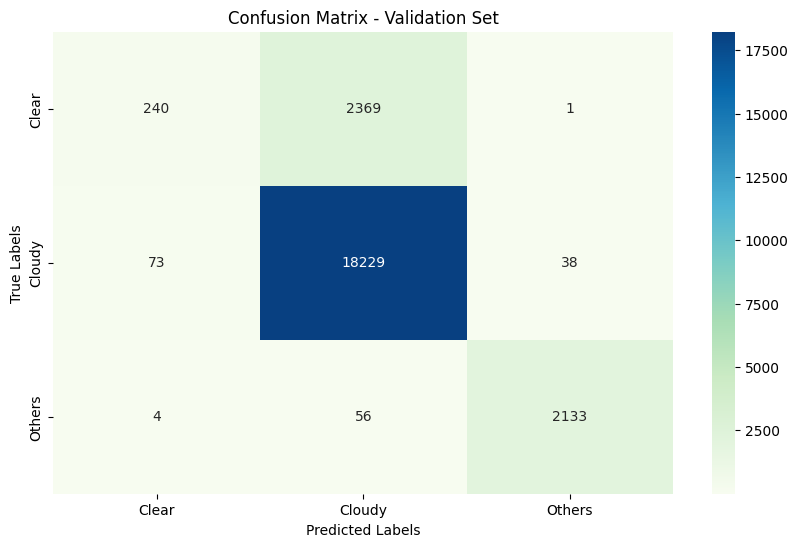

In [257]:
# create a confusion matrix for validation set predictions
cm_valid_xgb2 = confusion_matrix(F_yvalid, pred_valid_xgb2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_xgb2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [258]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_xgb2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20456,2370,240,77
Cloudy,2378,111,18229,2425
Others,20911,60,2133,39


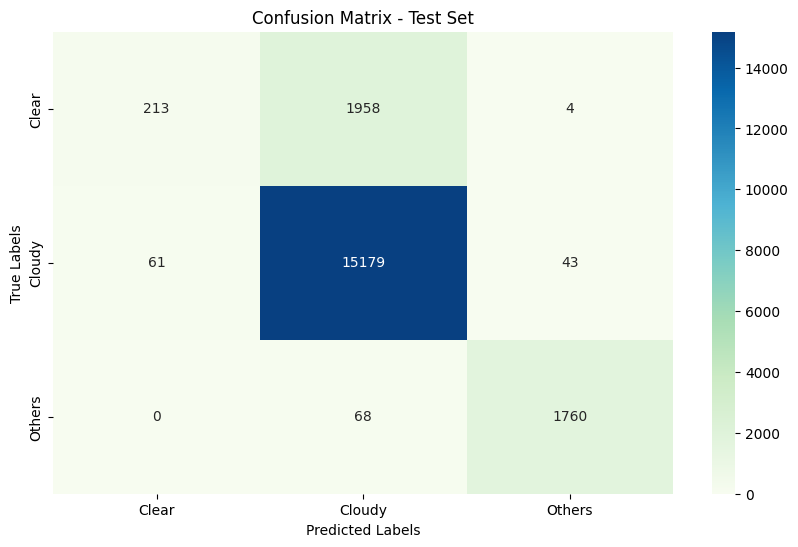

In [259]:
# create a confusion matrix for test set predictions
cm_test_xgb2 = confusion_matrix(F_ytest, pred_test_xgb2)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_xgb2, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [260]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_xgb2  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,17050,1962,213,61
Cloudy,1977,104,15179,2026
Others,17411,68,1760,47


In [261]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_xgb2]

print(classification_report(y_valid_labels, pred_valid_labels3))

              precision    recall  f1-score   support

       Clear       0.76      0.09      0.16      2610
      Cloudy       0.88      0.99      0.93     18340
      Others       0.98      0.97      0.98      2193

    accuracy                           0.89     23143
   macro avg       0.87      0.69      0.69     23143
weighted avg       0.88      0.89      0.85     23143



In [262]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_xgb2]

print(classification_report(y_test_labels, pred_test_labels3))

              precision    recall  f1-score   support

       Clear       0.78      0.10      0.17      2175
      Cloudy       0.88      0.99      0.93     15283
      Others       0.97      0.96      0.97      1828

    accuracy                           0.89     19286
   macro avg       0.88      0.68      0.69     19286
weighted avg       0.88      0.89      0.85     19286



### Model 3: Hyperparameter Tuning

#### Training the model:

In [263]:
# create XGBoost classifier
model_tuned = xgb.XGBClassifier()

# define the parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [3, 5, 7],                 # Maximum depth of a tree
    'learning_rate': [0.1, 0.01, 0.001],    # Learning rate
    'n_estimators': [100, 200, 300],        # Number of trees (boosting rounds)
    'subsample': [0.8, 0.9, 1.0],           # Subsample ratio of training instances
    'colsample_bytree': [0.8, 0.9, 1.0]     # Subsample ratio of columns
}

# perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_tuned,
    param_distributions=param_grid,
    n_iter=10,      # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,           # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1       # Number of jobs to run in parallel (-1 uses all available processors)
)

# fit the model on the training data using RandomizedSearchCV
random_search.fit(F_Xtrain, F_ytrain)

# best hyperparameters found
best_params = random_search.best_params_

# create a new model with the best hyperparameters
xgb3 = xgb.XGBClassifier(**best_params, eval_metric='mlogloss')

# fit the model on the training data using the best hyperparameters
eval_set = [(F_Xtrain, F_ytrain), (F_Xvalid, F_yvalid)]  # Include both training and validation sets
xgb3.fit(F_Xtrain, F_ytrain, eval_set=eval_set, verbose=False)

# make predictions on test data
y_pred_tuned = xgb3.predict(F_Xtest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [264]:
# get the best model
xgbb = random_search.best_estimator_
print(f"Best model with best hyperparameters:\n{xgbb}")

Best model with best hyperparameters:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)


#### Plotting the loss curve:

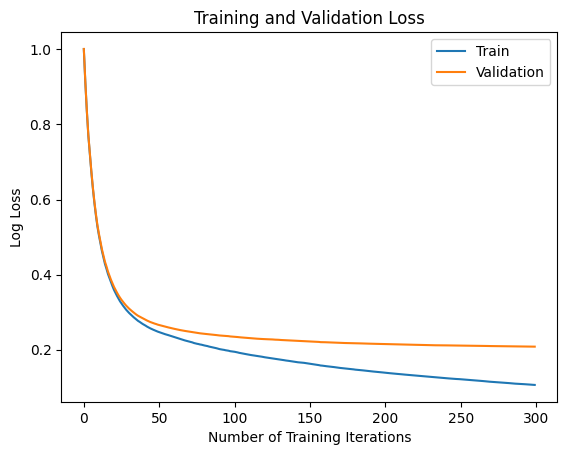

In [265]:
# retrieve the evaluation results
results = xgb3.evals_result()

# extract the training and validation log loss
train_loss = results['validation_0']['mlogloss']
val_loss = results['validation_1']['mlogloss']  # Retrieve validation loss separately

# plot the loss over the training iterations
epochs = len(train_loss)
x_axis = range(0, epochs)
plt.plot(x_axis, train_loss, label='Train')
plt.plot(x_axis, val_loss, label='Validation')
plt.xlabel('Number of Training Iterations')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Evaluating the model on sets:

In [266]:
# evaluate the model on the training set
train_score_xgb3 = xgb3.score(F_Xtrain, F_ytrain)
print(f"Training set accuracy: {round(train_score_xgb3 * 100, 2)}%")

# evaluate the model on the validation set
valid_score_xgb3 = xgb3.score(F_Xvalid, F_yvalid)
print(f"Validation set accuracy: {round(valid_score_xgb3 * 100, 2)}%")

# evaluate the model on the test set
test_score_xgb3 = xgb3.score(F_Xtest, F_ytest)
print(f"Test set accuracy: {round(test_score_xgb3 * 100, 2)}%")

Training set accuracy: 96.91%
Validation set accuracy: 91.47%
Test set accuracy: 91.39%


#### Predicting using the model:

In [267]:
# make predictions on the validation set
pred_valid_xgb3 = xgb3.predict(F_Xvalid)

# make predictions on the test set
pred_test_xgb3 = xgb3.predict(F_Xtest)

#### Evaluating the predictions:

In [268]:
# for the validation set predictions:
accuracy_val_xgb3 = accuracy_score(F_yvalid, pred_valid_xgb3)      
precision_val_xgb3 = precision_score(F_yvalid, pred_valid_xgb3, average = 'weighted')
recall_val_xgb3 = recall_score(F_yvalid, pred_valid_xgb3, average = 'weighted')
f1_val_xgb3 = f1_score(F_yvalid, pred_valid_xgb3, average = 'weighted')                  

print("Metric Evaluations for Validation Set:")
print(f"Accuracy score: {round(accuracy_val_xgb3 * 100, 2)}%")
print(f"Precision score: {round(precision_val_xgb3 * 100, 2)}%")
print(f"Recall score: {round(recall_val_xgb3 * 100, 2)}%")
print(f"F1-score score: {round(f1_val_xgb3 * 100, 2)}%")

Metric Evaluations for Validation Set:
Accuracy score: 91.47%
Precision score: 90.64%
Recall score: 91.47%
F1-score score: 90.22%


In [269]:
# for the test set predictions:
accuracy_test_xgb3 = accuracy_score(F_ytest, pred_test_xgb3)      
precision_test_xgb3 = precision_score(F_ytest, pred_test_xgb3, average = 'weighted')
recall_test_xgb3 = recall_score(F_ytest, pred_test_xgb3, average = 'weighted')
f1_test_xgb3 = f1_score(F_ytest, pred_test_xgb3, average = 'weighted')                  

print("Metric Evaluations for Test Set:")
print(f"Accuracy score: {round(accuracy_test_xgb3 * 100, 2)}%")
print(f"Precision score: {round(precision_test_xgb3 * 100, 2)}%")
print(f"Recall score: {round(recall_test_xgb3 * 100, 2)}%")
print(f"F1-score score: {round(f1_test_xgb3 * 100, 2)}%")

Metric Evaluations for Test Set:
Accuracy score: 91.39%
Precision score: 90.57%
Recall score: 91.39%
F1-score score: 90.06%


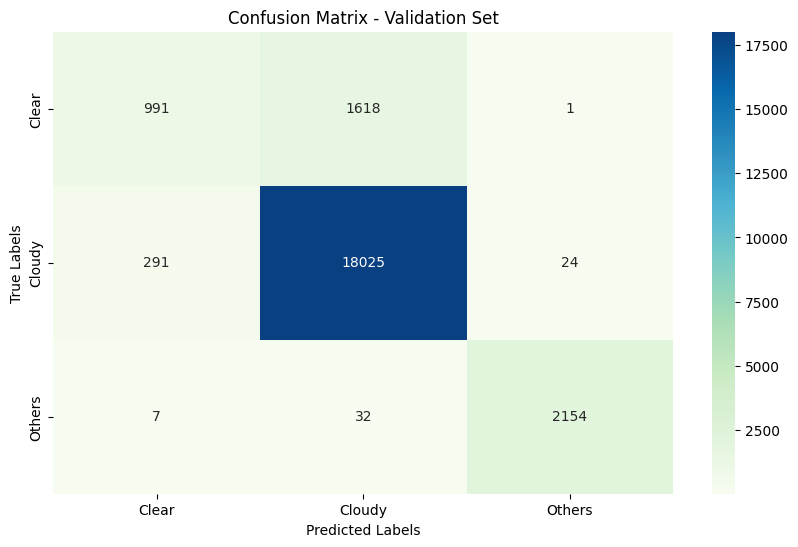

In [270]:
# create a confusion matrix for validation set predictions
cm_valid_xgb3 = confusion_matrix(F_yvalid, pred_valid_xgb3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_valid_xgb3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [271]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_valid_xgb3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,20235,1619,991,298
Cloudy,3153,315,18025,1650
Others,20925,39,2154,25


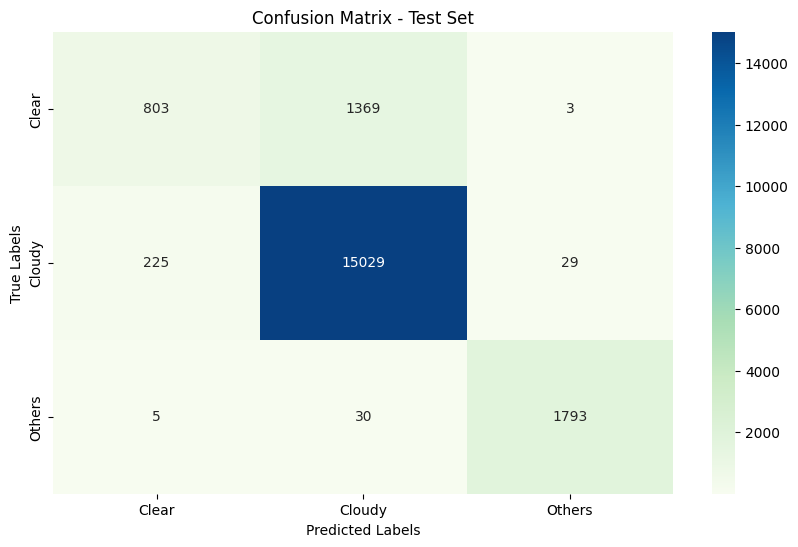

In [272]:
# create a confusion matrix for test set predictions
cm_test_xgb3 = confusion_matrix(F_ytest, pred_test_xgb3)
labels = sorted_dict.values()

# create heatmap of confusion matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm_test_xgb3, annot = True, fmt = "d", cmap = "GnBu", xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [273]:
# creating labels
class_labels = ['Clear', 'Cloudy', 'Others']
c_matrix = cm_test_xgb3  # Replace with your confusion matrix values

# create a pandas DataFrame for the confusion matrix
df = pd.DataFrame(c_matrix, index=class_labels, columns=class_labels)

# calculate the TN, FN, TP, and FP values
TP = df.values.diagonal(offset=0)
FN = df.sum(axis=1) - df.values.diagonal(offset=0)
FP = df.sum(axis=0) - df.values.diagonal(offset=0)
TN = df.values.sum() - TP - FN - FP

# create a new DataFrame for TN, FN, TP, FP
metrics_df = pd.DataFrame({'TN': TN, 'FN': FN, 'TP': TP, 'FP': FP}, index=class_labels)

# display the metrics DataFrame
metrics_df

,TN,FN,TP,FP
Clear,16881,1372,803,230
Cloudy,2604,254,15029,1399
Others,17426,35,1793,32


In [274]:
# classification report of validation set
y_valid_labels = [sorted_dict[label] for label in F_yvalid]
pred_valid_labels3 = [sorted_dict[label] for label in pred_valid_xgb3]

print(classification_report(y_valid_labels, pred_valid_labels3))

              precision    recall  f1-score   support

       Clear       0.77      0.38      0.51      2610
      Cloudy       0.92      0.98      0.95     18340
      Others       0.99      0.98      0.99      2193

    accuracy                           0.91     23143
   macro avg       0.89      0.78      0.81     23143
weighted avg       0.91      0.91      0.90     23143



In [275]:
# classification report of test set
y_test_labels = [sorted_dict[label] for label in F_ytest]
pred_test_labels3 = [sorted_dict[label] for label in pred_test_xgb3]

print(classification_report(y_test_labels, pred_test_labels3))

              precision    recall  f1-score   support

       Clear       0.78      0.37      0.50      2175
      Cloudy       0.91      0.98      0.95     15283
      Others       0.98      0.98      0.98      1828

    accuracy                           0.91     19286
   macro avg       0.89      0.78      0.81     19286
weighted avg       0.91      0.91      0.90     19286



## Combining Results of All Models

### Creating results dataframe:

In [292]:
train_accuracies = [train_score_m1, train_score_m2, train_score_m3, 
                    train_score_tree1, train_score_tree2, train_score_tree3,
                    train_score_mlp1, train_score_mlp2, train_score_mlp3,
                    train_score_xgb1, train_score_xgb2, train_score_xgb3]

valid_accuracies = [valid_score_m1, valid_score_m2, valid_score_m3, 
                    valid_score_tree1, valid_score_tree2, valid_score_tree3,
                    valid_score_mlp1, valid_score_mlp2, valid_score_mlp3,
                    valid_score_xgb1, valid_score_xgb2, valid_score_xgb3]

test_accuracies = [test_score_m1, test_score_m2, test_score_m3, 
                   test_score_tree1, test_score_tree2, test_score_tree3,
                   test_score_mlp1, test_score_mlp2, test_score_mlp3,
                   test_score_xgb1, test_score_xgb2, test_score_xgb3]

valid_precisions = [precision_val_m1, precision_val_m2, precision_val_m3, 
                    precision_val_tree1, precision_val_tree2, precision_val_tree3,
                    precision_val_mlp1, precision_val_mlp2, precision_val_mlp3,
                    precision_val_xgb1, precision_val_xgb2, precision_val_xgb3]

valid_recall = [recall_val_m1, recall_val_m2, recall_val_m3, 
                recall_val_tree1, recall_val_tree2, recall_val_tree3,
                recall_val_mlp1, recall_val_mlp2, recall_val_mlp3,
                recall_val_xgb1, recall_val_xgb2, recall_val_xgb3]

valid_f1 = [f1_val_m1, f1_val_m2, f1_val_m3, 
            f1_val_tree1, f1_val_tree2, f1_val_tree3,
            f1_val_mlp1, f1_val_mlp2, f1_val_mlp3,
            f1_val_xgb1, f1_val_xgb2, f1_val_xgb3]

test_precisions = [precision_test_m1, precision_test_m2, precision_test_m3, 
                   precision_test_tree1, precision_test_tree2, precision_test_tree3,
                   precision_test_mlp1, precision_test_mlp2, precision_test_mlp3,
                   precision_test_xgb1, precision_test_xgb2, precision_test_xgb3]

test_recall = [recall_test_m1, recall_test_m2, recall_test_m3, 
               recall_test_tree1, recall_val_tree2, recall_test_tree3,
               recall_test_mlp1, recall_test_mlp2, recall_test_mlp3,
               recall_test_xgb1, recall_test_xgb2, recall_test_xgb3]

test_f1 = [f1_test_m1, f1_test_m2, f1_test_m3, 
           f1_test_tree1, f1_test_tree2, f1_test_tree3,
           f1_test_mlp1, f1_test_mlp2, f1_test_mlp3,
           f1_test_xgb1, f1_test_xgb2, f1_test_xgb3]

scores_dict = {'Training Accuracy': train_accuracies, 'Validation Accuracy': valid_accuracies, 'Test Accuarcy': test_accuracies,
               'Validation Precision': valid_precisions, 'Validation Recall': valid_recall, 'Validation F1-Score': valid_f1,
               'Test Precision': test_precisions, 'Test Recall': test_recall, 'Test F1-Score': test_f1}

scores_df = pd.DataFrame(scores_dict, index = ['LR-1', 'LR-2', 'LR-3', 'Tree-1', 'Tree-2', 'Tree-3',
                                               'MLP-1', 'MLP-2', 'MLP-3', 'XGB-1', 'XGB-2', 'XGB-3'])

scores_df

,Training Accuracy,Validation Accuracy,Test Accuarcy,Validation Precision,Validation Recall,Validation F1-Score,Test Precision,Test Recall,Test F1-Score
LR-1,0.846722,0.845526,0.847195,0.795380,0.845526,0.795028,0.806363,0.847195,0.797524
LR-2,0.855037,0.854945,0.853884,0.876582,0.854945,0.801477,0.875688,0.853884,0.800290
LR-3,0.834667,0.834594,0.835165,0.863156,0.834594,0.775903,0.863549,0.835165,0.776687
Tree-1,1.000000,0.871754,0.868869,0.874773,0.871754,0.873210,0.872627,0.868869,0.870674
Tree-2,0.882019,0.882686,0.881365,0.897122,0.882686,0.830206,0.895919,0.882686,0.828930
Tree-3,0.900259,0.893488,0.891994,0.873066,0.893488,0.867223,0.870986,0.891994,0.866379
MLP-1,0.884111,0.883853,0.882246,0.853567,0.883853,0.849800,0.851735,0.882246,0.847115
MLP-2,0.891000,0.886402,0.885513,0.862425,0.886402,0.864096,0.862296,0.885513,0.864273
MLP-3,0.892481,0.887569,0.887587,0.863029,0.887569,0.857476,0.864489,0.887587,0.858608
XGB-1,0.945426,0.910643,0.909157,0.900588,0.910643,0.896726,0.899008,0.909157,0.894027


In [296]:
scores_df = (scores_df * 100).round(2)
scores_df

,Training Accuracy,Validation Accuracy,Test Accuarcy,Validation Precision,Validation Recall,Validation F1-Score,Test Precision,Test Recall,Test F1-Score
LR-1,84.67,84.55,84.72,79.54,84.55,79.50,80.64,84.72,79.75
LR-2,85.50,85.49,85.39,87.66,85.49,80.15,87.57,85.39,80.03
LR-3,83.47,83.46,83.52,86.32,83.46,77.59,86.35,83.52,77.67
Tree-1,100.00,87.18,86.89,87.48,87.18,87.32,87.26,86.89,87.07
Tree-2,88.20,88.27,88.14,89.71,88.27,83.02,89.59,88.27,82.89
Tree-3,90.03,89.35,89.20,87.31,89.35,86.72,87.10,89.20,86.64
MLP-1,88.41,88.39,88.22,85.36,88.39,84.98,85.17,88.22,84.71
MLP-2,89.10,88.64,88.55,86.24,88.64,86.41,86.23,88.55,86.43
MLP-3,89.25,88.76,88.76,86.30,88.76,85.75,86.45,88.76,85.86
XGB-1,94.54,91.06,90.92,90.06,91.06,89.67,89.90,90.92,89.40


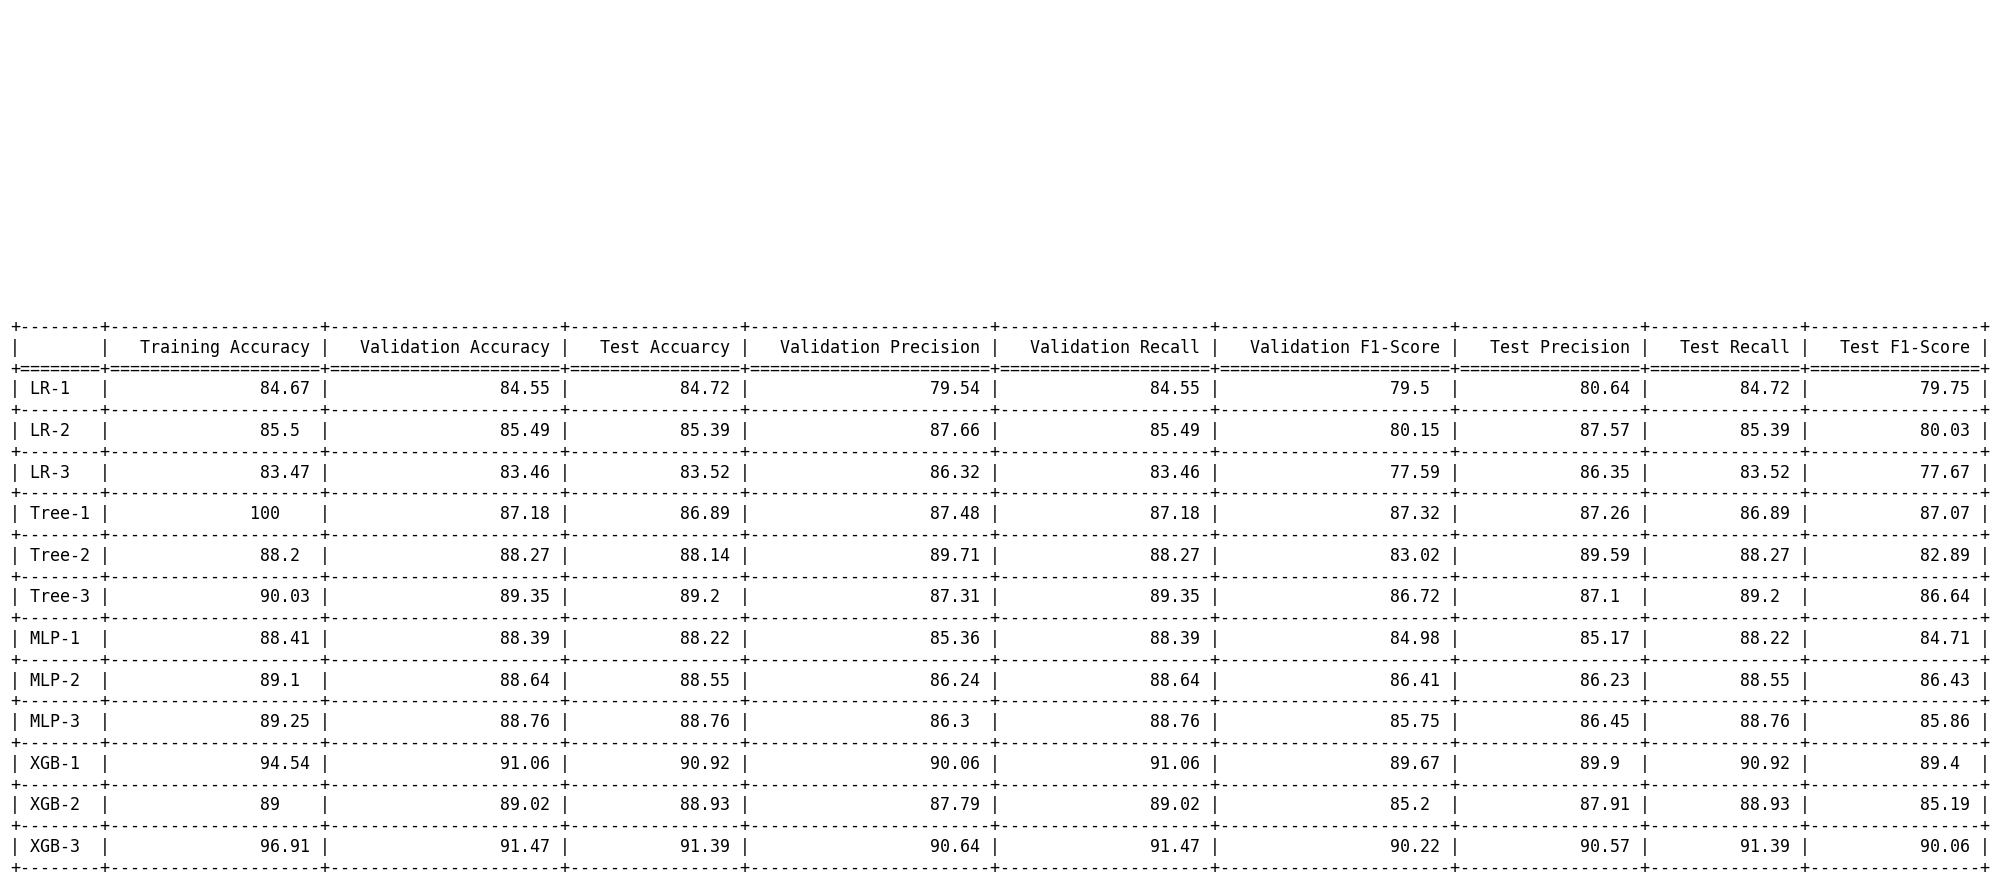

In [298]:
from tabulate import tabulate

# convert the DataFrame to a formatted table
table_str = tabulate(scores_df, headers = 'keys', tablefmt = 'grid')

# create a figure and axes for the table image
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

# plot the table as an image
ax.text(0, 0, table_str, ha = 'left', va = 'top', fontsize = 12, family = 'monospace')

# save the table image
plt.savefig('results_table.png', bbox_inches = 'tight', pad_inches = 0.1, transparent = True)

# show the table image
plt.show()

In [300]:
scores_df.index

Index(['LR-1', 'LR-2', 'LR-3', 'Tree-1', 'Tree-2', 'Tree-3', 'MLP-1', 'MLP-2',
       'MLP-3', 'XGB-1', 'XGB-2', 'XGB-3'],
      dtype='object')

### Visualizing the results:

In [305]:
scores_df_transposed = scores_df.T

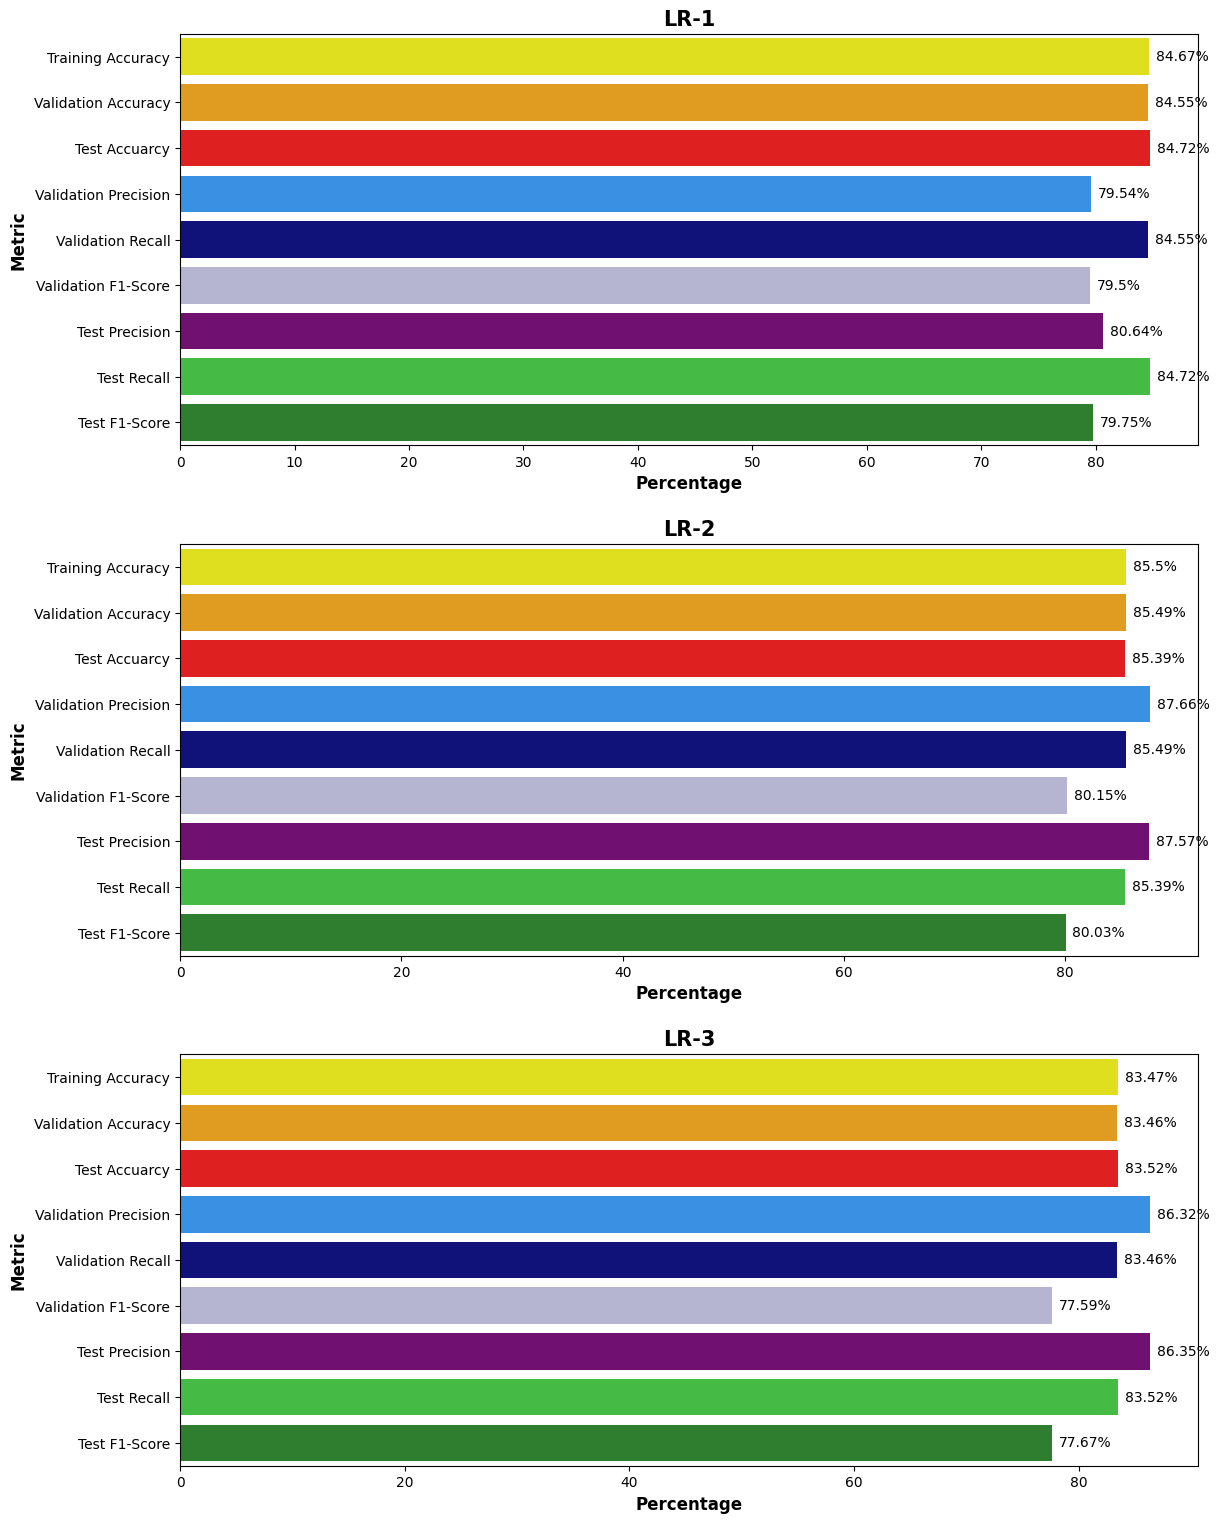

In [314]:
# create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
plt.tight_layout(pad = 5)

# custom defined color palette
colors = ['yellow', 'orange', 'red', 'dodgerblue', 'darkblue', 
          (176/255, 176/255, 215/255), 'purple', 'limegreen', 'forestgreen']

# loop through each LR model and plot the data
models = ['LR-1', 'LR-2', 'LR-3']
for i, model in enumerate(models):
    sns.barplot(y = scores_df_transposed.index, x = scores_df_transposed[model], ax = axes[i], hue = scores_df_transposed.index, palette = colors)
    axes[i].set_title(f'{model}', fontsize = 15, fontweight = 'bold')
    axes[i].set_xlabel('Percentage', fontsize = 12, fontweight = 'bold')
    axes[i].set_ylabel('Metric', fontsize = 12, fontweight = 'bold')

    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_width()}%", xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                         ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

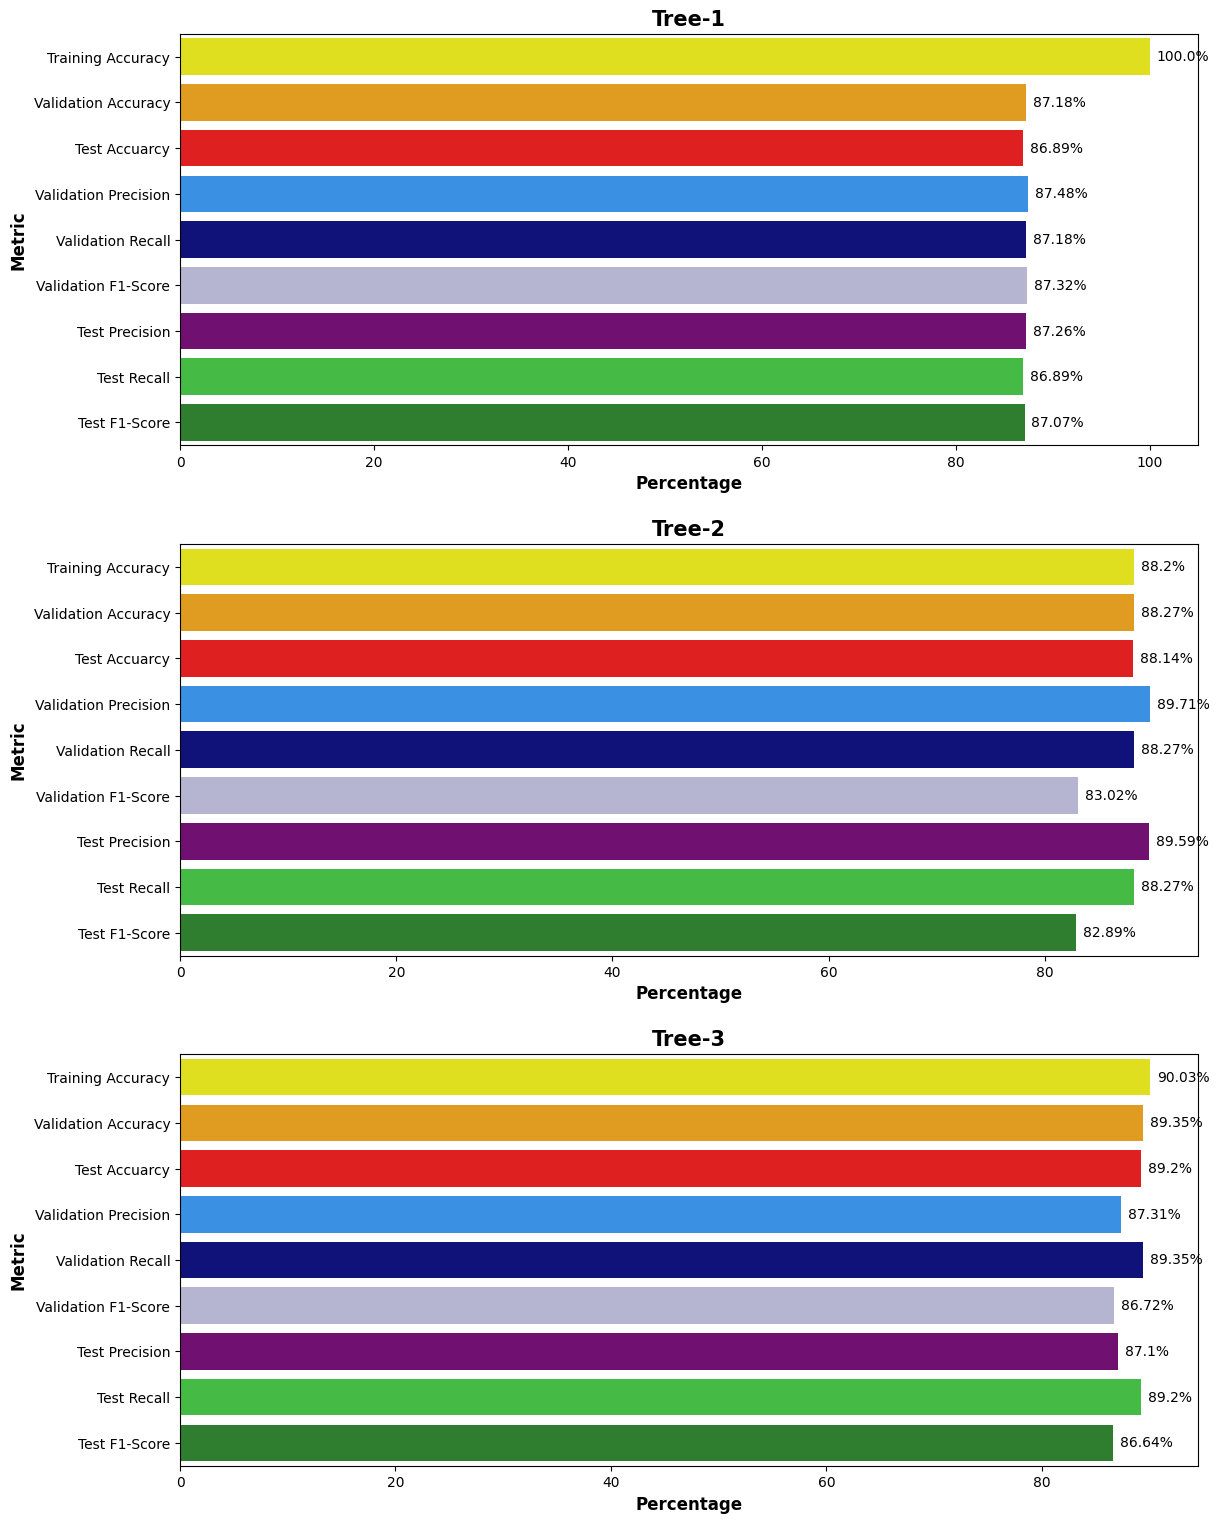

In [315]:
# create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
plt.tight_layout(pad = 5)

# custom defined color palette
colors = ['yellow', 'orange', 'red', 'dodgerblue', 'darkblue', 
          (176/255, 176/255, 215/255), 'purple', 'limegreen', 'forestgreen']

# loop through each Tree model and plot the data
models = ['Tree-1', 'Tree-2', 'Tree-3']
for i, model in enumerate(models):
    sns.barplot(y = scores_df_transposed.index, x = scores_df_transposed[model], ax = axes[i], hue = scores_df_transposed.index, palette = colors)
    axes[i].set_title(f'{model}', fontsize = 15, fontweight = 'bold')
    axes[i].set_xlabel('Percentage', fontsize = 12, fontweight = 'bold')
    axes[i].set_ylabel('Metric', fontsize = 12, fontweight = 'bold')

    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_width()}%", xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                         ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

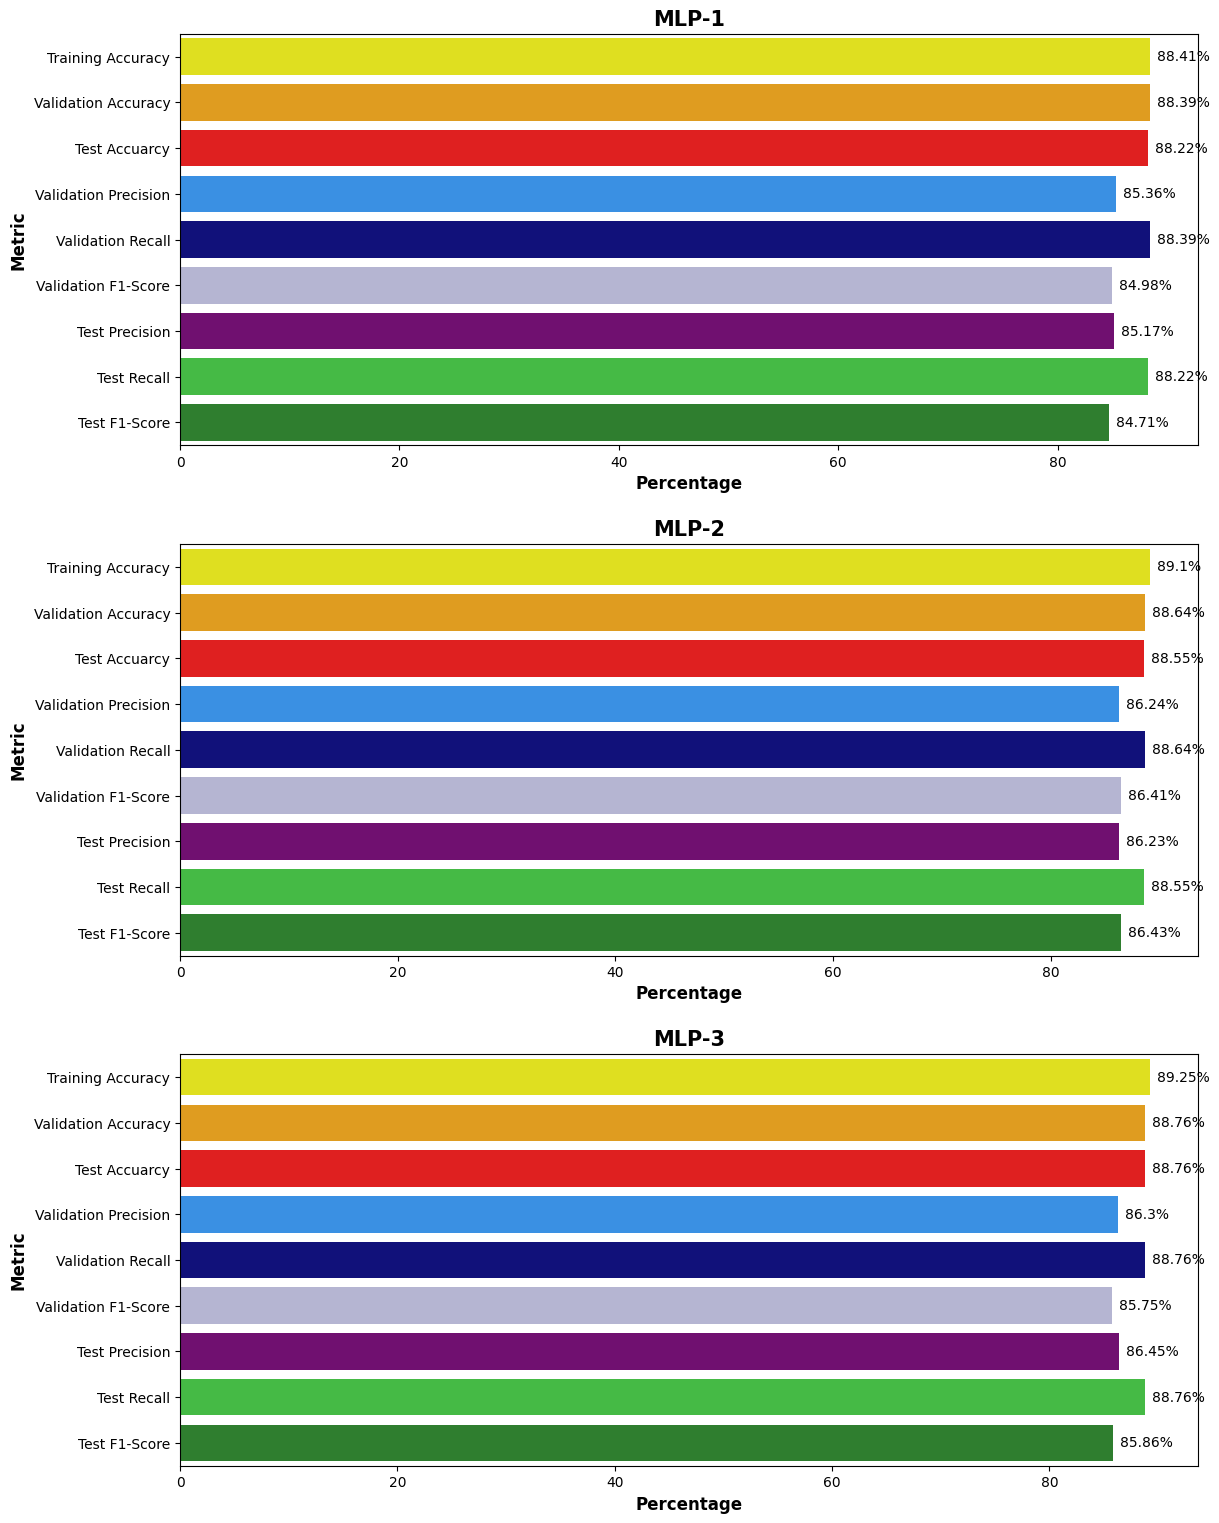

In [316]:
# create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
plt.tight_layout(pad = 5)

# custom defined color palette
colors = ['yellow', 'orange', 'red', 'dodgerblue', 'darkblue', 
          (176/255, 176/255, 215/255),'purple', 'limegreen', 'forestgreen']

# loop through each MLP model and plot the data
models = ['MLP-1', 'MLP-2', 'MLP-3']
for i, model in enumerate(models):
    sns.barplot(y = scores_df_transposed.index, x = scores_df_transposed[model], ax = axes[i], hue = scores_df_transposed.index, palette = colors)
    axes[i].set_title(f'{model}', fontsize = 15, fontweight = 'bold')
    axes[i].set_xlabel('Percentage', fontsize = 12, fontweight = 'bold')
    axes[i].set_ylabel('Metric', fontsize = 12, fontweight = 'bold')

    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_width()}%", xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                         ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

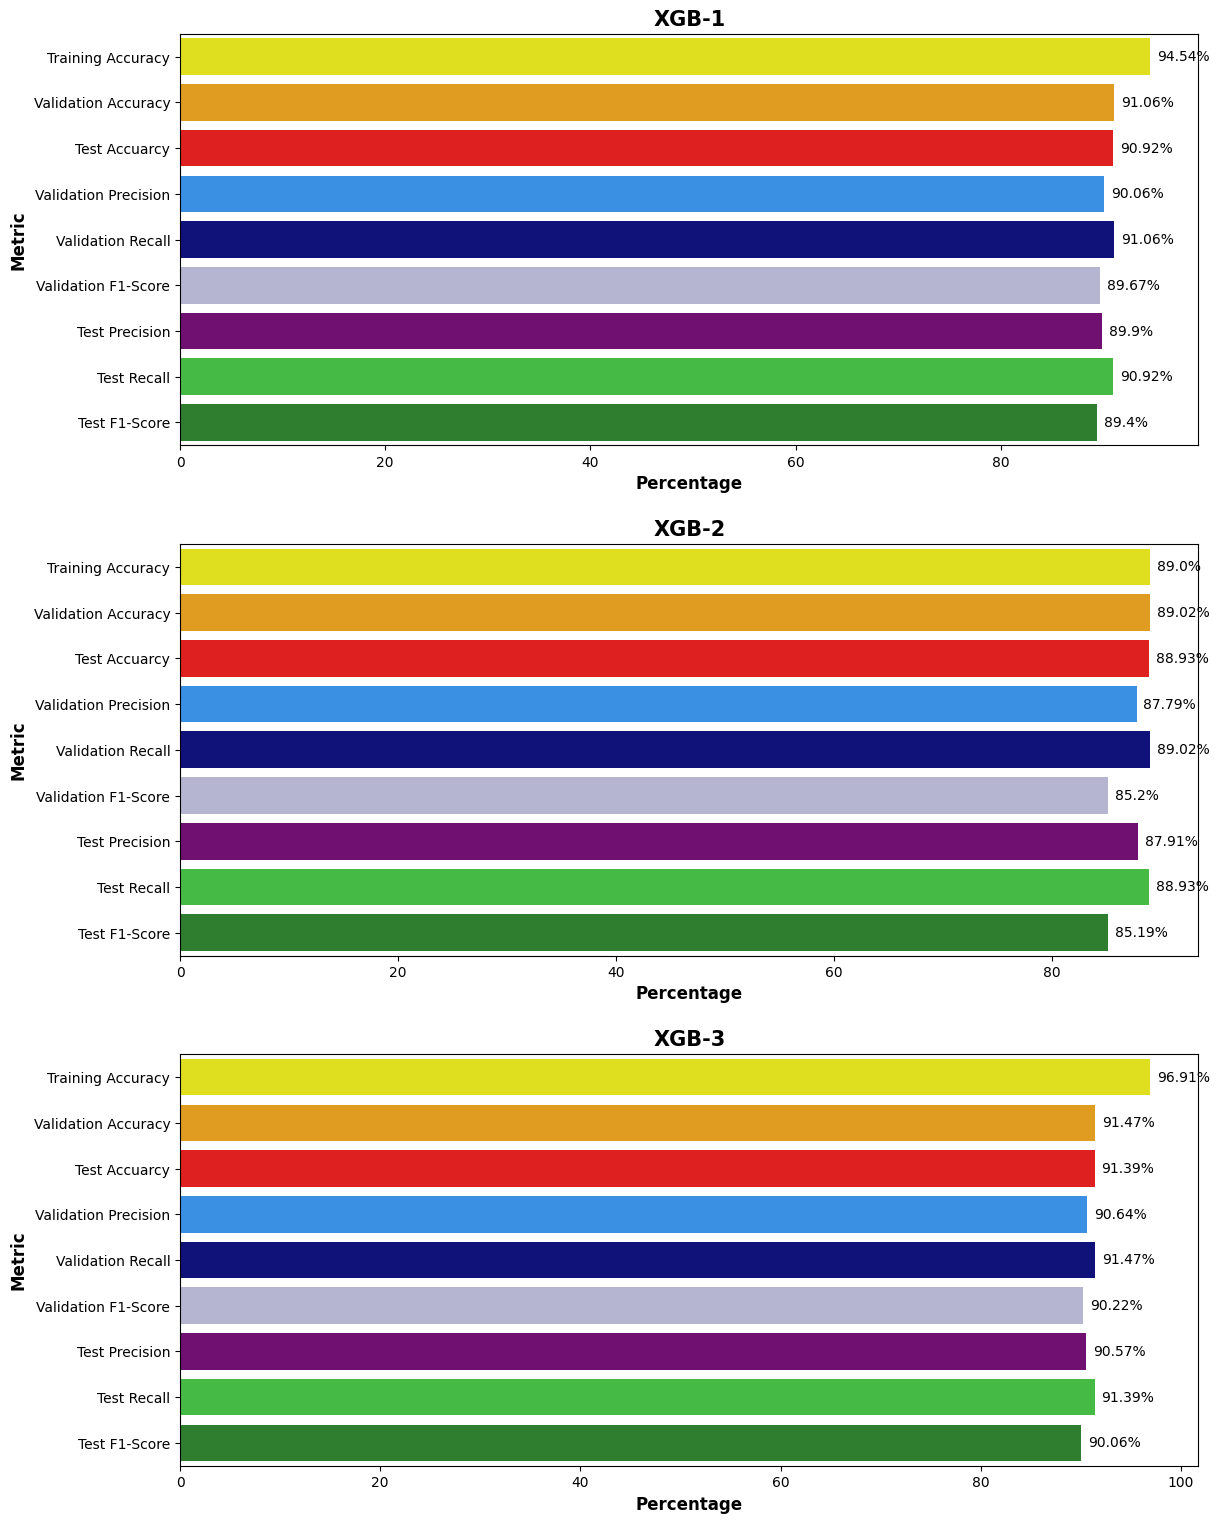

In [317]:
# create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
plt.tight_layout(pad = 5)

# custom defined color palette
colors = ['yellow', 'orange', 'red', 'dodgerblue', 'darkblue', 
          (176/255, 176/255, 215/255), 'purple', 'limegreen', 'forestgreen']

# loop through each LR model and plot the data
models = ['XGB-1', 'XGB-2', 'XGB-3']
for i, model in enumerate(models):
    sns.barplot(y = scores_df_transposed.index, x = scores_df_transposed[model], ax = axes[i], hue = scores_df_transposed.index, palette = colors)
    axes[i].set_title(f'{model}', fontsize = 15, fontweight = 'bold')
    axes[i].set_xlabel('Percentage', fontsize = 12, fontweight = 'bold')
    axes[i].set_ylabel('Metric', fontsize = 12, fontweight = 'bold')

    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_width()}%", xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                         ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

In [318]:
# save the best models
import joblib

joblib.dump(LR1, 'LR-1.pkl')
joblib.dump(tree3, 'Tree-3.pkl')
joblib.dump(mlp3, 'MLP-3.pkl')
joblib.dump(xgb3, 'XGB-3.pkl')

['XGB-3.pkl']

# User Interface and Incremental Learning

## Simple User Interface

### Functions for the interface:

In [ ]:
def get_temp():
    print("\n-- TEMPERATURE -- ")
    temp = float(input("Enter the temperature in degree centigrade: "))
    return temp
# -----------------------------------------------------------------------------------------------------------

def get_humid():
    print("\n-- HUMIDITY -- ")
    print("Valid range for humidity is 0 - 100 % (don't add & sign)")
    humid = float(input("Enter the humidity of the weather: "))

    while True:
        humid /= 100
        if not(1 >= humid >= 0):
            print("The value of humidity is not in the range of 0 - 100, please enter correct value")
            humid = float(input("Enter the humidity of the weather: "))
        if (1 >= humid >= 0):
            break
    
    return humid
# -----------------------------------------------------------------------------------------------------------

def get_windSpeed():
    print("\n-- WIND SPEED --")
    wind_speed = float(input("Enter the wind speed in km/h: "))  
    return wind_speed
# -----------------------------------------------------------------------------------------------------------

def get_windBearing():
    print("\n-- WIND BEARING --")
    print("Valid range for wind bearing is 0 - 359 degrees")
    wind_bearing = float(input("Enter the wind bearing (degrees): "))

    while True:
        if not(359 >= wind_bearing >= 0):
            print("The value of wind bearing is not in the range of 0 - 359, please enter correct value")
            wind_bearing = float(input("Enter the wind bearing (degrees): "))
        if (359 >= wind_bearing >= 0):
            break

    return wind_bearing
# -----------------------------------------------------------------------------------------------------------

def get_visible():
    print("\n-- VISIBILITY -- ")
    visible = float(input("Enter the visibility distance in km: "))    
    return visible
# -----------------------------------------------------------------------------------------------------------

def get_pressure():
    print("\n-- PRESSURE -- ")
    pressure = float(input("Enter the pressure in millibars: "))   
    return pressure
# -----------------------------------------------------------------------------------------------------------

def get_hour():
    print("\n-- HOUR OF THE DAY --")
    print("Valid range for hour of the day is 0 - 23")
    hour = int(input("Enter the hour of the day: "))

    while True:
        if not(23 >= hour >= 0) or type(hour) != int:
            print("The value of hour is not in the range of 0 - 23, please enter correct value")
            hour = int(input("Enter the hour of the day: "))
        if (23 >= hour >= 0):
            break
    
    return hour
# -----------------------------------------------------------------------------------------------------------

def get_day():
    print("\n-- DAY OF THE MONTH --")
    print("Valid range for day of the month is 1 - 31")
    day = int(input("Enter the day of the month: "))

    while True:
        if not(31 >= day >= 0) or type(day) != int:
            print("The value of day is not in the range of 0 - 31, please enter correct value")
            day = int(input("Enter the day of the month: "))
        if (31 >= day >= 0):
            break
    
    return day
# -----------------------------------------------------------------------------------------------------------

def get_month():
    print("\n-- MONTH NUMBER --")
    print("Valid range for month number is 1 - 12")
    month = int(input("Enter the month number: "))

    while True:
        if not(12 >= month >= 1) or type(month) != int:
            print("The value of month is not in the range of 1 - 12, please enter correct value")
            month = int(input("Enter the month number: "))
        if (12 >= month >= 1):
            break
    
    return month
# -----------------------------------------------------------------------------------------------------------

def get_year():
    print("\n-- YEAR --")
    print("Valid range for year is 2006 - 2022")
    year = int(input("Enter the year: "))

    while True:
        if not(2022 >= year >= 2006) or type(year) != int:
            print("The value of year is not in the range of 2006 - 2022, please enter correct value")
            year = int(input("Enter the year: "))
        if (2022 >= year >= 2006):
            break
    
    return year
# -----------------------------------------------------------------------------------------------------------     

def create_scaledDF(temp, humid, wind_speed, wind_bearing, visible, pressure, hour, day, month, year):
    data = {
            'Temperature (C)': [temp],
            'Humidity': [humid],
            'Wind Speed (km/h)': [wind_speed],
            'Wind Bearing (degrees)': [wind_bearing],
            'Visibility (km)': [visible],
            'Pressure (millibars)': [pressure],
            'Hour': [hour],
            'Day': [day],
            'Month': [month],
            'Year': [year]
           }

    input_df = pd.DataFrame(data)
    
    columns_to_scale = ['Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
                        'Visibility (km)', 'Pressure (millibars)','Hour','Day','Year','Month']
    input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])
    
    return input_df

# -----------------------------------------------------------------------------------------------------------     

def model_predicts(user_df):
    LR1_pred = LR1.predict(user_df); LR2_pred = LR2.predict(user_df); LR3_pred = LR3.predict(user_df)
    tree1_pred = tree1.predict(user_df); tree2_pred = tree2.predict(user_df); tree3_pred = tree3.predict(user_df)
    mlp1_pred = mlp1.predict(user_df); mlp2_pred = mlp2.predict(user_df); mlp3_pred = mlp3.predict(user_df)
    xgb1_pred = xgb1.predict(user_df); xgb2_pred = xgb2.predict(user_df); xgb3_pred = xgb3.predict(user_df)
    
    return [(LR1_pred, LR2_pred, LR3_pred), (tree1_pred, tree2_pred, tree3_pred), 
            (mlp1_pred, mlp2_pred, mlp3_pred), (xgb1_pred, xgb2_pred, xgb3_pred)]
# -----------------------------------------------------------------------------------------------------------     

### User input and predictions:

In [ ]:
print("Enter your observations for the following features: ");
temp = get_temp();                               humid = get_humid();
wind_speed = get_windSpeed();                    wind_bearing = get_windBearing();
visible = get_visible();                         pressure = get_pressure();
hour = get_hour();                               day = get_day();
month = get_month();                             year = get_year();
user_df = create_scaledDF(temp, humid, wind_speed, wind_bearing, visible, pressure, hour, day, month, year); 

user_df

In [ ]:
results = model_predicts(user_df)
    
actual_labels = final_df['Summary'].tolist()
encoded_labels = final_df['Encoded_Summary'].tolist()
mapping = dict(list(set(zip(encoded_labels, actual_labels))))
sorted_dict = dict(sorted(mapping.items()))

print(f"Logistic regression model 1 predicted: {sorted_dict.get(results[0][0][0])}")
print(f"Logistic regression model 2 predicted: {sorted_dict.get(results[0][1][0])}")
print(f"Logistic regression model 3 predicted: {sorted_dict.get(results[0][2][0])}")

print(f"Decision tree model 1 predicted: {sorted_dict.get(results[1][0][0])}")
print(f"Decision tree model 2 predicted: {sorted_dict.get(results[1][1][0])}")
print(f"Decision tree model 3 predicted: {sorted_dict.get(results[1][2][0])}")

print(f"Multi-layer preceptron model 1 predicted: {sorted_dict.get(results[2][0][0])}")
print(f"Multi-layer preceptron model 2 predicted: {sorted_dict.get(results[2][1][0])}")
print(f"Multi-layer preceptron model 3 predicted: {sorted_dict.get(results[2][2][0])}")

print(f"XGBoost model 1 predicted: {sorted_dict.get(results[3][0][0])}")
print(f"XGBoost model 2 predicted: {sorted_dict.get(results[3][1][0])}")
print(f"XGBoost model 3 predicted: {sorted_dict.get(results[3][2][0])}") 

## Incremental Learning Interface

### Preprocessing functions:

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------------

# function for extracting useful information from columns
def extract_date(df_arg):
    df_arg['Formatted Date'] = pd.to_datetime(df_arg['Formatted Date'], utc=True)
    df_arg['Month'] = df_arg['Formatted Date'].dt.month
    df_arg['Day'] = df_arg['Formatted Date'].dt.day
    df_arg['Year'] = df_arg['Formatted Date'].dt.year
    df_arg['Hour'] = df_arg['Formatted Date'].dt.hour
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function for dropping unnecessary columns if any
def drop_cols(df_arg):
    cols_list = ['Loud Cover','Daily Summary','Apparent Temperature (C)','Precip Type'] 
    for col in cols_list:
        try:
            df_arg.drop([col], axis = 1, inplace = True)
        except:
            pass
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function for dropping duplicate rows if any
def drop_dups(df_arg):
    original_shape = df_arg.shape
    try:
        df_arg.drop_duplicates(keep = "first", inplace = True)
    except:
        pass
    new_shape = df_arg.shape
    
    if original_shape[0] == new_shape[0]:
        print("No duplicated rows found")
        
    else:
        print(f"Duplicated rows found, total rows dropped: {original_shape[0] - new_shape[0]}")
    
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function which corrects the data types of all columns
def correct_dtypes(df_arg):
    float_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
    int_columns = ['Wind Bearing (degrees)','Hour','Day','Month','Year']

    df_arg[float_columns] = df_arg[float_columns].astype(float)
    df_arg[int_columns] = df_arg[int_columns].astype(int)
    
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function to handle missing values in all columns
# assuming output column has no missing values in it

def handle_missing_values(df_arg):
    
    # replace 0's of Pressure, Visibility and Humidity with NaN
    df_arg['Humidity'] = df_arg['Humidity'].replace(0, np.nan)
    df_arg['Visibility (km)'] = df_arg['Visibility (km)'].replace(0, np.nan)
    df_arg['Pressure (millibars)'] = df_arg['Pressure (millibars)'].replace(0, np.nan)

    check_null = df_arg.isna().sum()
    null_values = check_null[check_null > 0]
    
    if len(null_values) == 0:
        print("No null values found in any column")
        return
    
    # get names of columns with null values
    col_names = null_values.index.tolist()
    
    imputer = SimpleImputer(strategy = 'mean')
    
    for col in col_names:
        # print(col_names)
        if len(col_names) != 0:
        
            # handle missing values in 'Precip Type' column 
            if col == 'Precip Type':
                df_arg['Precip Type'] = np.where(df_arg['Temperature (C)'] > 0, 'rain', 'snow')
                # print(df_arg.isna().sum())
                continue      # finish the current iteration if column was 'Precip Type'
            
            class_labels = df_arg['Summary'].unique()
            class_groups = [df_arg[df_arg['Summary'] == label] for label in class_labels]

            # handle missing values for all other columns using SimpleImputation with mean strategy
            for group in class_groups:
                missing_indices = np.where(pd.isnull(group[col]))[0]
                feature_values = group[col].values.reshape(-1, 1)
                imputed_values = imputer.fit_transform(feature_values)
                col_index = df_arg.columns.get_loc(col)
                group.iloc[missing_indices, col_index] = imputed_values[missing_indices]


            imputed_data = np.concatenate(class_groups, axis = 0)
            imputed_df = pd.DataFrame(imputed_data, columns = df_arg.columns)
            df_arg = correct_dtypes(imputed_df)
            # print(df_arg.isna().sum())
        
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function to reduce classes and end up with 3 
def reduce_classes(df_arg):
    df_arg['Summary'] = df_arg['Summary'].replace(['Light Rain', 'Drizzle'], 'Rain')
    df_arg['Summary'] = df_arg['Summary'].replace(['Dangerously Windy and Partly Cloudy', 'Windy and Dry',
                                                   'Windy and Foggy', 'Windy and Partly Cloudy', 'Windy and Mostly Cloudy',
                                                   'Windy and Overcast'], 'Windy')
    df_arg['Summary'] = df_arg['Summary'].replace(['Breezy and Dry', 'Breezy and Foggy', 'Breezy and Partly Cloudy',
                                                   'Breezy and Mostly Cloudy', 'Breezy and Overcast'], 'Breezy')
    df_arg['Summary'] = df_arg['Summary'].replace(['Dry and Mostly Cloudy', 'Dry and Partly Cloudy'], 'Dry')
    df_arg['Summary'] = df_arg['Summary'].replace(['Humid and Mostly Cloudy', 'Humid and Partly Cloudy',
                                                   'Humid and Overcast'], 'Humid')
    df_arg['Summary'] = df_arg['Summary'].replace('Breezy', 'Windy')
    df_arg['Summary'] = df_arg['Summary'].replace(['Partly Cloudy', 'Mostly Cloudy', 'Overcast'], 'Cloudy')
    df_arg['Summary'] = df_arg['Summary'].replace(['Humid', 'Rain', 'Dry', 'Windy', 'Foggy'], 'Others')
    
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function for scaling the numerical features of the dataset
def scale_values(df_arg):
    columns_to_scale = ['Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
                        'Visibility (km)', 'Pressure (millibars)','Hour','Year','Day','Month']
    
    df_arg[columns_to_scale] = scaler.fit_transform(df_arg[columns_to_scale])
    
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function for encoding the target variable
def encode_values(df_arg):    
    sorted_dict = {0: 'Clear', 1: 'Cloudy', 2: 'Others'}
    mapping_dict = {value: key for key, value in sorted_dict.items()}
    df_arg['Encoded_Summary'] = df_arg['Summary'].map(mapping_dict)
    
    columns = df_arg.columns.tolist()
    columns.remove('Encoded_Summary')
    columns.insert(1, 'Encoded_Summary')
    df_arg = df_arg[columns]
    
    return df_arg

# ------------------------------------------------------------------------------------------------------------------------------

# function for feature importance, and dropping off irrelevant columns
def feature_imp(df_arg, target_col):
    X = df_arg.drop(columns=[target_col])
    y = df_arg[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # fit model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # permutation importance
    results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importances = results.importances_mean
    feature_names = X.columns
    indices = np.argsort(importances)[::-1]

    # print feature importances
    # print("Feature importances:")
    # for idx in indices:
    #     print(f"{feature_names[idx]}: {importances[idx]:.4f}")

    # filter features with importance >= 0.01
    important_features = [feature for feature, importance in zip(feature_names, importances) if importance >= 0.01]
    return df_arg[important_features + [target_col]]

# ------------------------------------------------------------------------------------------------------------------------------

# function for splitting the dataset into features and target variable
def split_df(df_arg):
    X_ = df_arg.drop(['Summary', 'Encoded_Summary'], axis = 1)
    y_ = df_arg['Encoded_Summary'].values

    print(f"Dimensions of X (features): {X_.shape}")
    print(f"Dimensions of y (target variable): {y_.shape}")
    
    return X_, y_

# ------------------------------------------------------------------------------------------------------------------------------

### File input, preprocessing and learning:

In [ ]:
# interface to ask user for input of file
while True:
    flag = 0
    file_name = input("Enter file name with the extension (only CSV files): ")    
    if file_name[-4:] != ".csv":
        print("Please enter file which has a CSV extension")
        flag = 1
        
    if file_name[-4:] == '.csv': 
        try:
            incr_df = pd.read_csv(file_name)
        except:
            print("The file you entered does not exist, please enter correct input")
            flag = 1

    if flag == 0:
        break

In [ ]:
# code which applies all necessary preprocessing steps on the df entered by the user

incr_df = extract_date(incr_df)               # extract useful information from date
incr_df = drop_cols(incr_df)                  # drop irrelevant columns
incr_df = drop_dups(incr_df)                  # drop duplicate rows
incr_df = handle_missing_values(incr_df)      # identify and handle missing values
incr_df = reduce_classes(incr_df)             # reduce the number of classes from 27 to 3
incr_df = scale_values(incr_df)               # scale the numerical features
incr_df = encode_values(incr_df)              # encode the target
incr_df = feature_imp(incr_df)                # drop less important features
incr_X, incr_y = split_df(incr_df)            # split the data into X (features) and y (target)

In [ ]:
# training the best of each model on the cleaned data
lr_best = joblib.load('LR-1.pkl')
tree_best = joblib.load('Tree-3.pkl')
mlp_best = joblib.load('MLP-3.pkl')
xgb_best = joblib.load('XGB-3.pkl')

lr_best.fit(incr_X, incr_y);                  tree_best.fit(incr_X, incr_y);
mlp_best.fit(incr_X, incr_y);                 xgb_best.fit(incr_X, incr_y);